In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

710it [00:01, 708.69it/s]
100%|██████████| 710/710 [00:07<00:00, 96.29it/s] 
7920it [00:00, 251368.79it/s]
7560it [00:00, 249584.31it/s]
720it [00:00, 830.71it/s]
100%|██████████| 720/720 [00:07<00:00, 94.09it/s] 
8280it [00:00, 230724.20it/s]
720it [00:00, 778.43it/s]
100%|██████████| 720/720 [00:07<00:00, 92.87it/s] 
8280it [00:00, 252632.16it/s]
700it [00:00, 872.01it/s]
100%|██████████| 700/700 [00:07<00:00, 97.32it/s] 
8280it [00:00, 246219.99it/s]
509it [00:00, 1231.39it/s]
100%|██████████| 509/509 [00:02<00:00, 193.07it/s]
3664it [00:00, 255731.52it/s]
700it [00:00, 874.39it/s]
100%|██████████| 700/700 [00:07<00:00, 97.42it/s] 
8280it [00:00, 75648.77it/s]
700it [00:00, 865.47it/s]
100%|██████████| 700/700 [00:07<00:00, 97.32it/s] 
8280it [00:00, 242528.28it/s]
710it [00:01, 411.09it/s]
100%|██████████| 710/710 [00:07<00:00, 94.56it/s] 
8280it [00:00, 244802.01it/s]
710it [00:01, 410.63it/s]
100%|██████████| 710/710 [00:07<00:00, 95.01it/s] 
8280it [00:00, 240145.19it/s]
710it [

In [8]:
len(data_train), len(data_val), len(data_test)

(7920, 7560, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [7]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [8]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [9]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [10]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.19518


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.049436
Epoch 1...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.069119


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.047986
Epoch 2...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.06667


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.044851
Epoch 3...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.065142


100%|██████████| 237/237 [00:18<00:00, 12.66it/s]


Mean val loss: 0.041166


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.064581


100%|██████████| 237/237 [00:18<00:00, 12.68it/s]


Mean val loss: 0.04043


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.063677


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.036198
Epoch 6...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.062661


100%|██████████| 237/237 [00:18<00:00, 12.63it/s]


Mean val loss: 0.03445


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.062076


100%|██████████| 237/237 [00:18<00:00, 12.64it/s]


Mean val loss: 0.031539


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.060829


100%|██████████| 237/237 [00:18<00:00, 12.63it/s]


Mean val loss: 0.028346


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 9...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.059971


100%|██████████| 237/237 [00:18<00:00, 12.65it/s]


Mean val loss: 0.026596


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 10...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.059745


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.030142
EarlyStopping counter: 1 out of 5
Epoch 11...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.058925


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.034163
EarlyStopping counter: 2 out of 5
Epoch 12...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.058649


100%|██████████| 237/237 [00:18<00:00, 12.64it/s]


Mean val loss: 0.022741


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 13...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.058781


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.027604
EarlyStopping counter: 1 out of 5
Epoch 14...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.058013


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.026476
EarlyStopping counter: 2 out of 5
Epoch 15...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.058656


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.028339
EarlyStopping counter: 3 out of 5
Epoch 16...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.057866


100%|██████████| 237/237 [00:18<00:00, 12.66it/s]


Mean val loss: 0.022684


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 17...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.058674


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.033566
EarlyStopping counter: 1 out of 5
Epoch 18...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.057973


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.022392
Epoch 19...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.057718


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.022706
EarlyStopping counter: 1 out of 5
Epoch 20...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.058287


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.023982
EarlyStopping counter: 2 out of 5
Epoch 21...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.057596


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.03022
EarlyStopping counter: 3 out of 5
Epoch 22...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.057475


100%|██████████| 237/237 [00:18<00:00, 12.64it/s]


Mean val loss: 0.021498


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 23...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.056756


100%|██████████| 237/237 [00:18<00:00, 12.66it/s]


Mean val loss: 0.020359


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 24...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.056809


100%|██████████| 237/237 [00:18<00:00, 12.64it/s]


Mean val loss: 0.020376


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 25...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.056915


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.022916
EarlyStopping counter: 1 out of 5
Epoch 26...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.057718
Epoch    26: reducing learning rate of group 0 to 7.5000e-05.


100%|██████████| 237/237 [00:18<00:00, 12.65it/s]


Mean val loss: 0.018787


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 27...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.05677


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.019112
EarlyStopping counter: 1 out of 5
Epoch 28...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.056885


100%|██████████| 237/237 [00:18<00:00, 12.66it/s]


Mean val loss: 0.018707


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 29...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.056313


100%|██████████| 237/237 [00:18<00:00, 12.66it/s]


Mean val loss: 0.018552


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 30...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.056097


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.020993
EarlyStopping counter: 1 out of 5
Epoch 31...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.056469


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.020007
EarlyStopping counter: 2 out of 5
Epoch 32...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.056511


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.023811
EarlyStopping counter: 3 out of 5
Epoch 33...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.05667
Epoch    33: reducing learning rate of group 0 to 5.6250e-05.


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.018605
EarlyStopping counter: 4 out of 5
Epoch 34...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.055676


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.018516
Epoch 35...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.05629


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.01918
EarlyStopping counter: 1 out of 5
Epoch 36...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.055695


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.019769
EarlyStopping counter: 2 out of 5
Epoch 37...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.055744
Epoch    37: reducing learning rate of group 0 to 4.2188e-05.


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.020087
EarlyStopping counter: 3 out of 5
Epoch 38...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.05578


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.01935
EarlyStopping counter: 4 out of 5
Epoch 39...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.05549


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.018651
EarlyStopping counter: 5 out of 5


100%|██████████| 259/259 [02:21<00:00,  2.01it/s]


## Dump experiment results

In [15]:
import pickle
import json

In [16]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# # p = 'carb96558_exp_results.pkl'
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [27]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [17]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [11]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [18]:
from itertools import chain

In [19]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [20]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

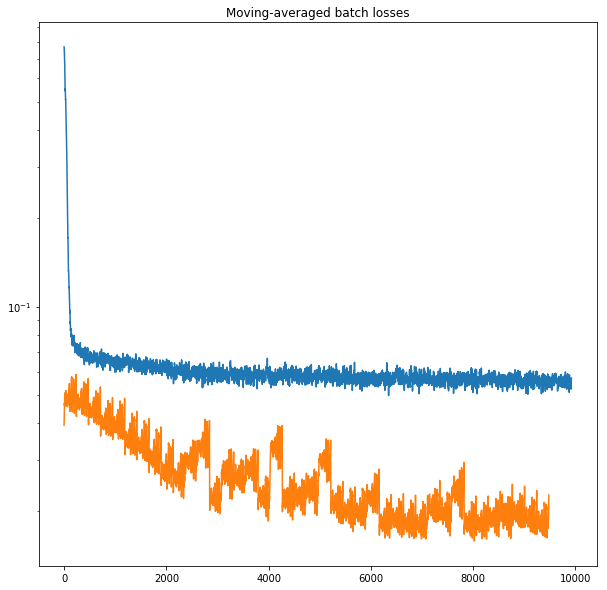

In [21]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')
plt.yscale('log')
# plt.ylim([1e-2, 1])
plt.show()

In [22]:
mean_train_loss = [np.mean(item) for item in results['val_losses']]
mean_val_loss = [np.mean(item) for item in results['train_losses']]

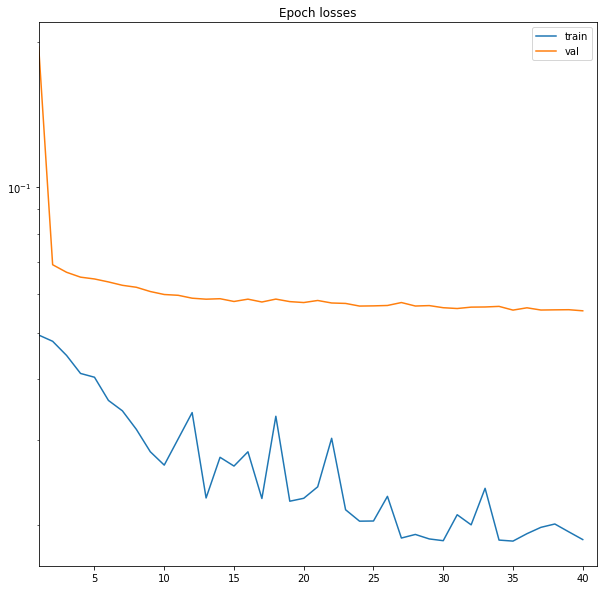

In [23]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [25]:
import os

In [26]:
import torch

In [27]:
from visualization_utils import output_to_binary, plot_sample

In [28]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

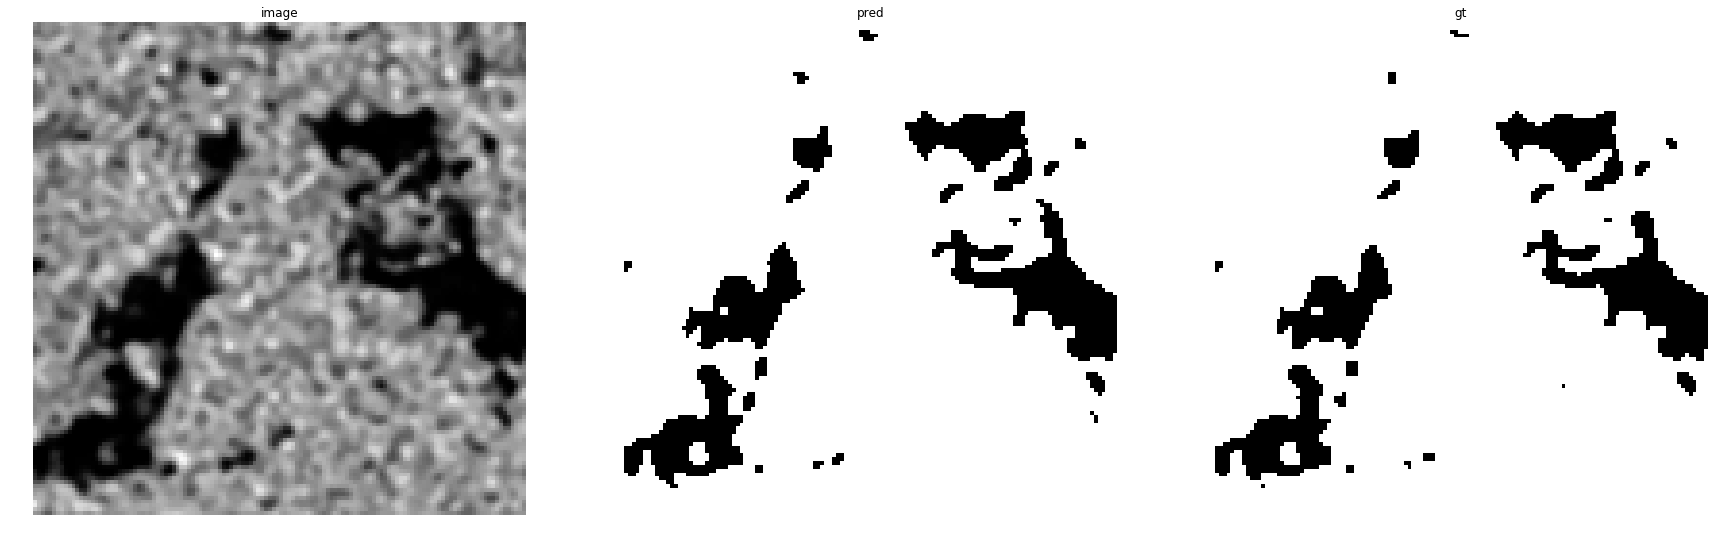

accuracy    : 0.99224853515625
precision   : 0.9996500314971652
recall      : 0.9915301305193002
f1          : 0.9955735247987173
pr_auc      : 0.9999640076378941
iou         : 0.9911860642653897


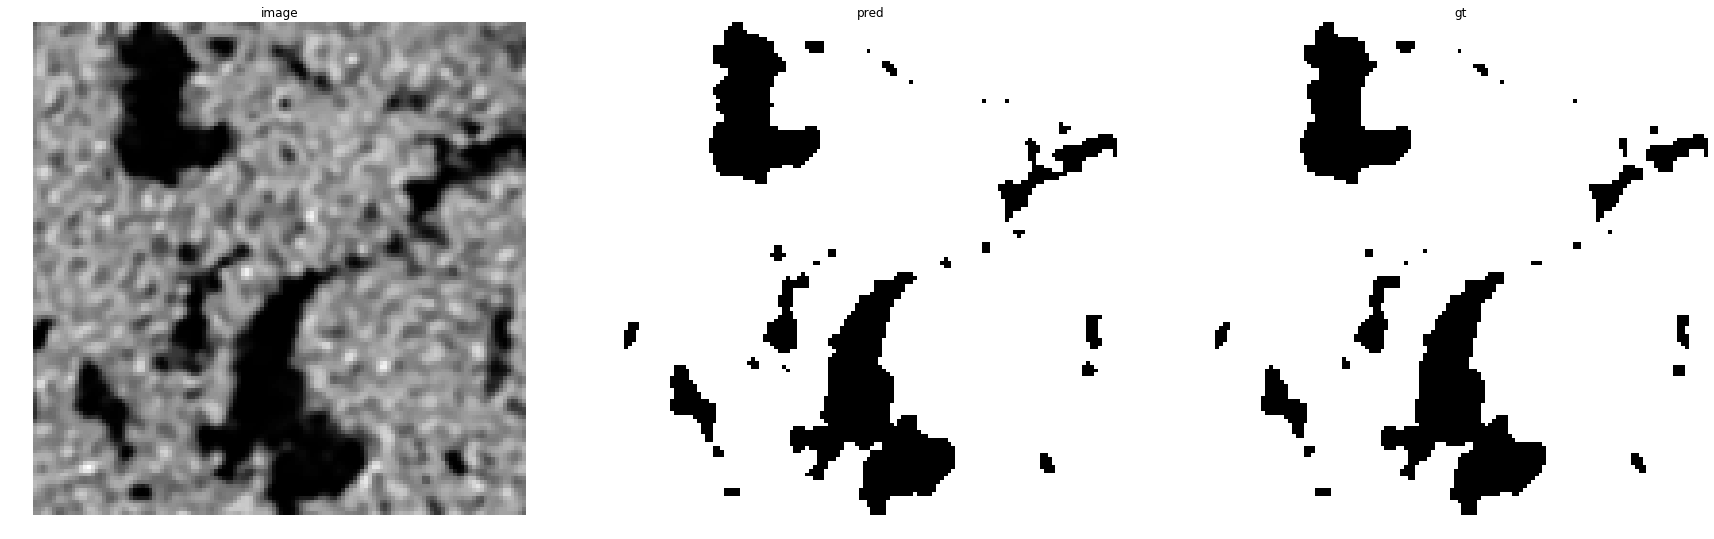

accuracy    : 0.99114990234375
precision   : 0.99957310565635
recall      : 0.990202988440936
f1          : 0.9948659844917326
pr_auc      : 0.9999639823726887
iou         : 0.9897844159504016


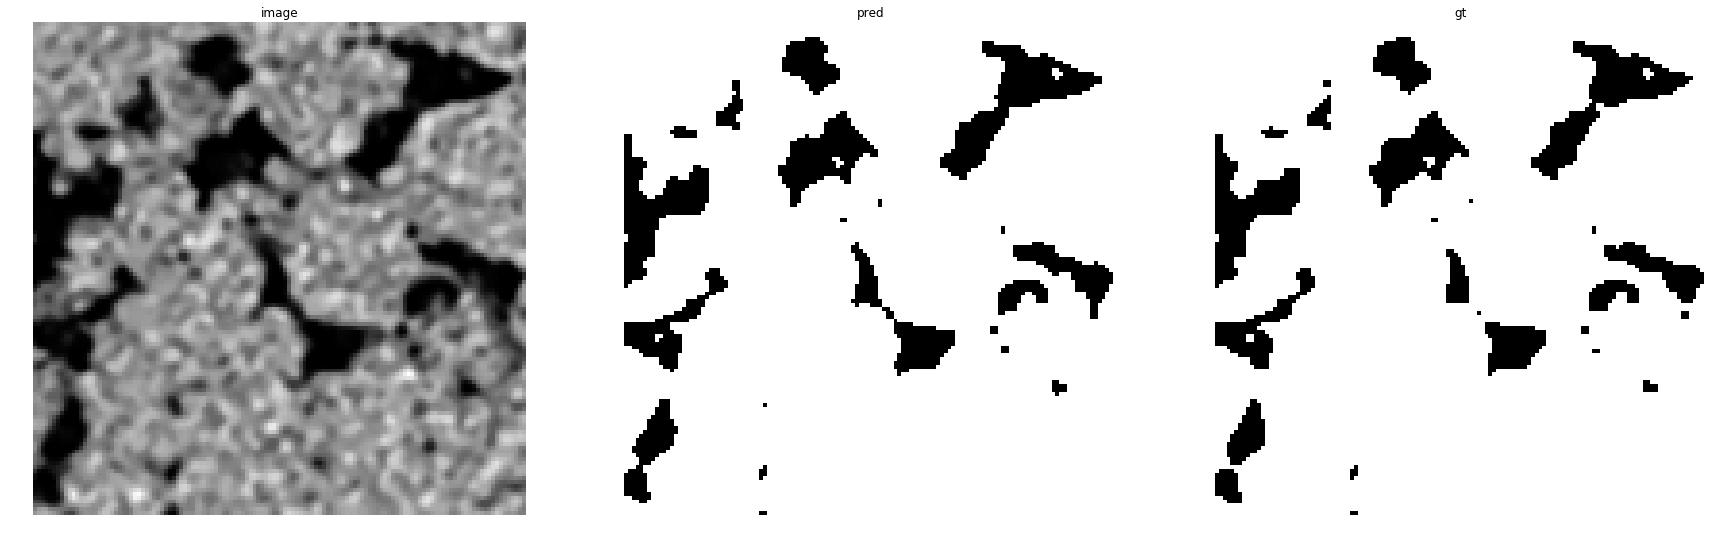

accuracy    : 0.99224853515625
precision   : 0.9992970123022847
recall      : 0.9918364499023165
f1          : 0.995552754140841
pr_auc      : 0.9999677782435694
iou         : 0.991144889136801


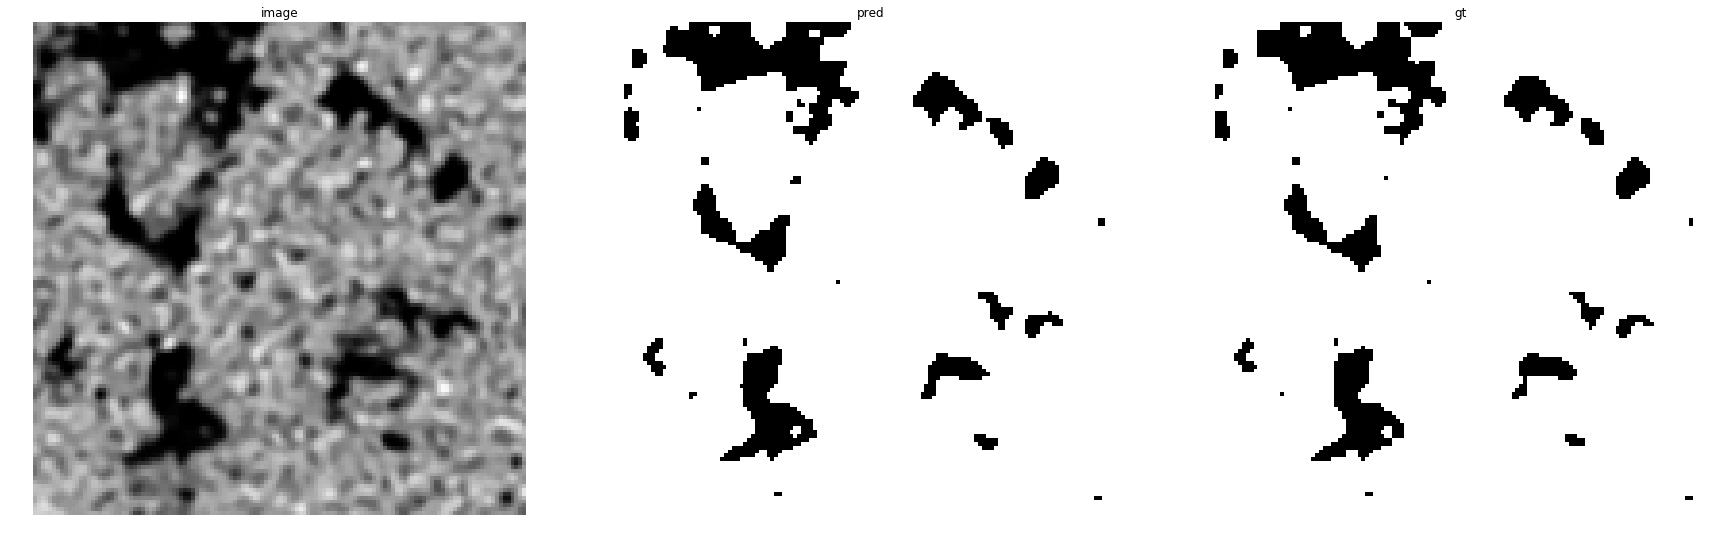

accuracy    : 0.99310302734375
precision   : 0.9993858332195987
recall      : 0.9929486744864059
f1          : 0.9961568547427133
pr_auc      : 0.9999740240926092
iou         : 0.9923431359262773


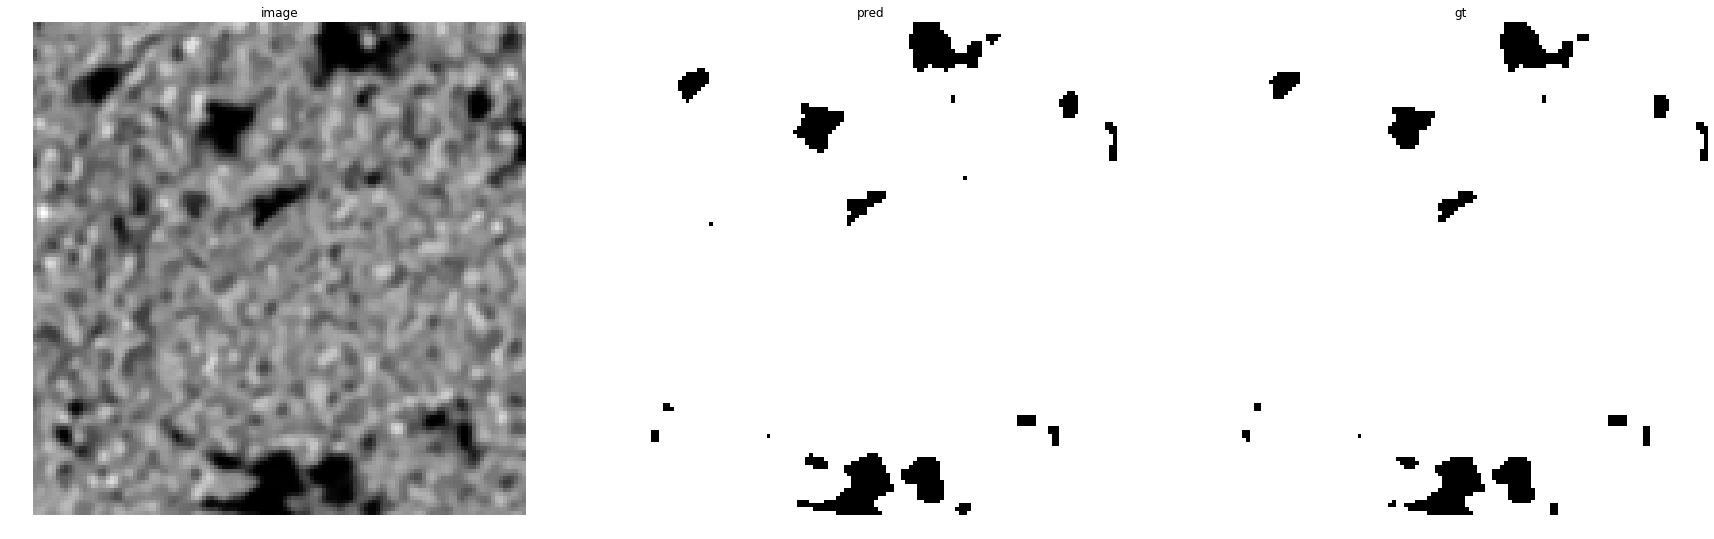

accuracy    : 0.9962158203125
precision   : 0.999936106319085
recall      : 0.9961173699955446
f1          : 0.9980230852624195
pr_auc      : 0.9999962575967632
iou         : 0.9960539714867617


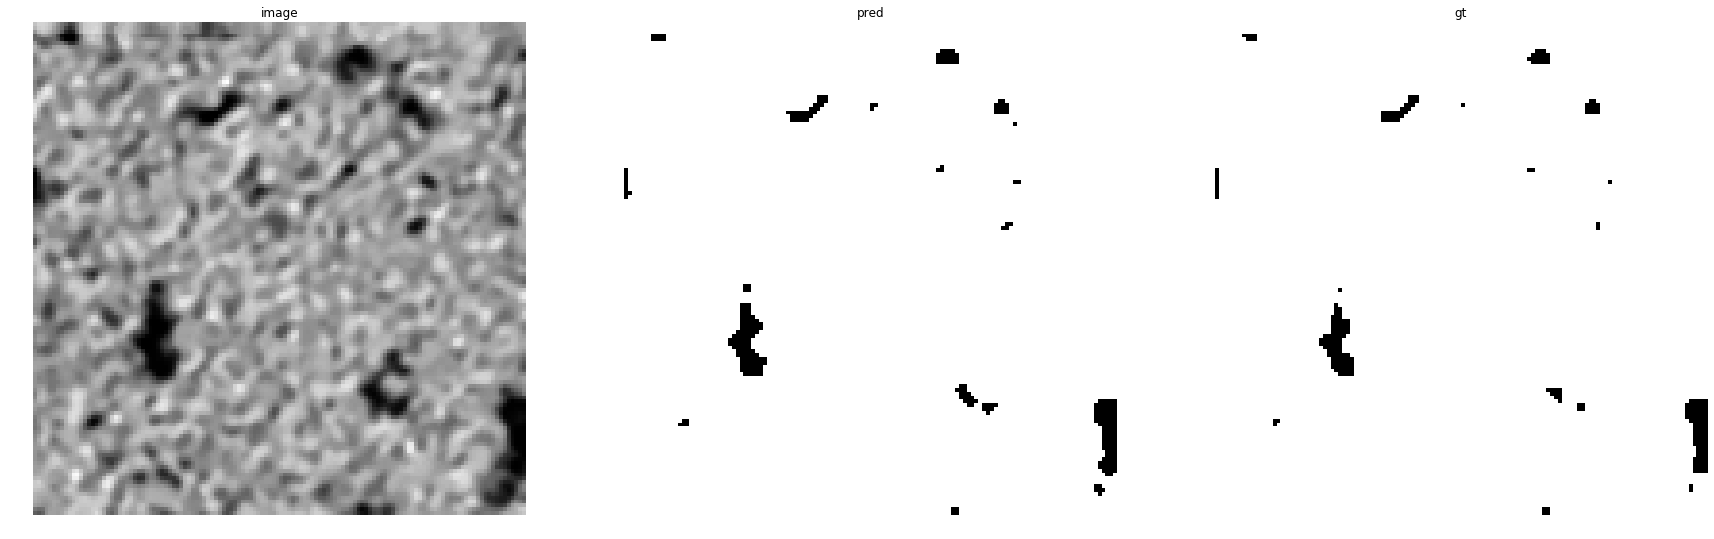

accuracy    : 0.99658203125
precision   : 0.9999376985857579
recall      : 0.9965849115181621
f1          : 0.9982584898619231
pr_auc      : 0.9999981203560598
iou         : 0.9965230348938284


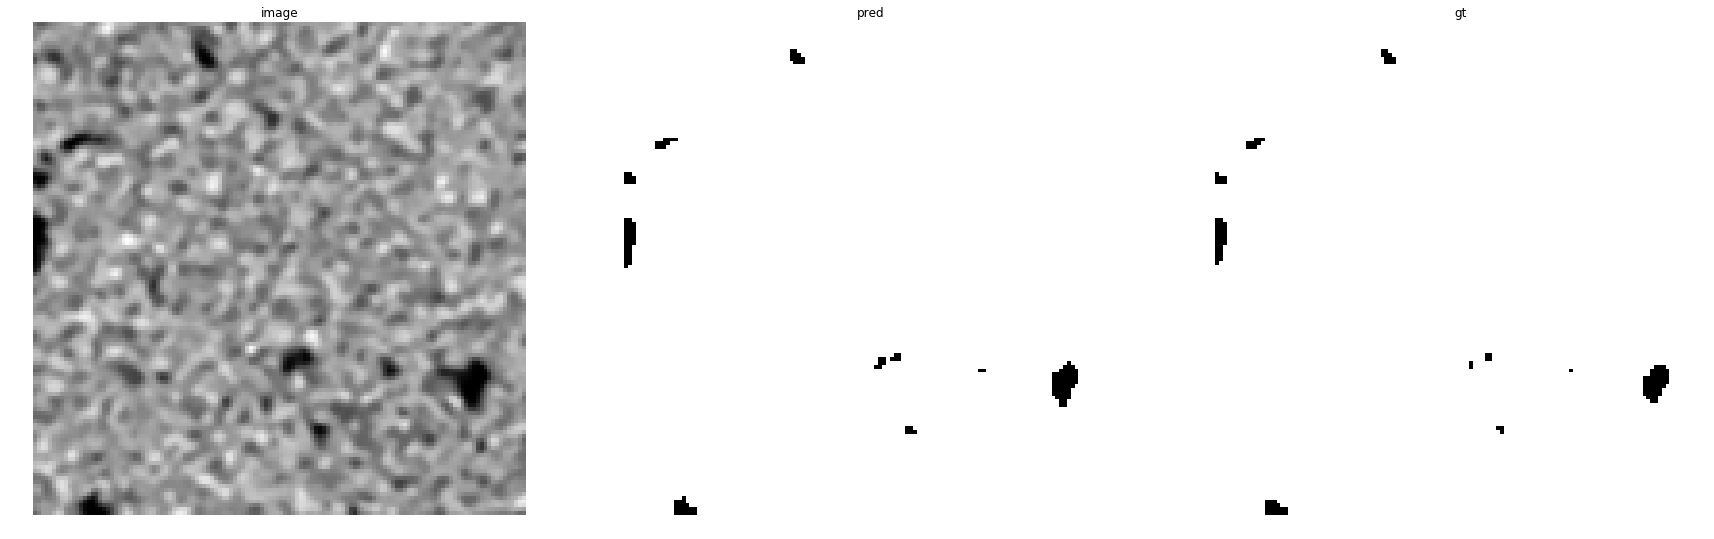

accuracy    : 0.998779296875
precision   : 1.0
recall      : 0.9987692307692307
f1          : 0.999384236453202
pr_auc      : 0.999999485216419
iou         : 0.9987692307692307


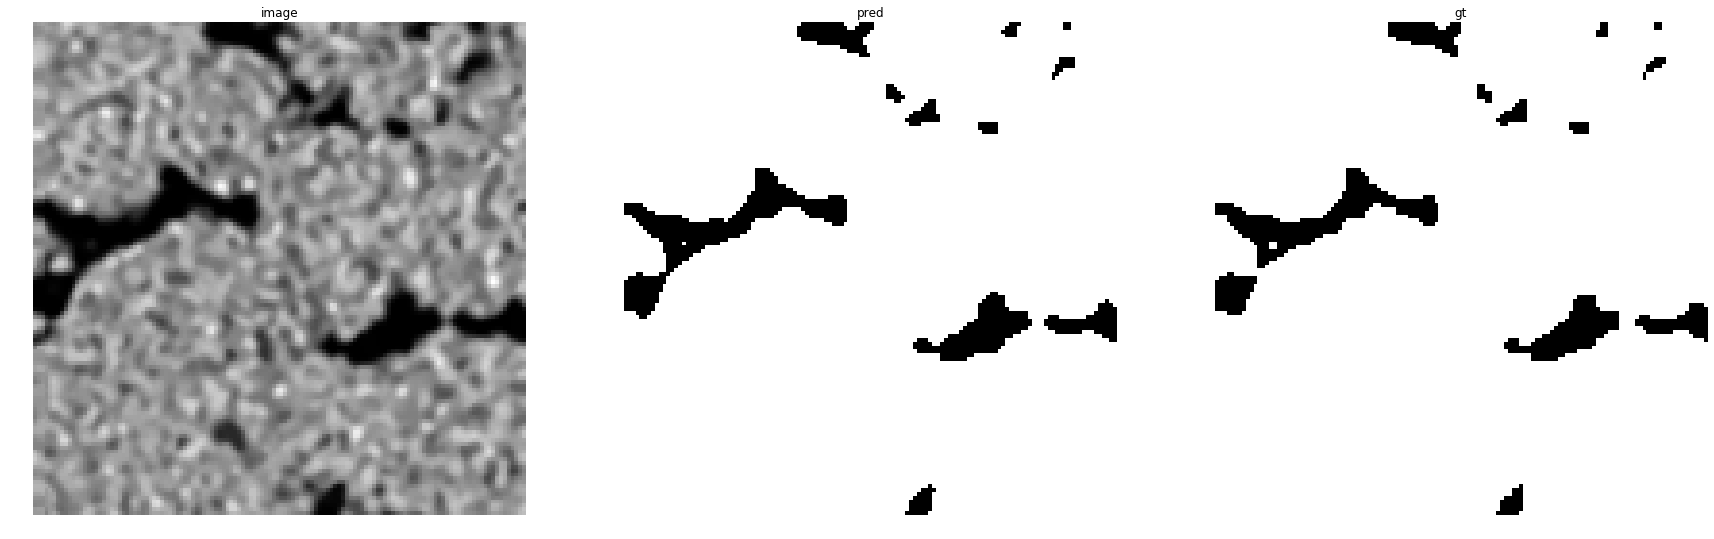

accuracy    : 0.99560546875
precision   : 0.9998034462425474
recall      : 0.9954987279013634
f1          : 0.9976464435146443
pr_auc      : 0.9999904961779001
iou         : 0.9953039394729977


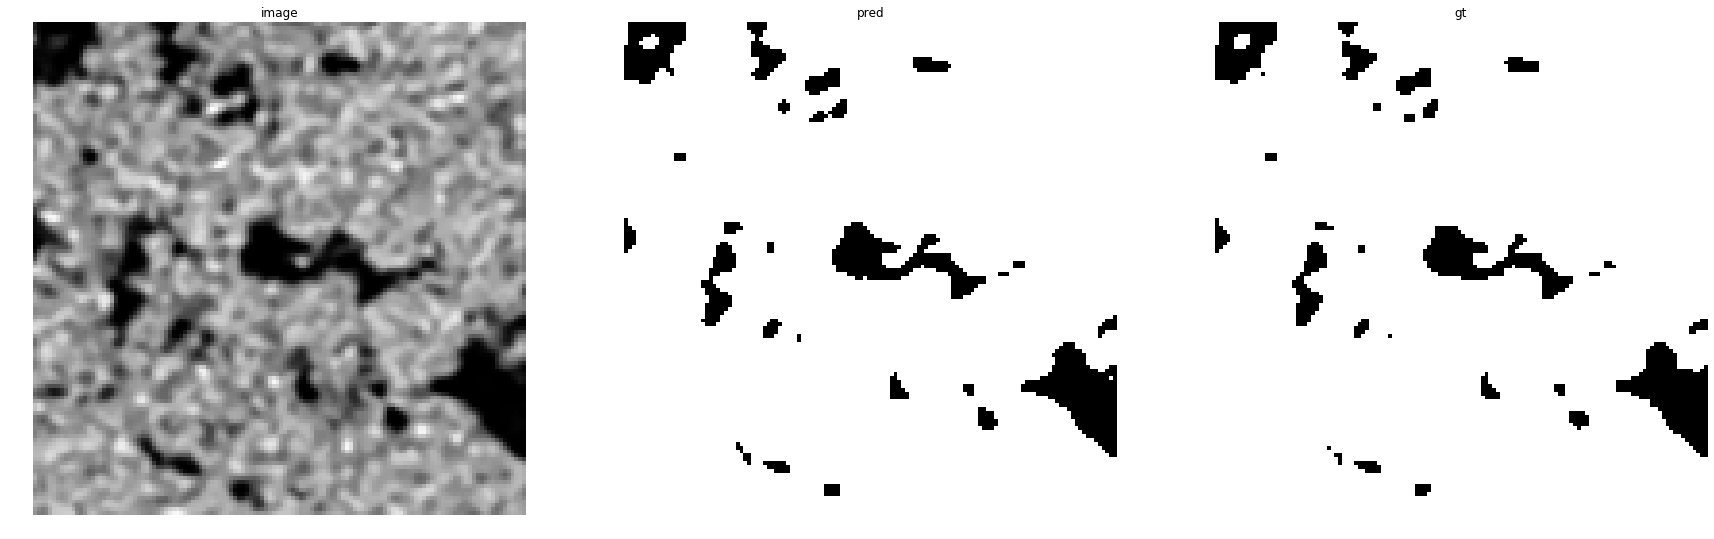

accuracy    : 0.99420166015625
precision   : 0.9994036180504937
recall      : 0.9943301687763713
f1          : 0.996860438216729
pr_auc      : 0.999980603660024
iou         : 0.9937405284311788


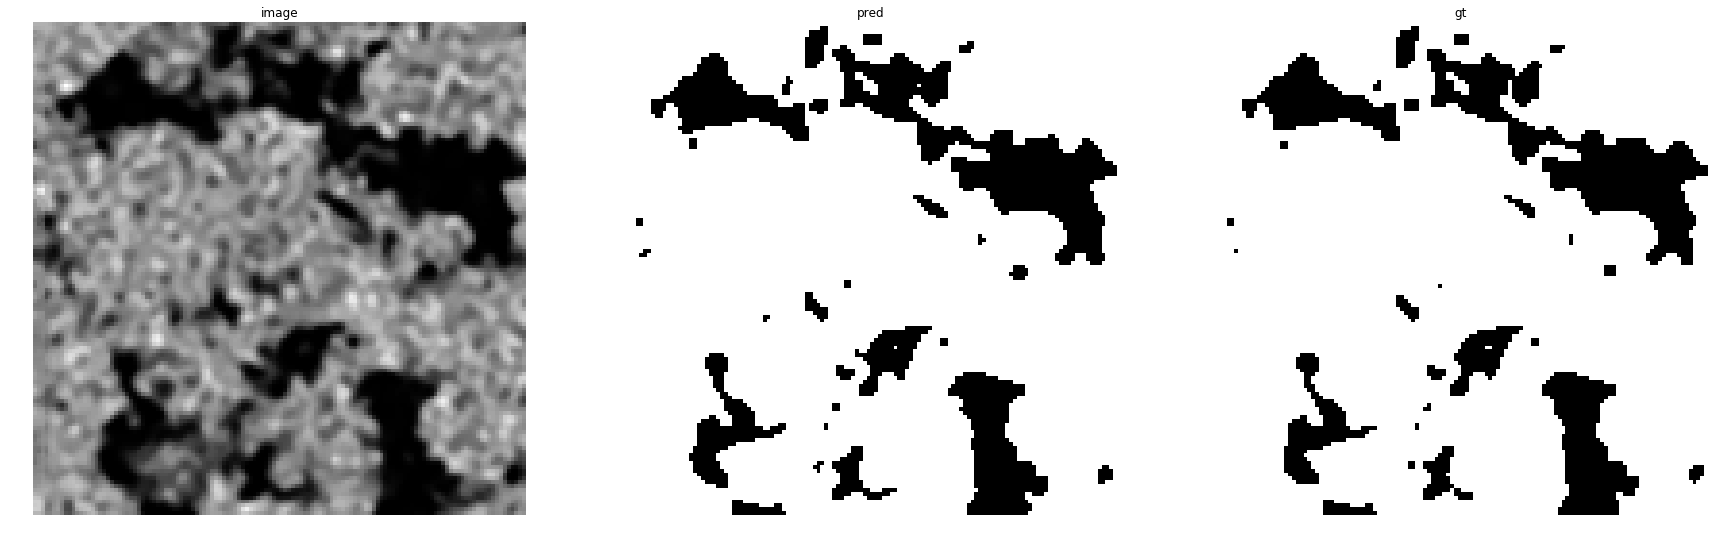

accuracy    : 0.990966796875
precision   : 0.9991833098225555
recall      : 0.9899227657226922
f1          : 0.9945314809340822
pr_auc      : 0.9999395574773632
iou         : 0.9891224459797149


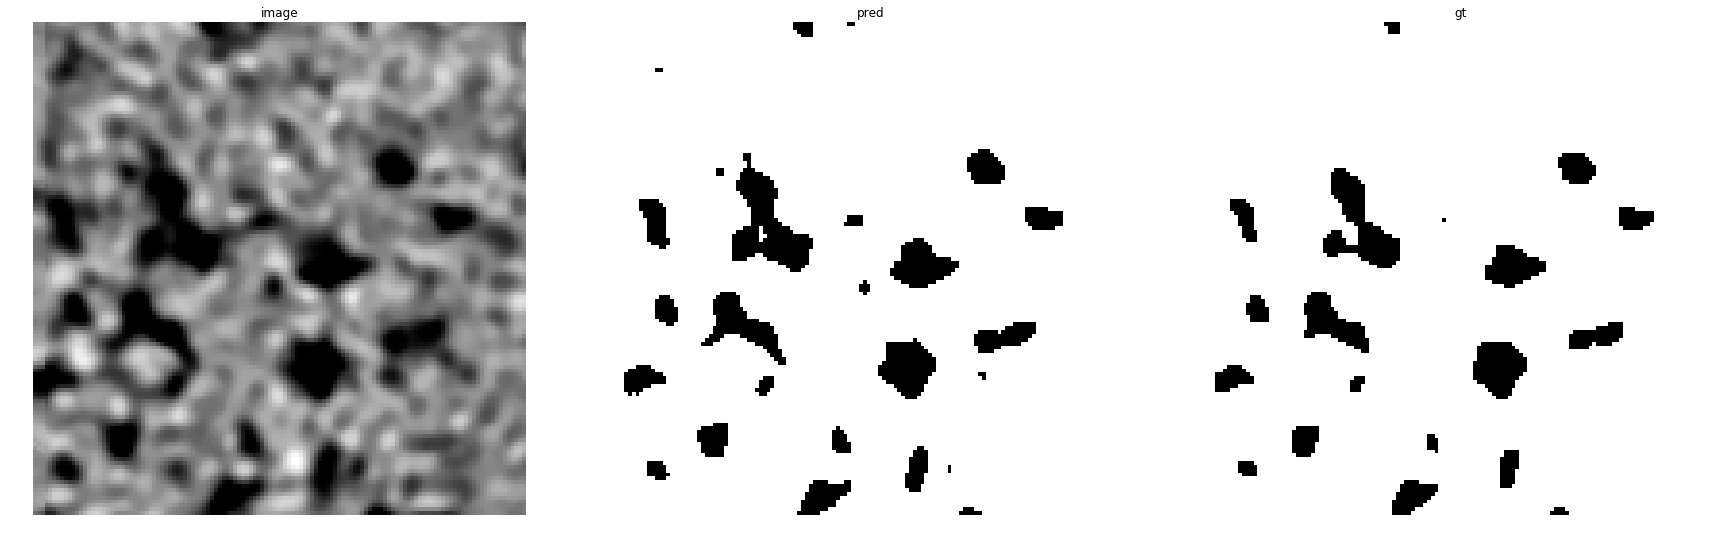

accuracy    : 0.983642578125
precision   : 0.9999331193151418
recall      : 0.9824549875147851
f1          : 0.991117003646006
pr_auc      : 0.9999387805470741
iou         : 0.9823904330113674


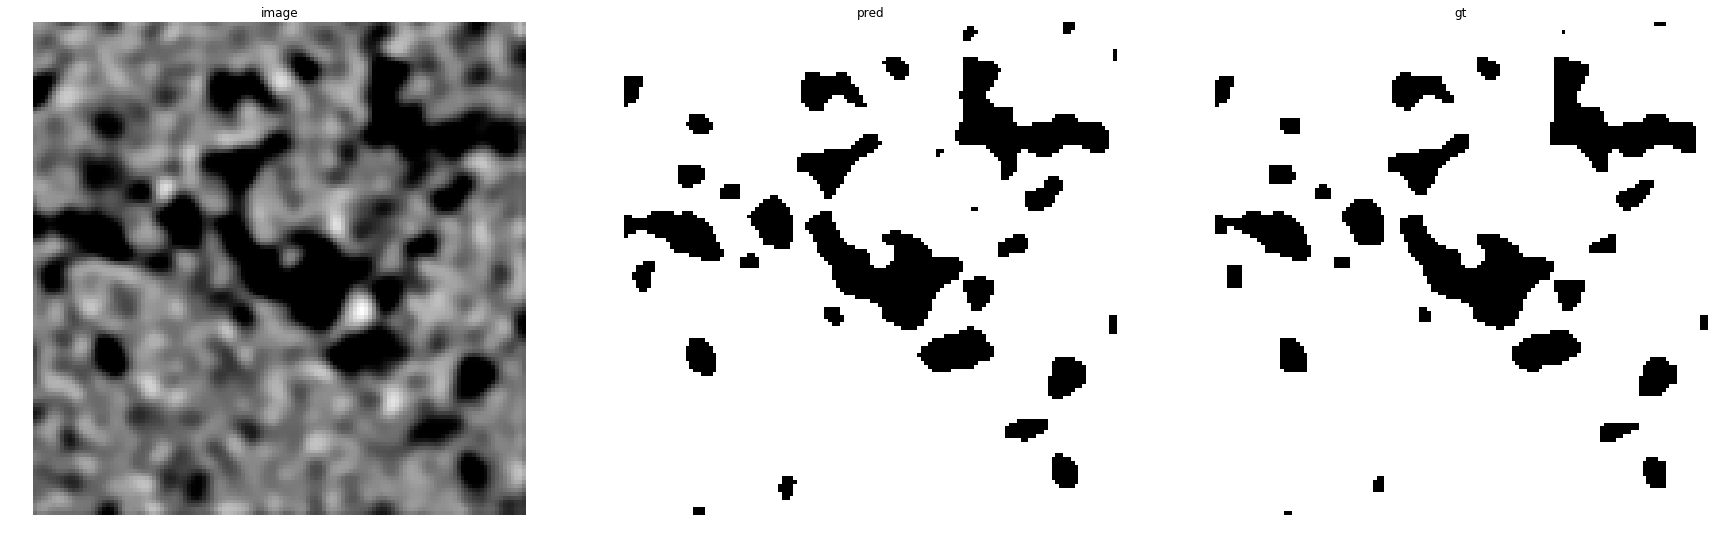

accuracy    : 0.98406982421875
precision   : 0.9994266876881182
recall      : 0.9821818437918163
f1          : 0.9907292295670089
pr_auc      : 0.9998532781205148
iou         : 0.9816287745477581


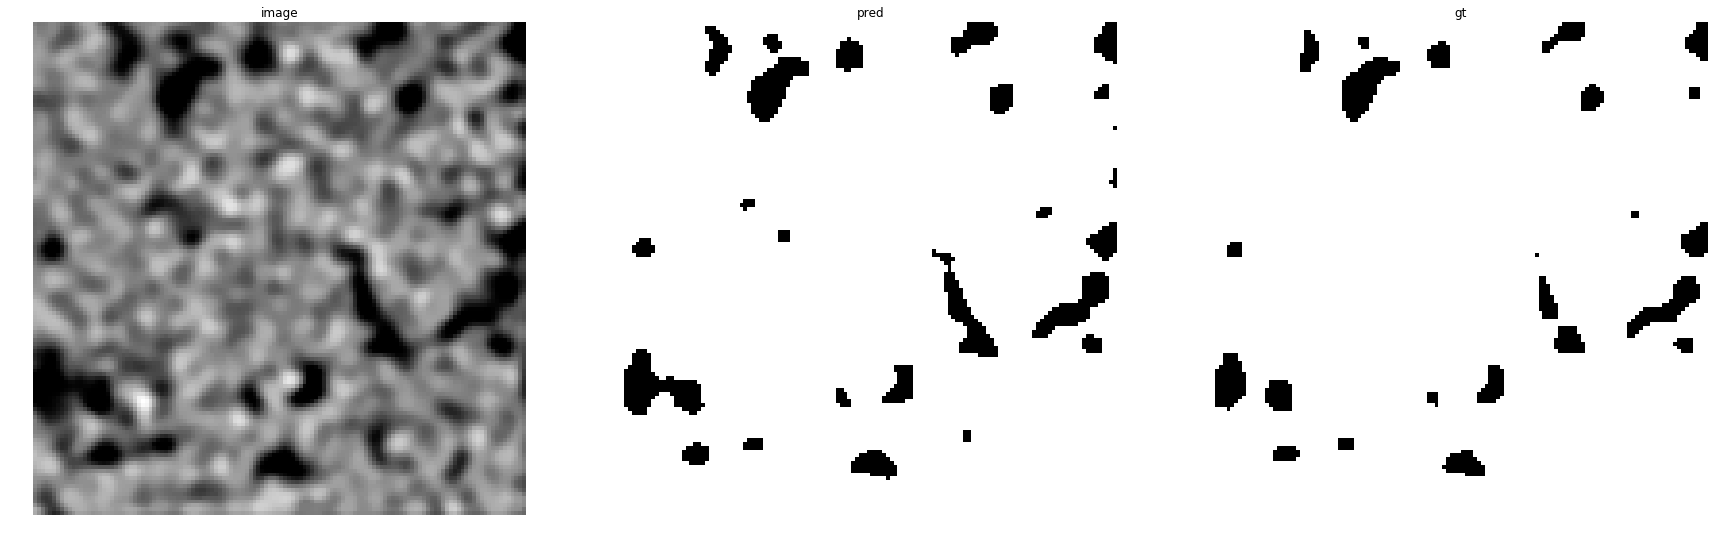

accuracy    : 0.9818115234375
precision   : 0.9997364433023654
recall      : 0.9809917889700653
f1          : 0.9902754209633208
pr_auc      : 0.9999362039849767
iou         : 0.980738155258225


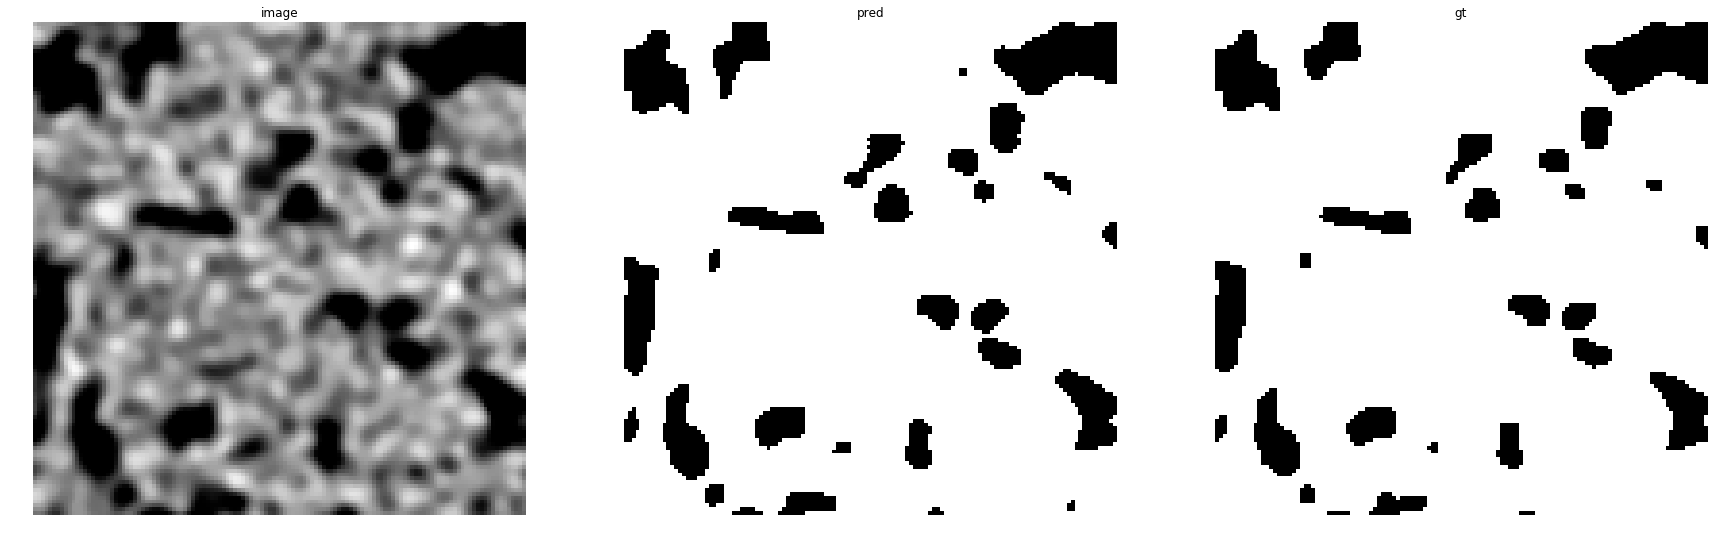

accuracy    : 0.9833984375
precision   : 0.999353076480736
recall      : 0.981434420443315
f1          : 0.9903127003347816
pr_auc      : 0.9998633595556554
iou         : 0.9808112874779541


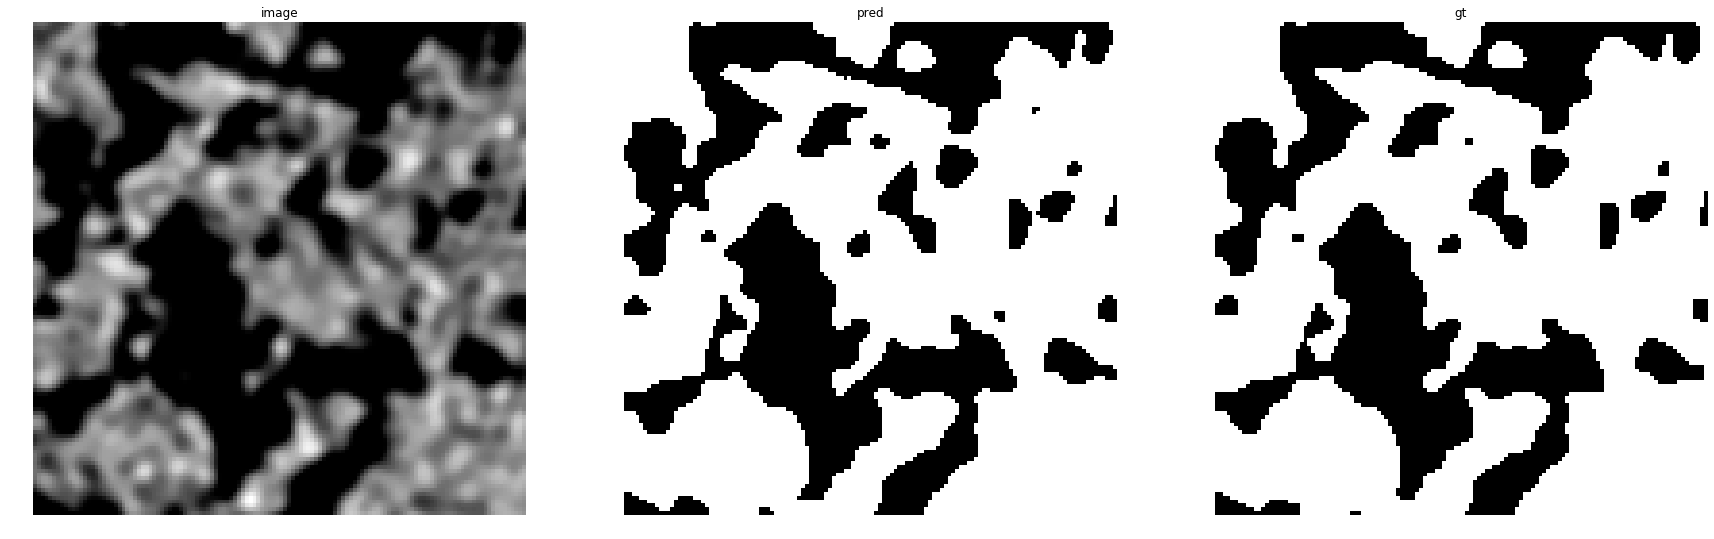

accuracy    : 0.98394775390625
precision   : 0.9933848877294326
recall      : 0.982310668877833
f1          : 0.9878167415574187
pr_auc      : 0.9994964832692508
iou         : 0.9759267734553776


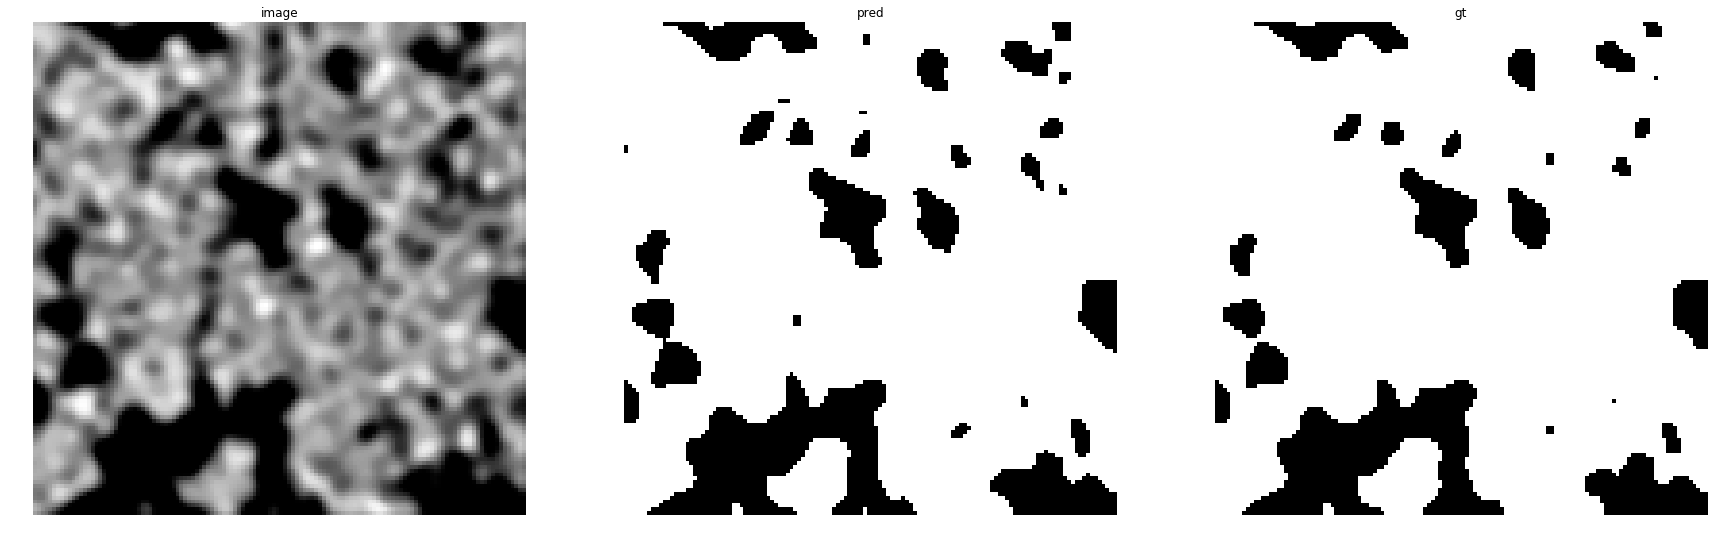

accuracy    : 0.98175048828125
precision   : 0.9997739431843871
recall      : 0.9781775287525803
f1          : 0.988857834917086
pr_auc      : 0.9998406586033927
iou         : 0.9779612294538218


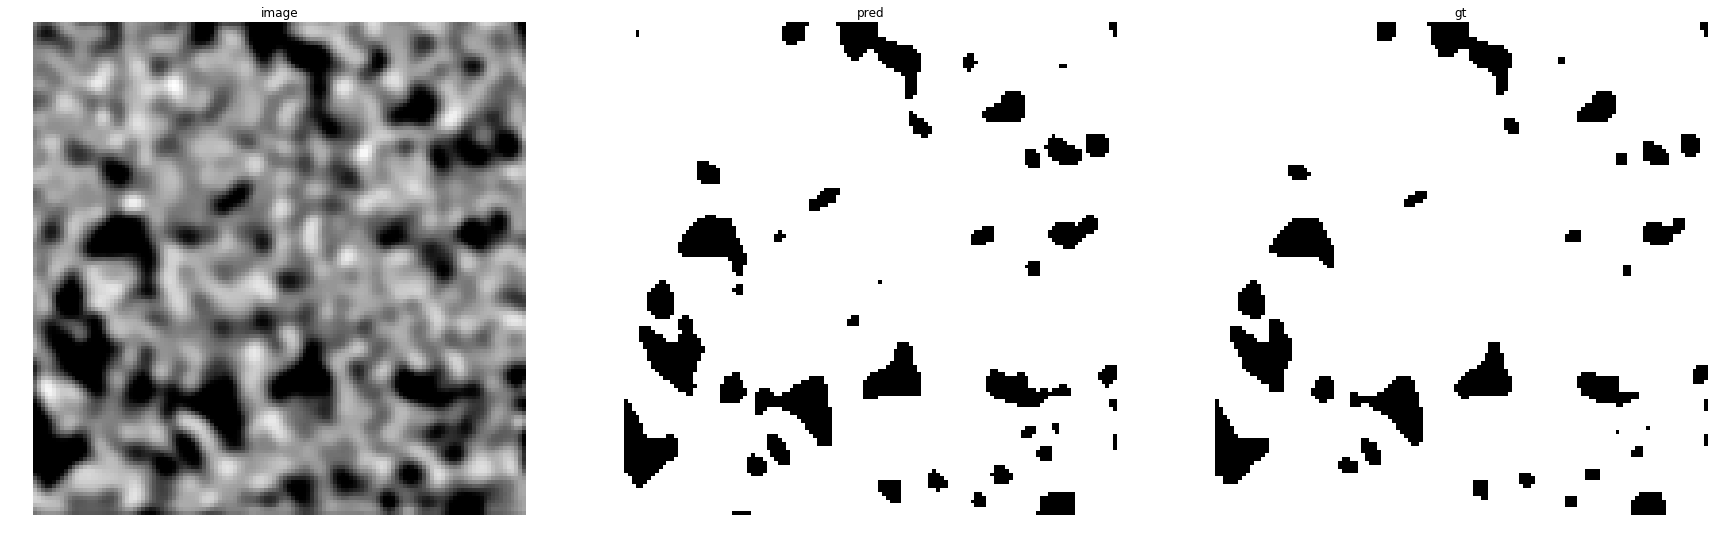

accuracy    : 0.97784423828125
precision   : 0.999792559811921
recall      : 0.9757068628112558
f1          : 0.9876028824152181
pr_auc      : 0.9998627789079848
iou         : 0.9755093779516935


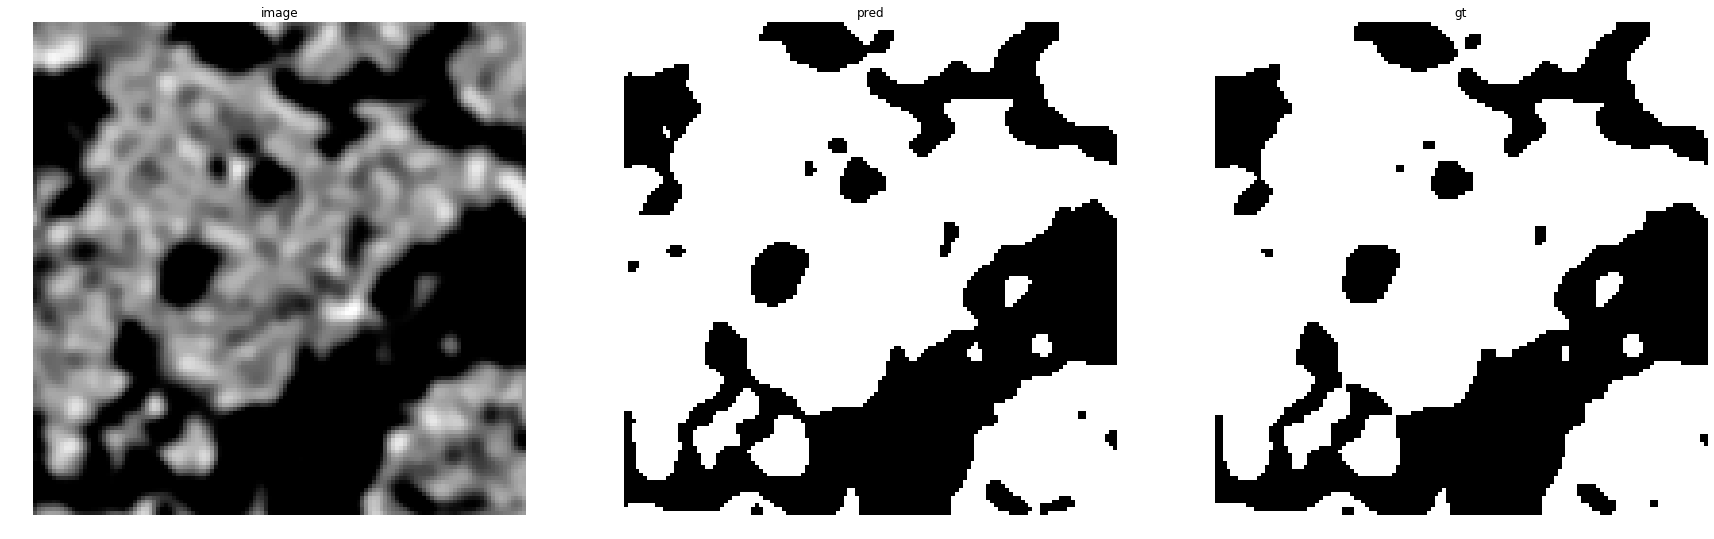

accuracy    : 0.98175048828125
precision   : 0.9970278044103548
recall      : 0.9748757851317147
f1          : 0.9858273688202114
pr_auc      : 0.9996243735024342
iou         : 0.9720508506262853


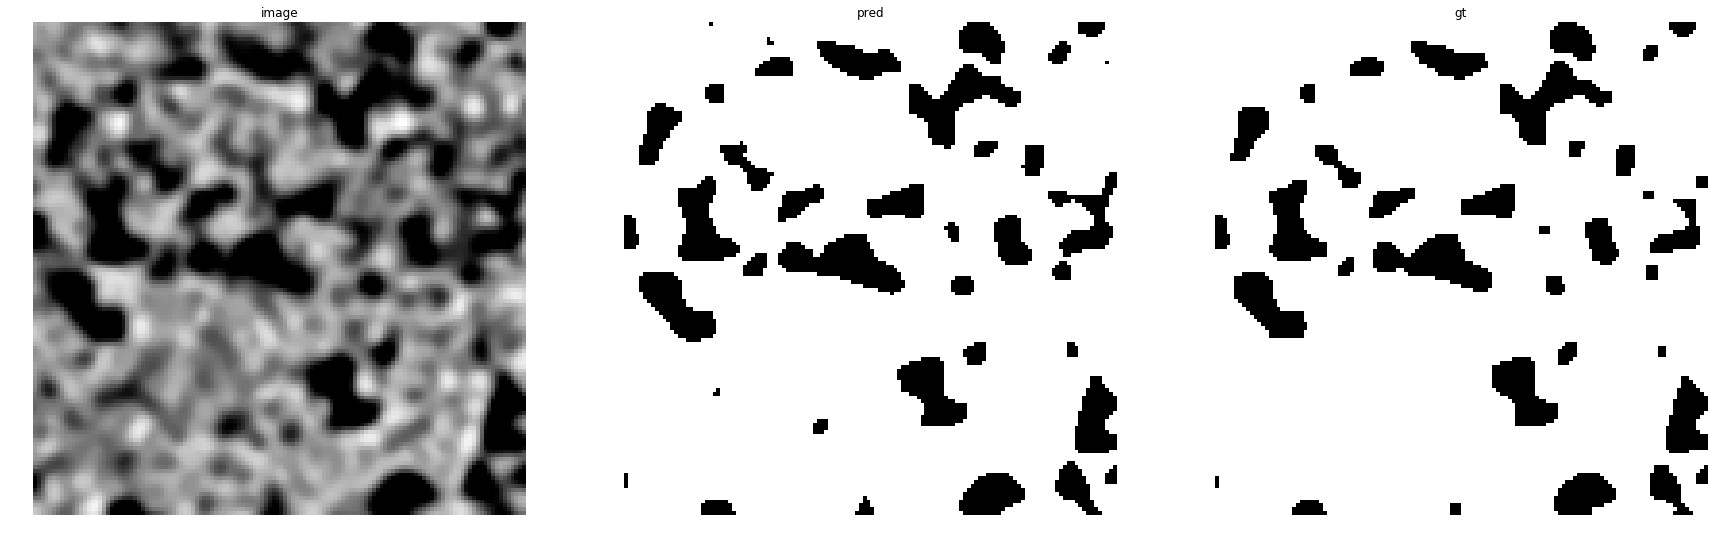

accuracy    : 0.97955322265625
precision   : 0.9991964937910884
recall      : 0.9768621009783618
f1          : 0.9879030802007728
pr_auc      : 0.9997804647576499
iou         : 0.9760953332381904


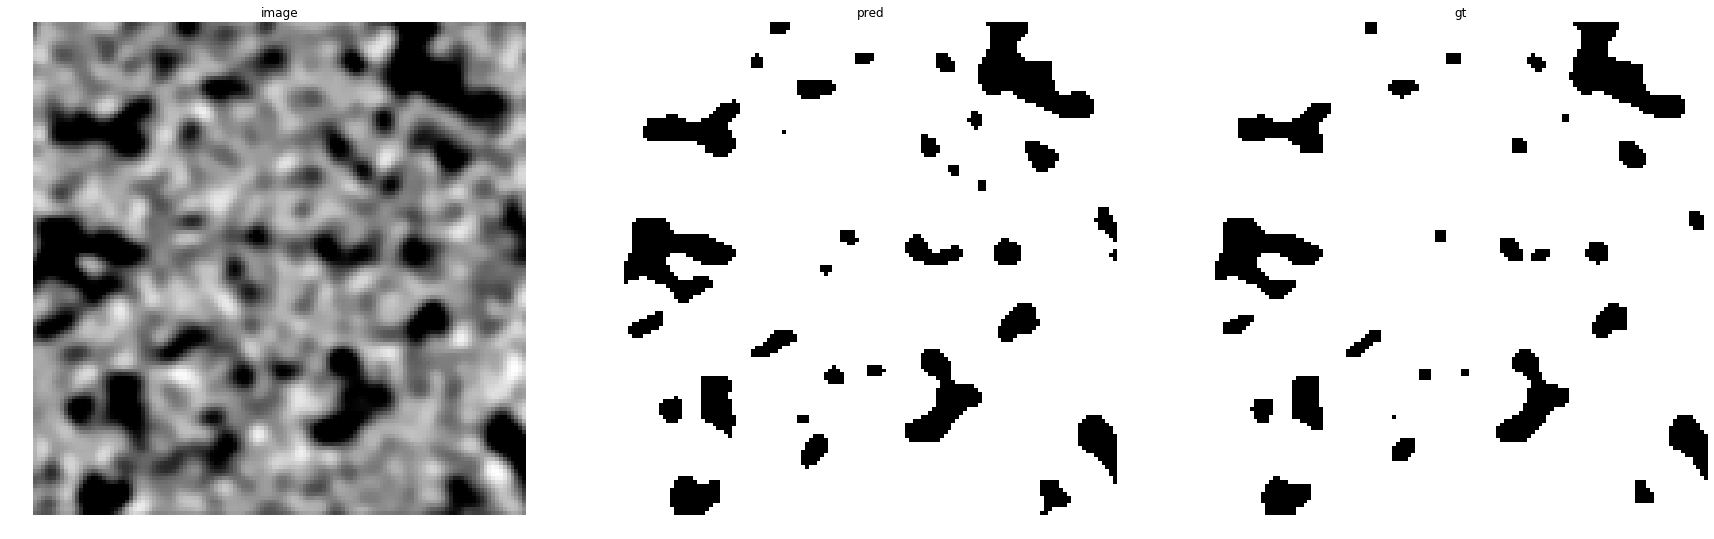

accuracy    : 0.97711181640625
precision   : 0.9996507160321342
recall      : 0.9747956403269755
f1          : 0.9870667356440765
pr_auc      : 0.9998957770790151
iou         : 0.9744637385086823


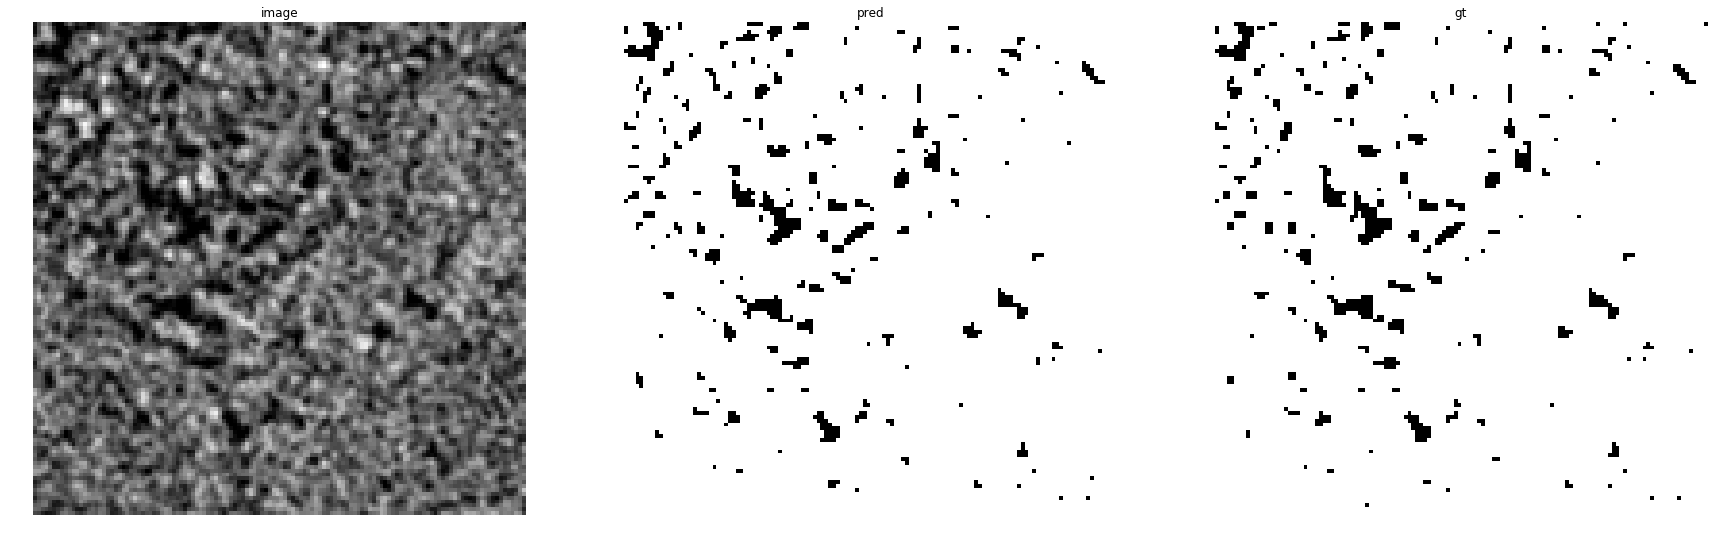

accuracy    : 0.99078369140625
precision   : 0.9958842443729904
recall      : 0.994413407821229
f1          : 0.9951482826205699
pr_auc      : 0.9999153724706498
iou         : 0.9903434162563152


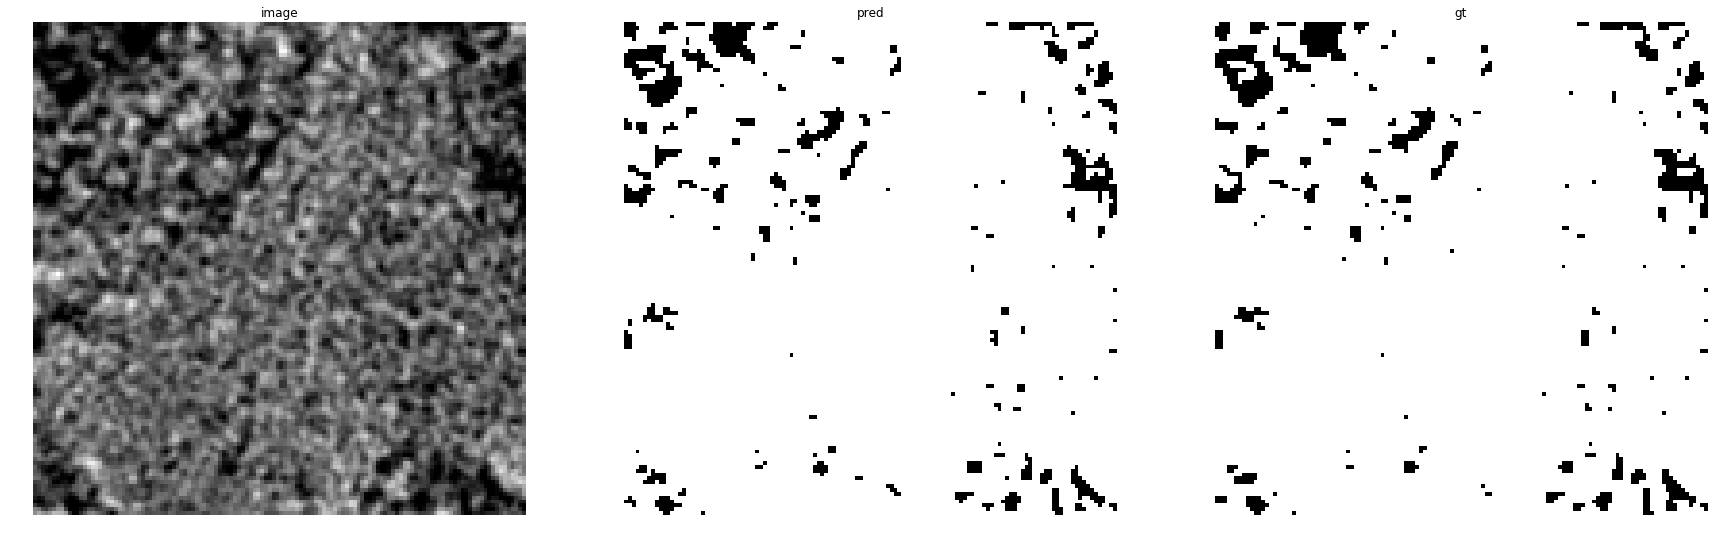

accuracy    : 0.98895263671875
precision   : 0.9937230286386818
recall      : 0.9944382647385984
f1          : 0.9940805180364326
pr_auc      : 0.9998684606690226
iou         : 0.9882307042070355


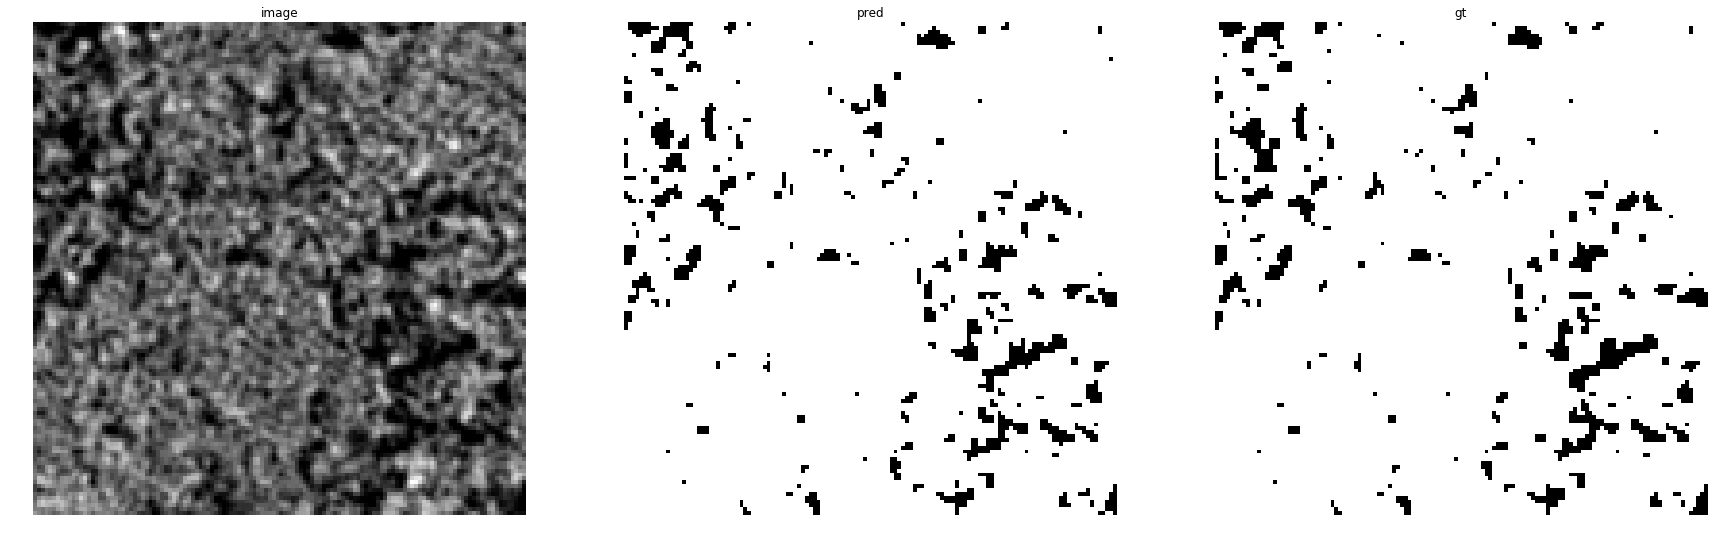

accuracy    : 0.987548828125
precision   : 0.9913457091894035
recall      : 0.9951588301611513
f1          : 0.9932486100079428
pr_auc      : 0.9997890996861973
iou         : 0.9865877712031558


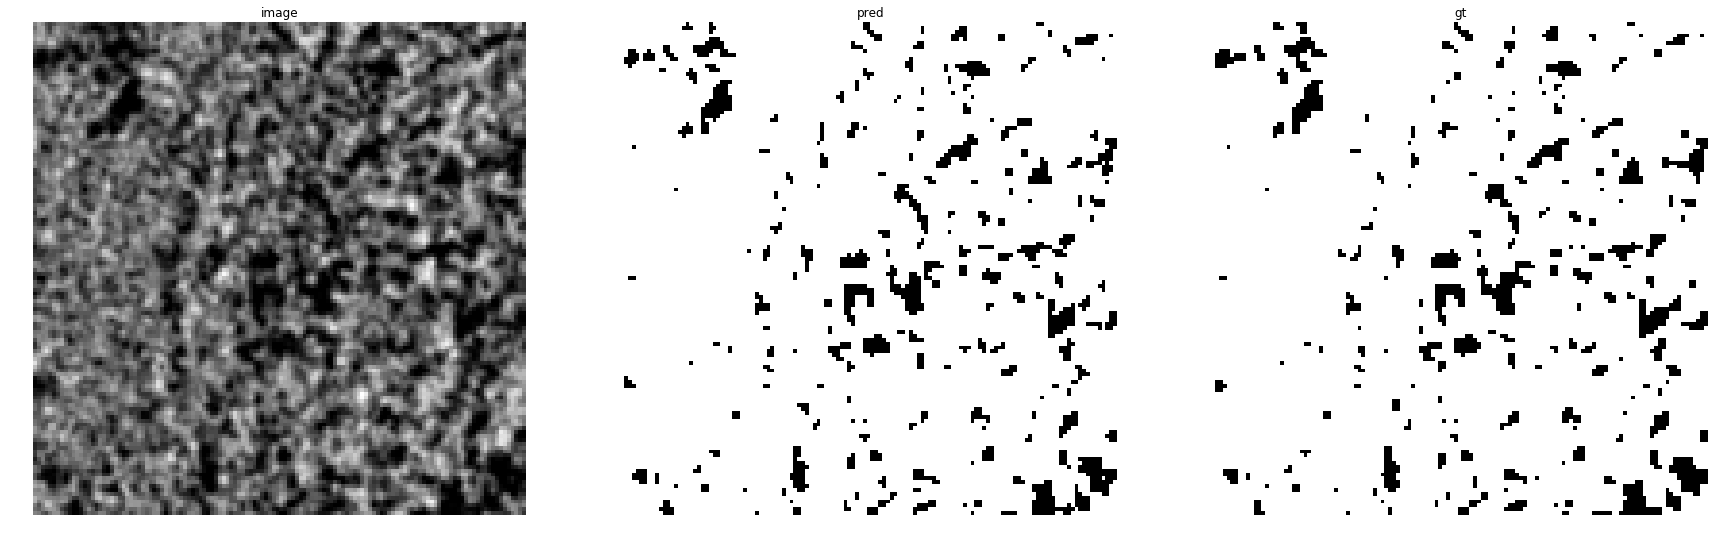

accuracy    : 0.98541259765625
precision   : 0.9912251322928528
recall      : 0.9927545954649134
f1          : 0.9919892743422155
pr_auc      : 0.9997599459987627
iou         : 0.9841058721819512


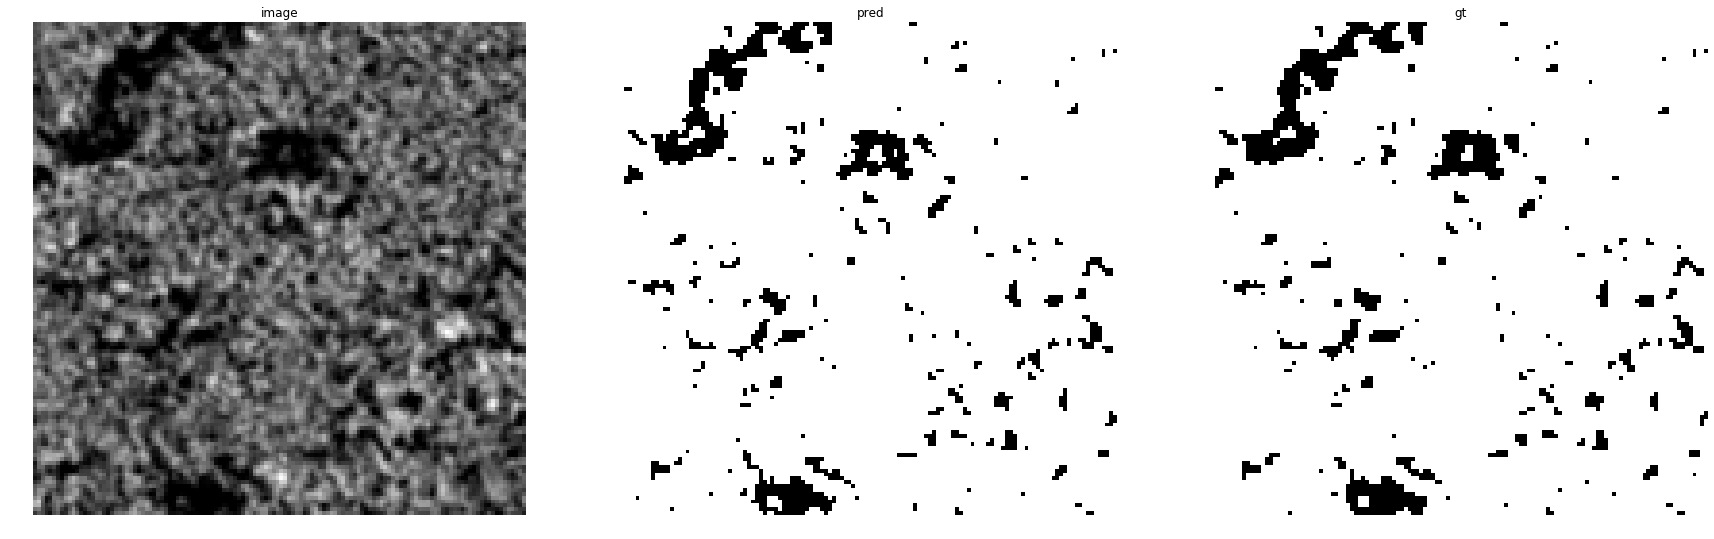

accuracy    : 0.98748779296875
precision   : 0.991898532439073
recall      : 0.994474034620506
f1          : 0.9931846138501945
pr_auc      : 0.9998273864145268
iou         : 0.9864614978206313


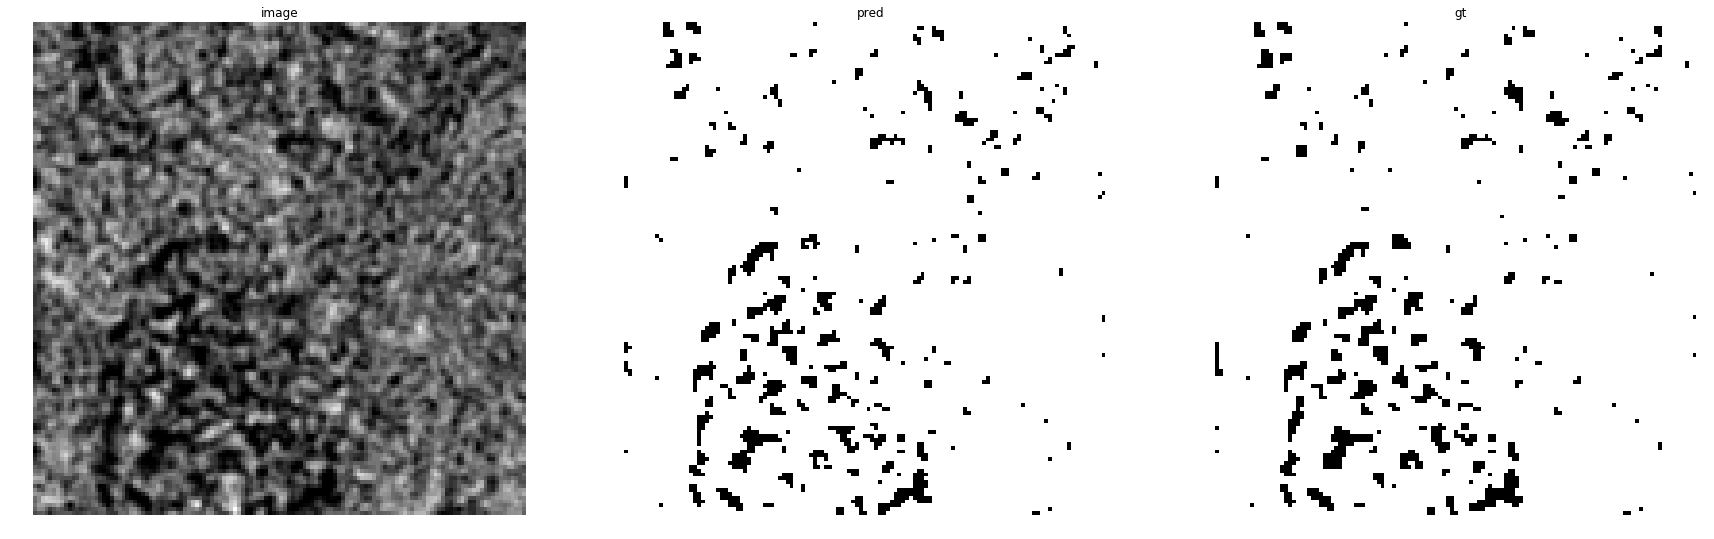

accuracy    : 0.98883056640625
precision   : 0.9928650191347214
recall      : 0.9952535760728218
f1          : 0.994057862778842
pr_auc      : 0.9998503197949178
iou         : 0.9881859264041317


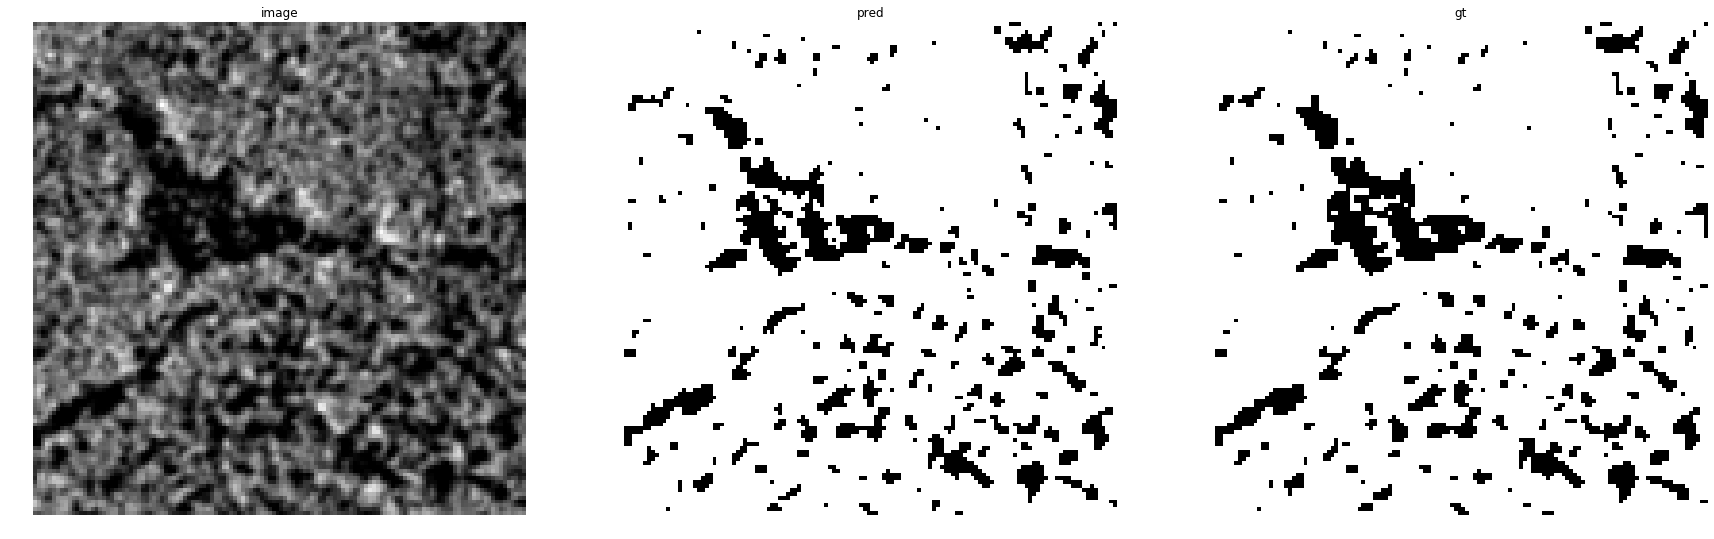

accuracy    : 0.98175048828125
precision   : 0.985895726615676
recall      : 0.9930732258976533
f1          : 0.9894714602626852
pr_auc      : 0.9995380272967006
iou         : 0.9791623109624364


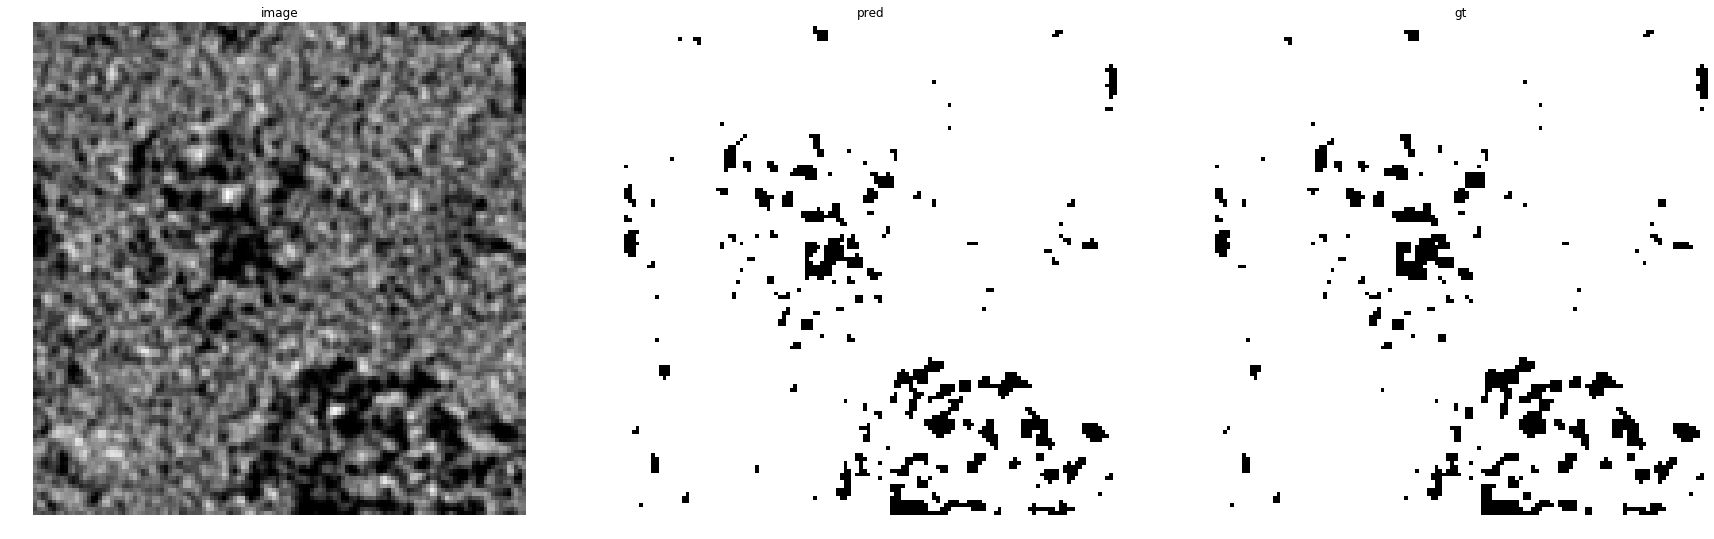

accuracy    : 0.99029541015625
precision   : 0.9935483870967742
recall      : 0.9960799686397491
f1          : 0.9948125672898112
pr_auc      : 0.9998889156834344
iou         : 0.9896786757546251


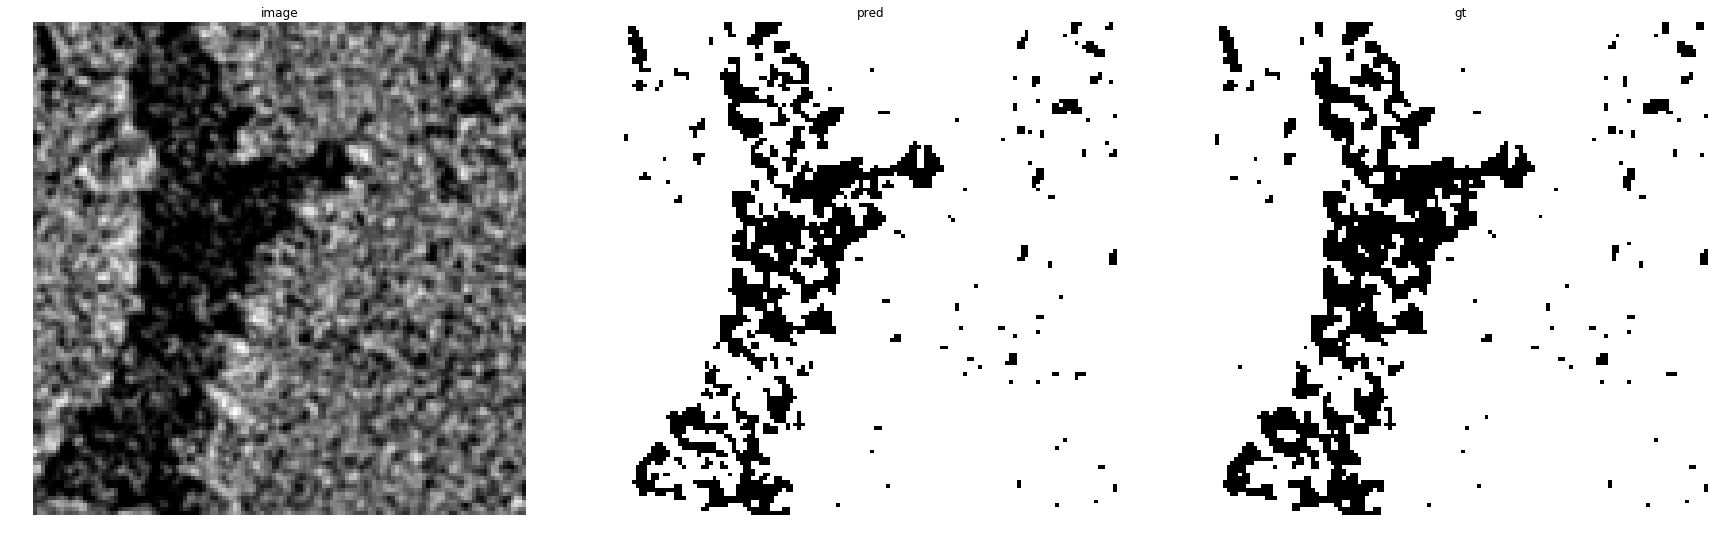

accuracy    : 0.97479248046875
precision   : 0.975780752071383
recall      : 0.9948736462093862
f1          : 0.985234707375496
pr_auc      : 0.9993495381648148
iou         : 0.9708990980834273


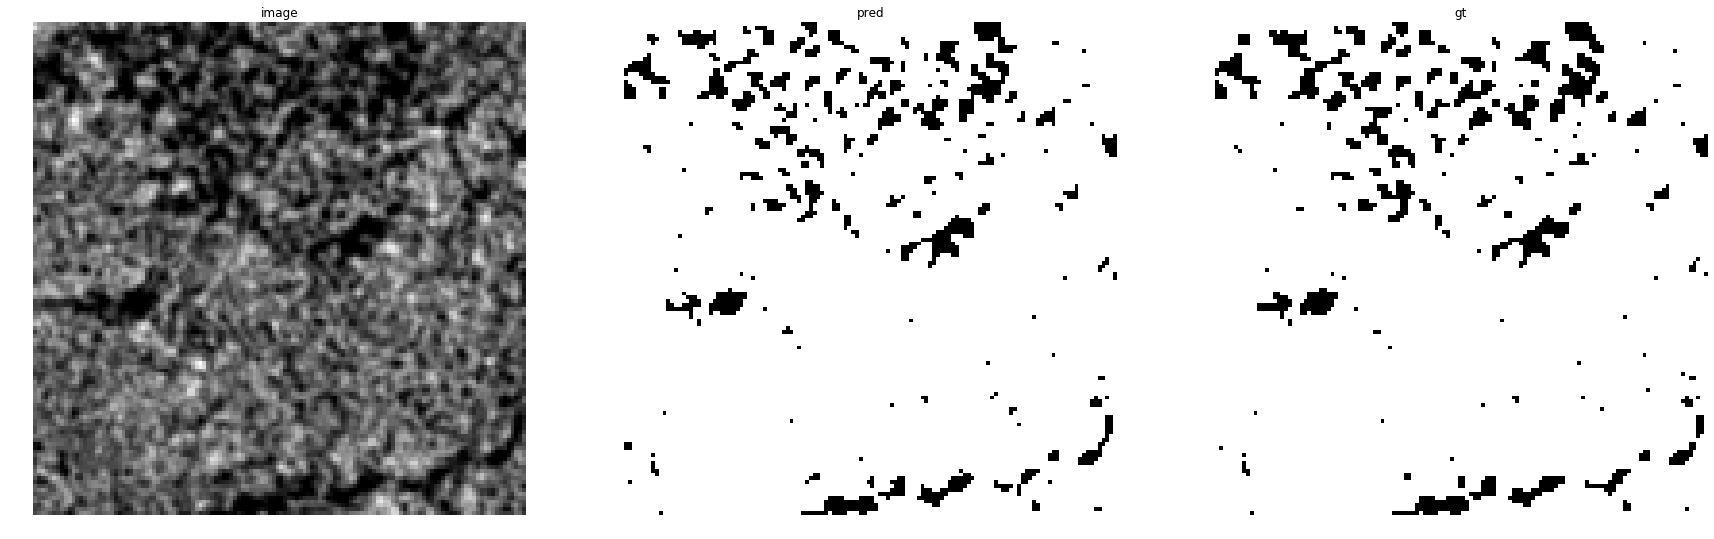

accuracy    : 0.9869384765625
precision   : 0.9901791639017916
recall      : 0.9955964771817454
f1          : 0.9928804311664117
pr_auc      : 0.9998122400697951
iou         : 0.9858615221987315


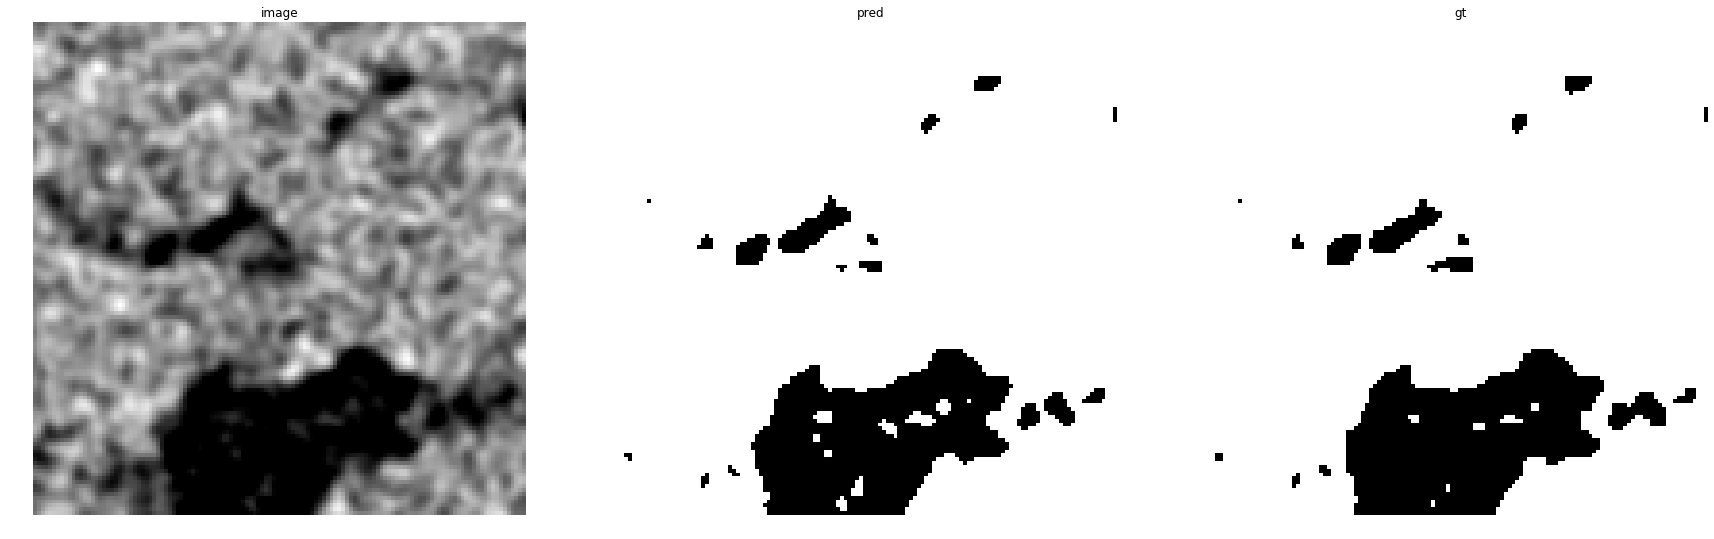

accuracy    : 0.99090576171875
precision   : 0.9906232374506486
recall      : 0.99886258619464
f1          : 0.9947258504123748
pr_auc      : 0.9999371828317731
iou         : 0.9895070422535212


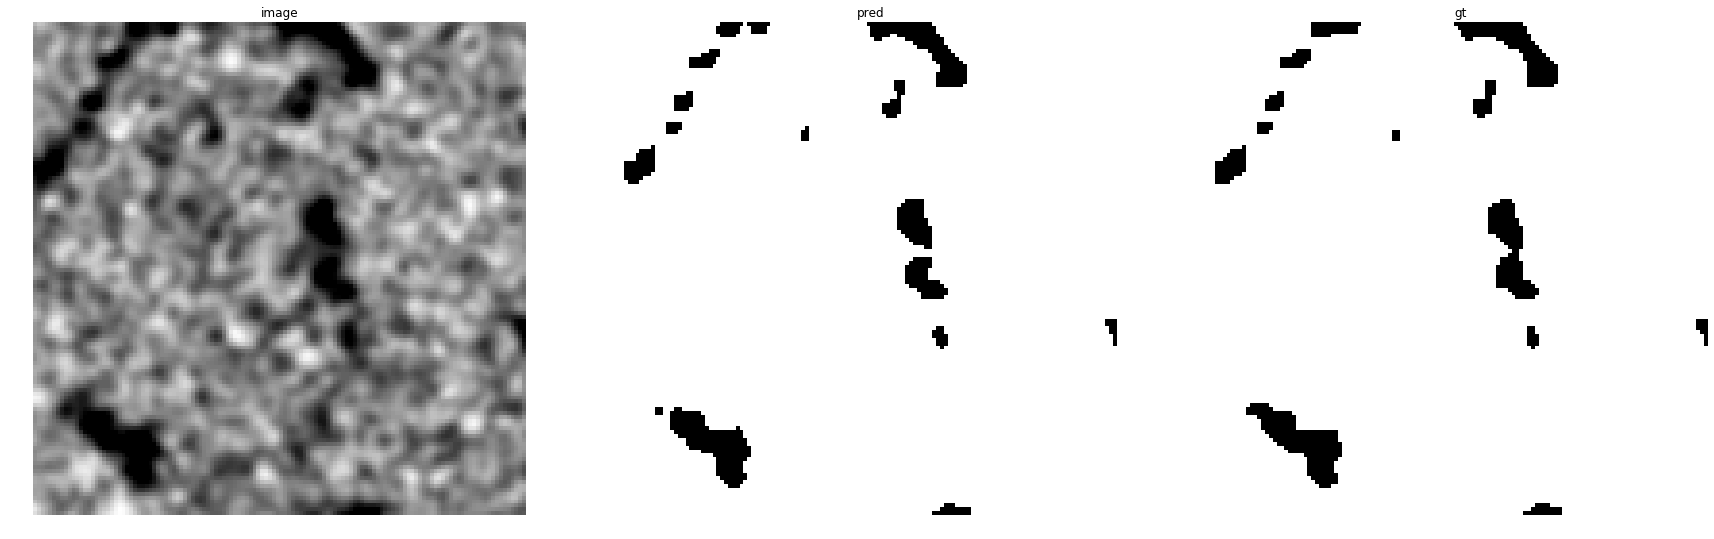

accuracy    : 0.99578857421875
precision   : 0.9965402357765248
recall      : 0.999036546984392
f1          : 0.9977868300349617
pr_auc      : 0.9999714617211009
iou         : 0.995583434679639


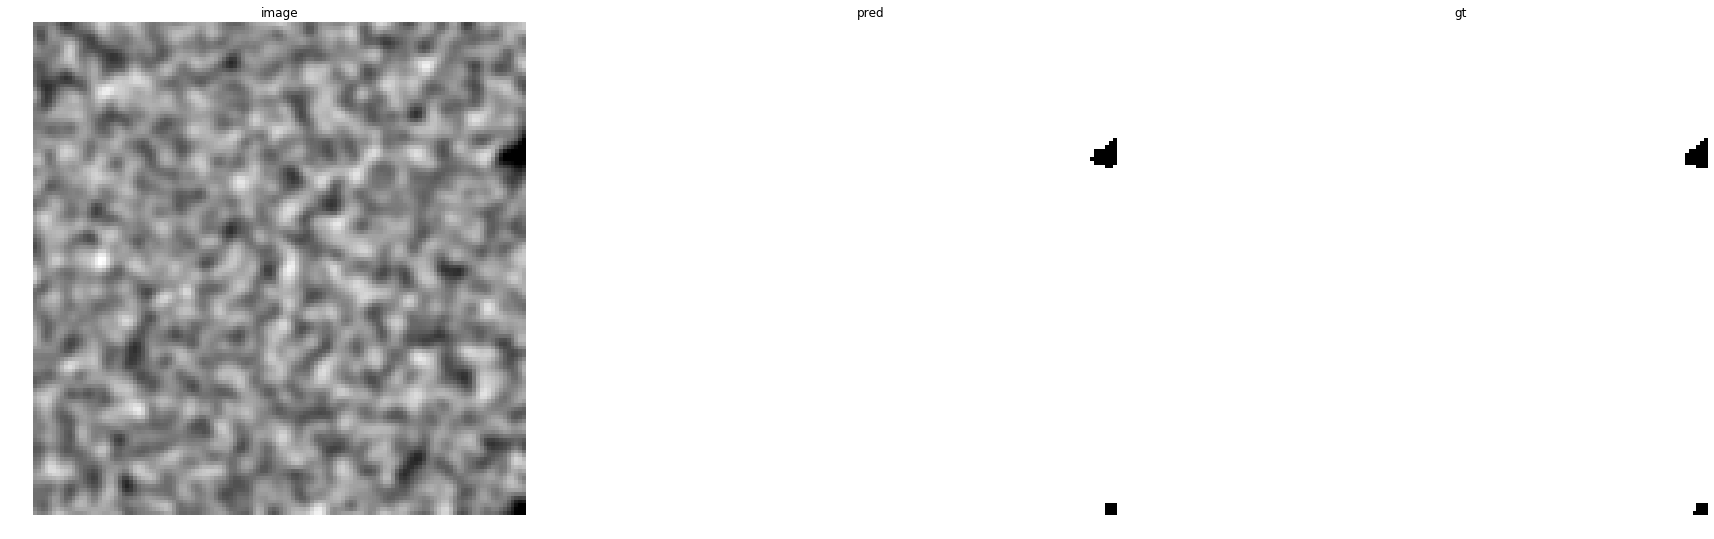

accuracy    : 0.999755859375
precision   : 0.9998776159588789
recall      : 0.9998776159588789
f1          : 0.9998776159588789
pr_auc      : 0.9999999662991417
iou         : 0.9997552618697993


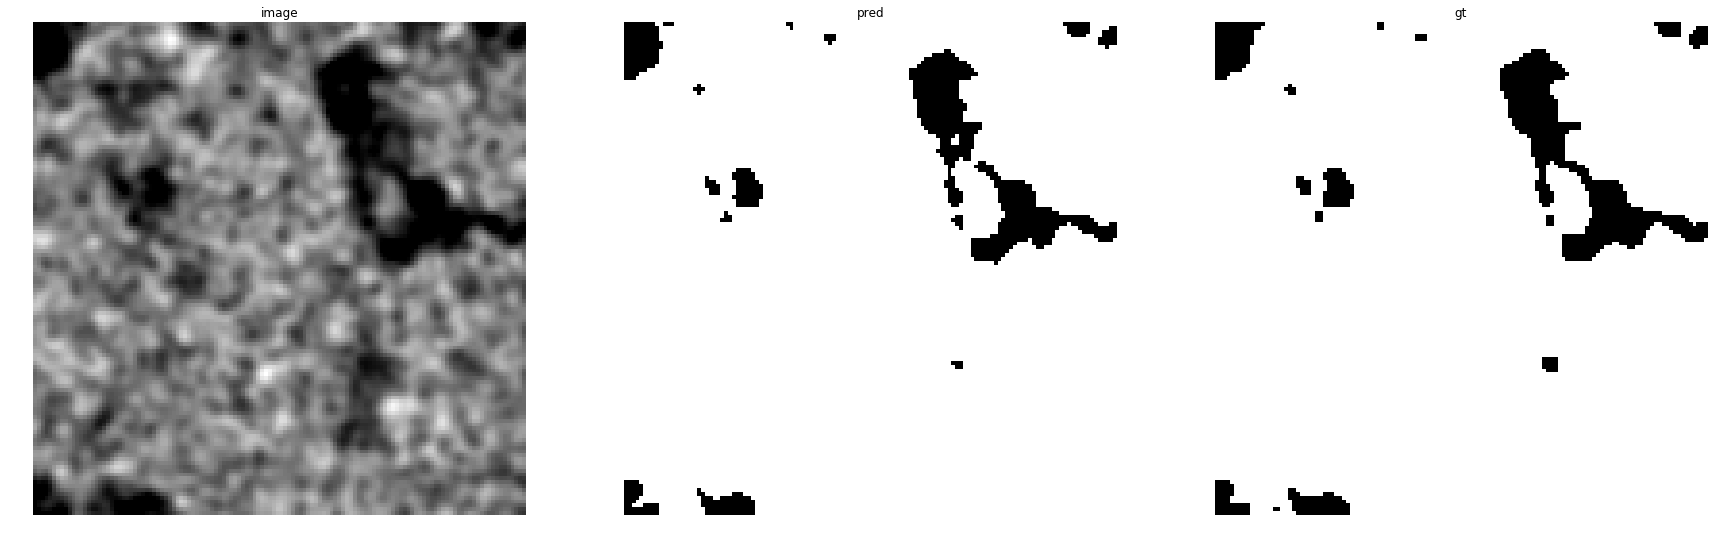

accuracy    : 0.9925537109375
precision   : 0.9926090653410949
recall      : 0.9994073098452421
f1          : 0.995996587254709
pr_auc      : 0.9999584994527946
iou         : 0.9920251013204341


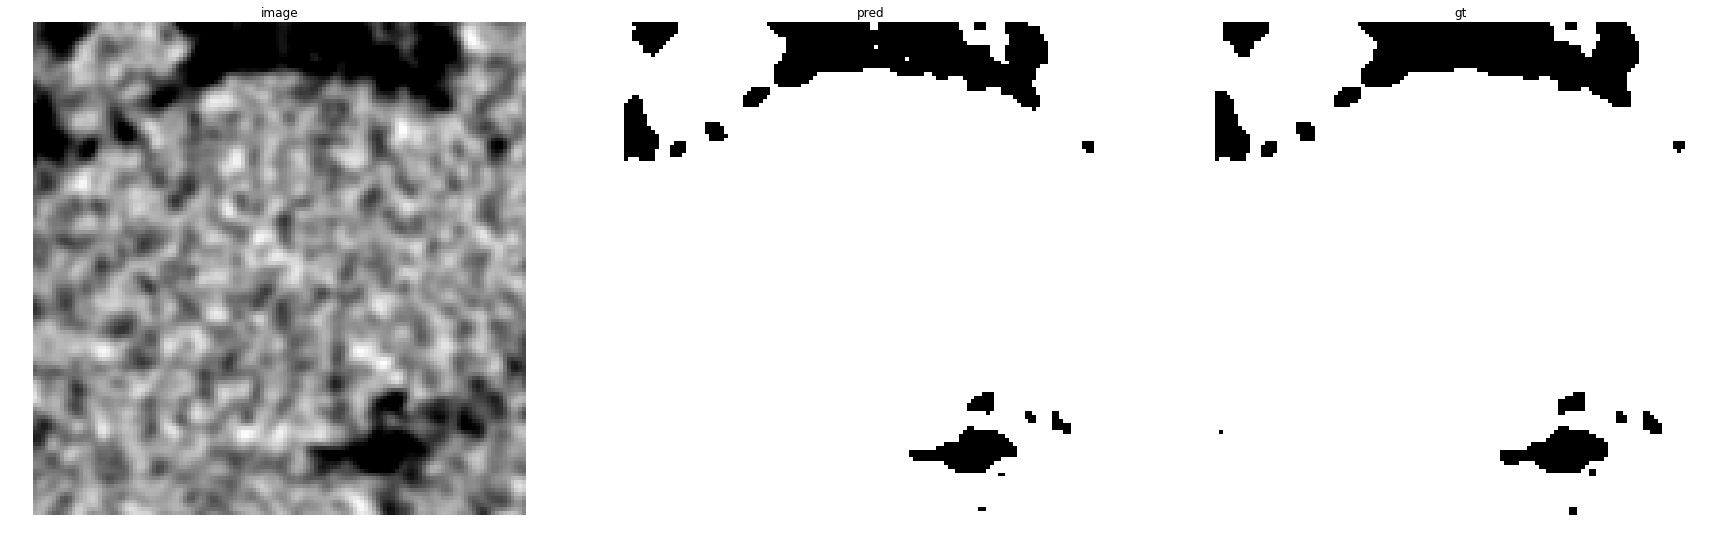

accuracy    : 0.9947509765625
precision   : 0.994570317736962
recall      : 0.9996631181781431
f1          : 0.9971102150537634
pr_auc      : 0.9999737264741025
iou         : 0.9942370836963077


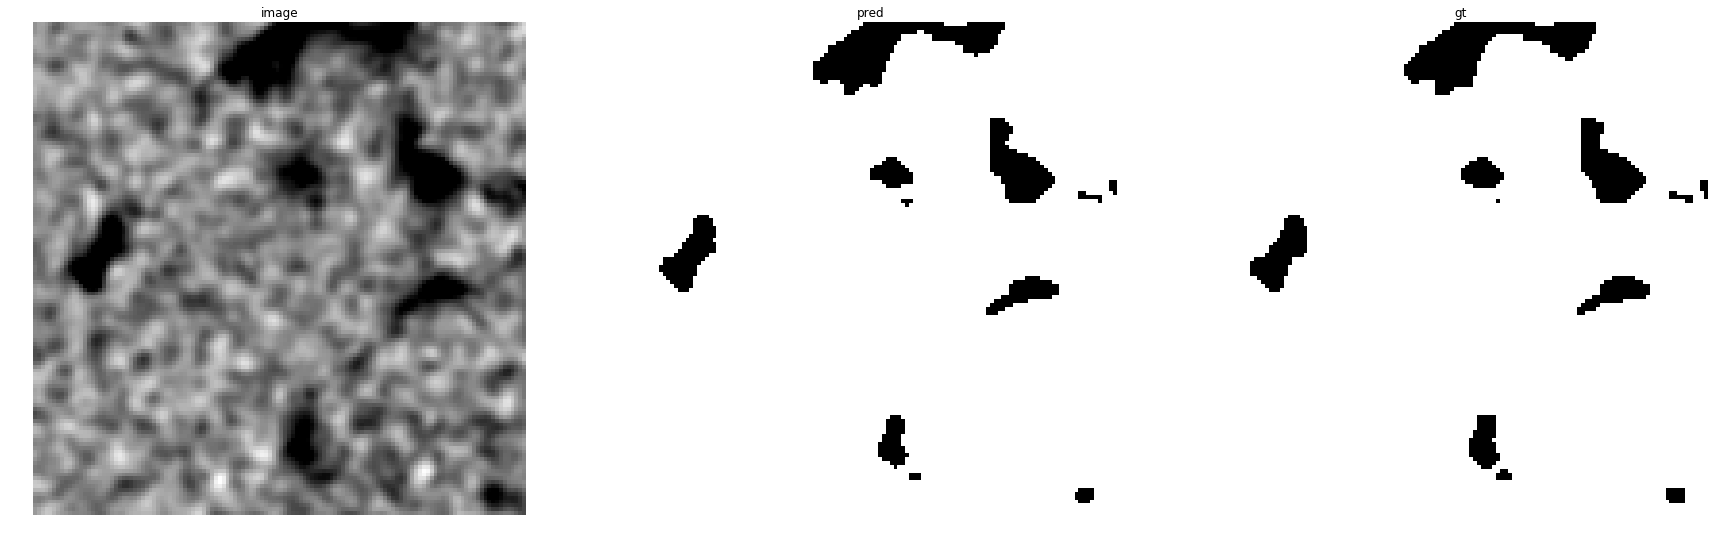

accuracy    : 0.99566650390625
precision   : 0.9960309714360075
recall      : 0.9993471732602167
f1          : 0.9976863166813308
pr_auc      : 0.9999833281731968
iou         : 0.9953833149099421


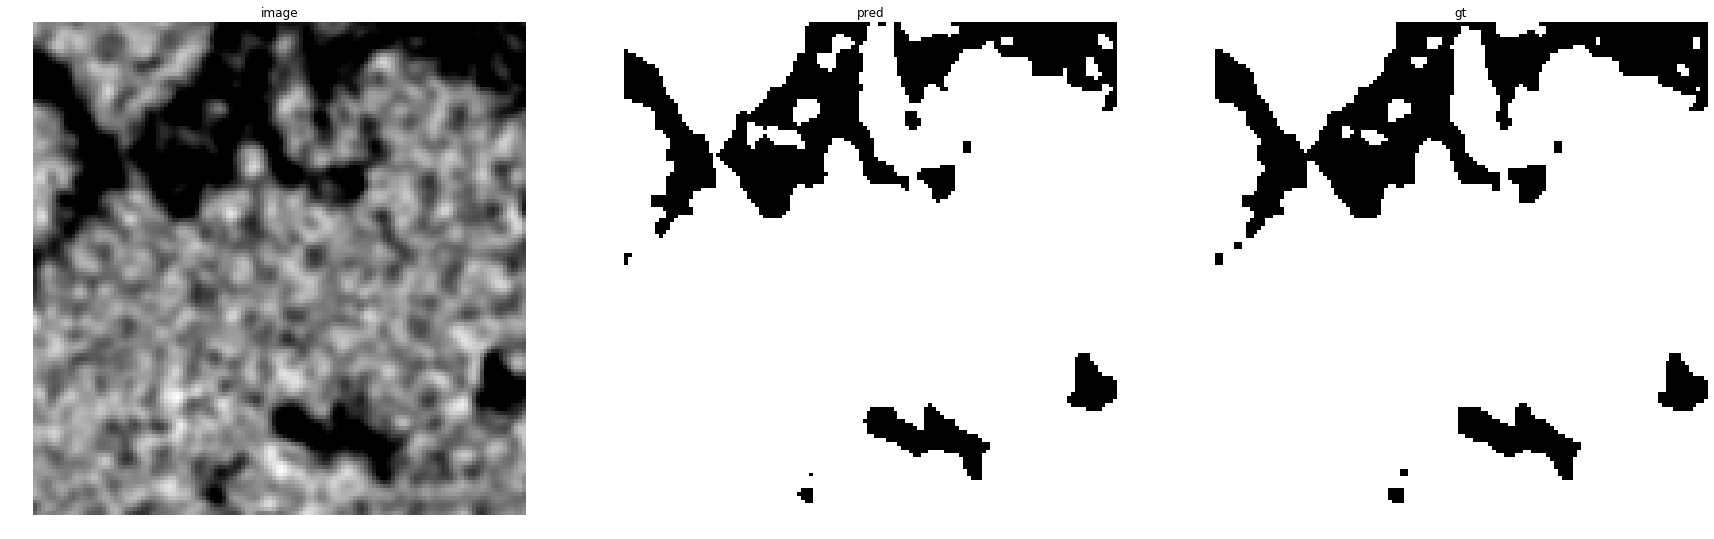

accuracy    : 0.98486328125
precision   : 0.9826156531859179
recall      : 0.9993342210386151
f1          : 0.9909044230910291
pr_auc      : 0.9998907867666766
iou         : 0.9819728138402268


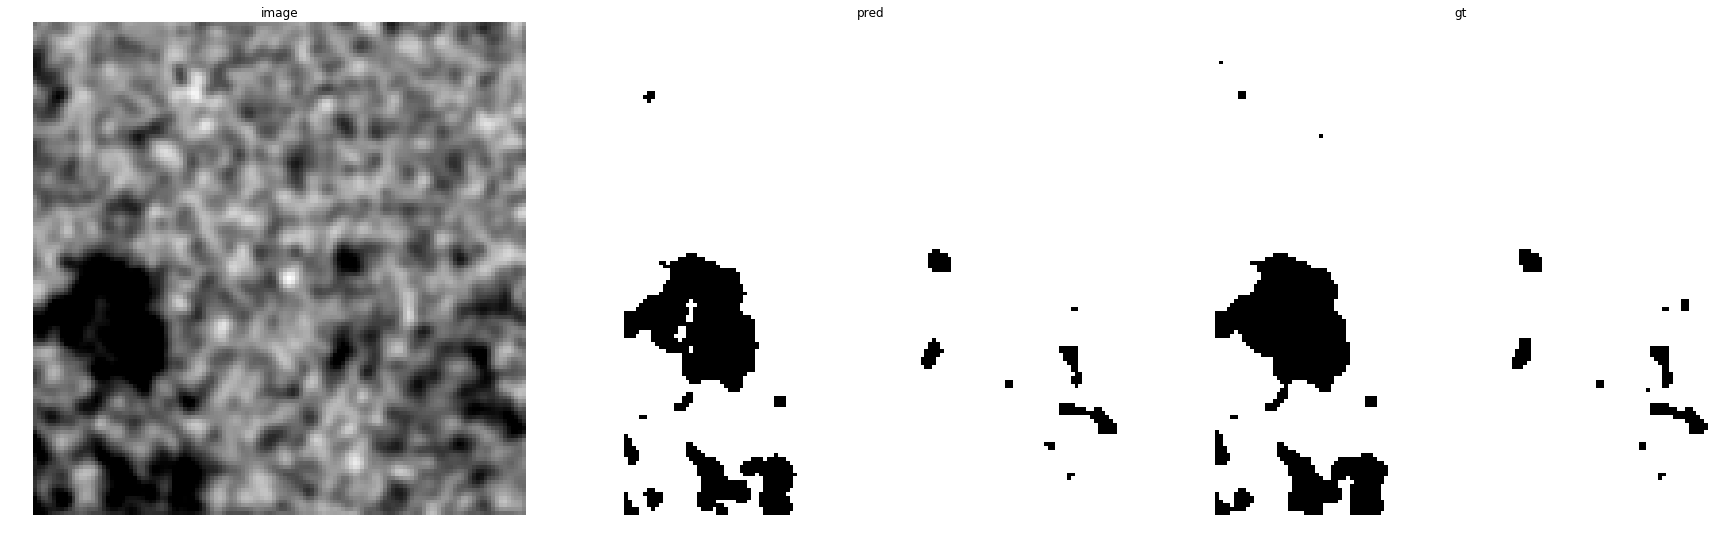

accuracy    : 0.9920654296875
precision   : 0.992198347107438
recall      : 0.9992010120514015
f1          : 0.9956873673036094
pr_auc      : 0.9999515352974678
iou         : 0.9914117724780339


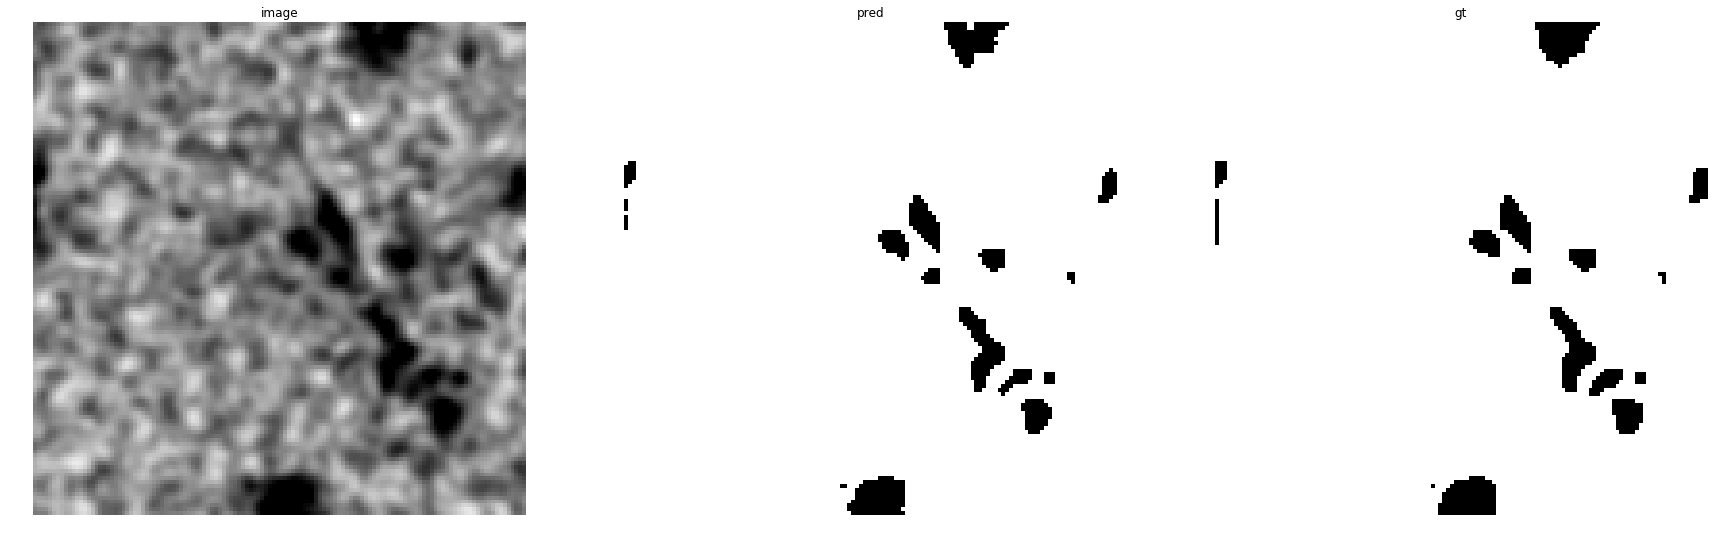

accuracy    : 0.9957275390625
precision   : 0.9962458640875541
recall      : 0.9992979320908859
f1          : 0.9977695641091001
pr_auc      : 0.999981570106468
iou         : 0.9955490557639728


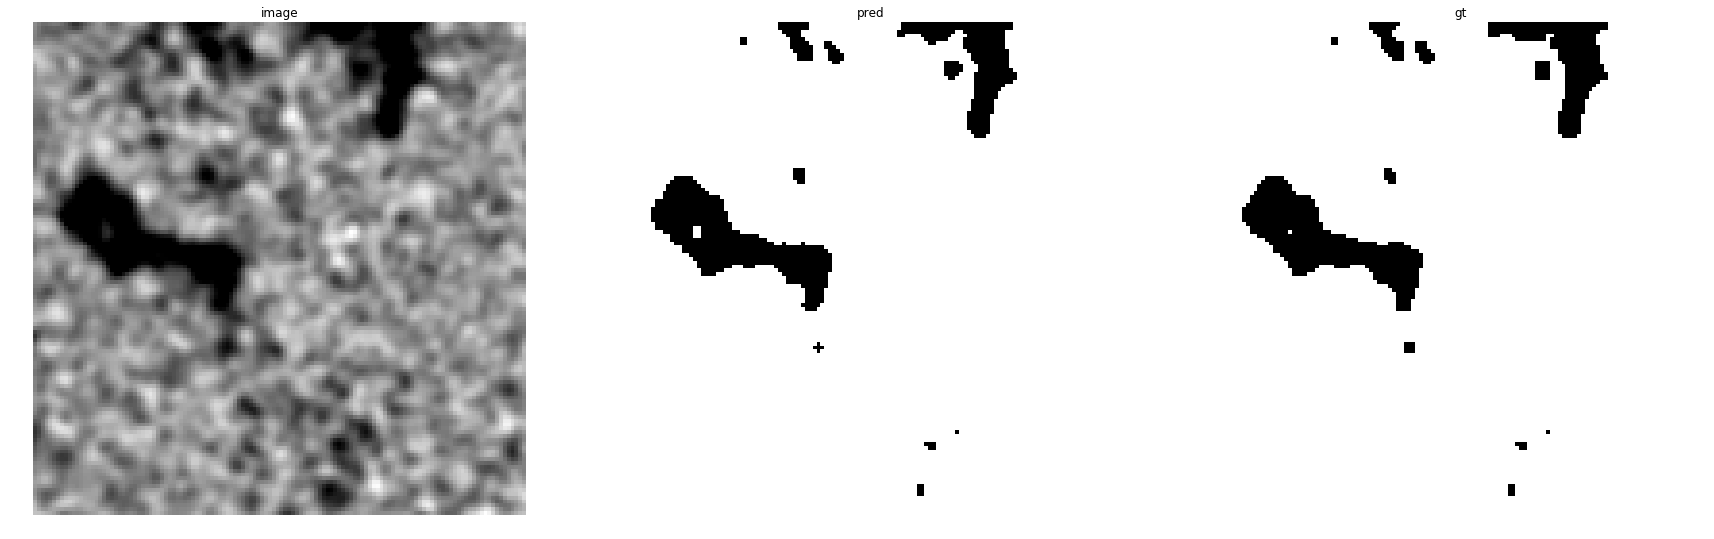

accuracy    : 0.99560546875
precision   : 0.9966095064223772
recall      : 0.9986932375040837
f1          : 0.9976502839240258
pr_auc      : 0.9999799597872993
iou         : 0.9953115842938074


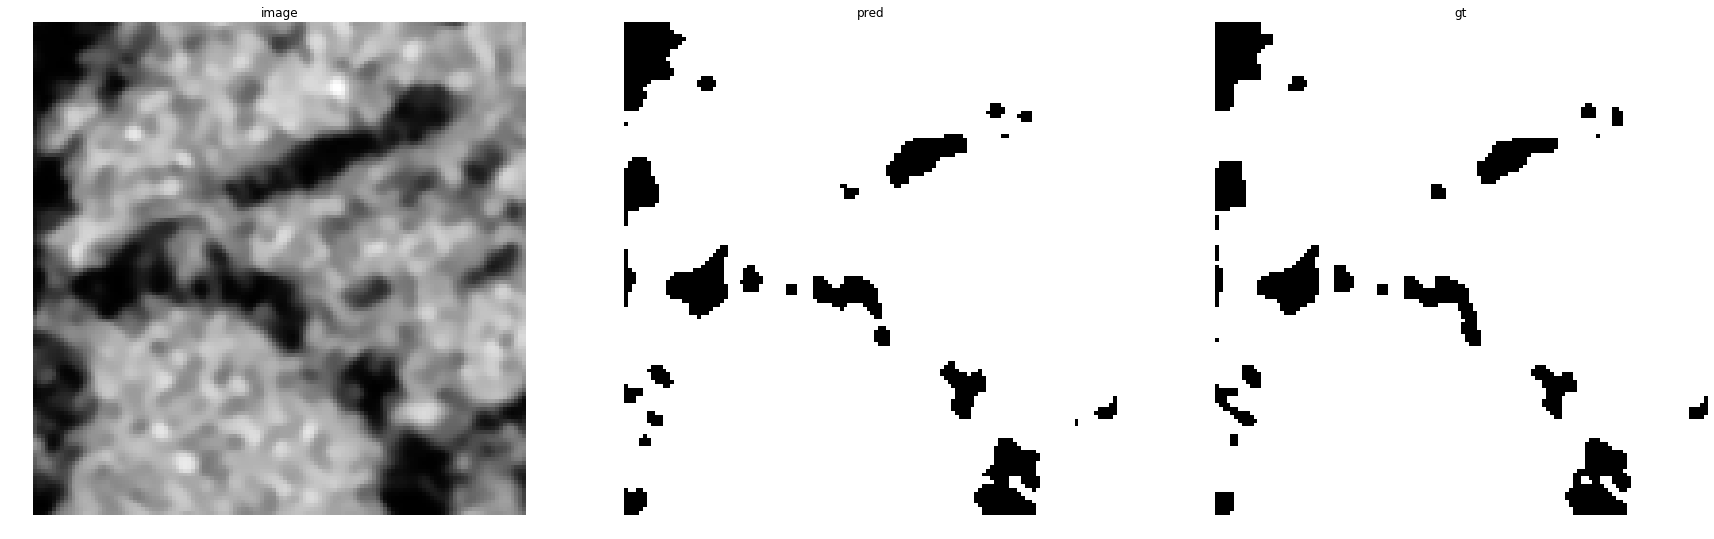

accuracy    : 0.98974609375
precision   : 0.9962058177461226
recall      : 0.9926377926643232
f1          : 0.9944186046511627
pr_auc      : 0.9998949443273886
iou         : 0.9888991674375578


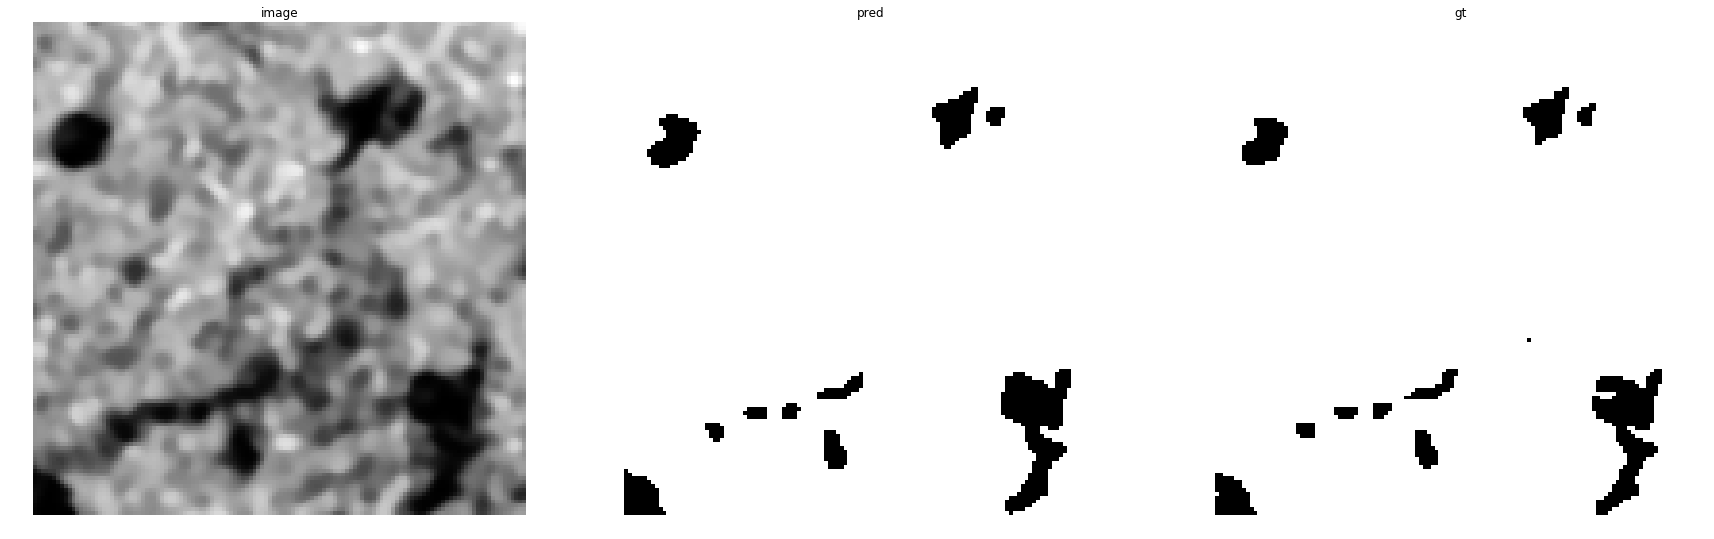

accuracy    : 0.99420166015625
precision   : 0.9987786848364081
recall      : 0.9951325733316254
f1          : 0.9969522954027783
pr_auc      : 0.9999744493692324
iou         : 0.9939231113669801


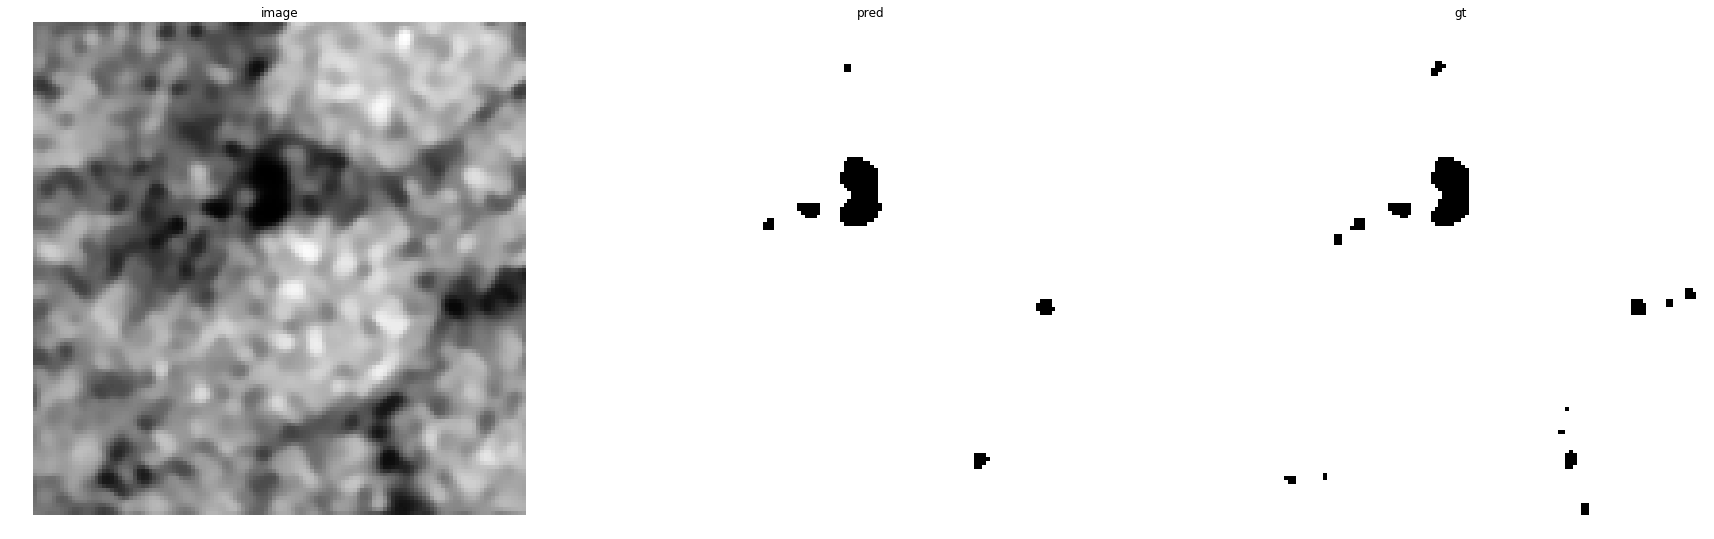

accuracy    : 0.99658203125
precision   : 0.9972174128122682
recall      : 0.9993183789812864
f1          : 0.9982667904673477
pr_auc      : 0.9999837134395948
iou         : 0.9965395785701044


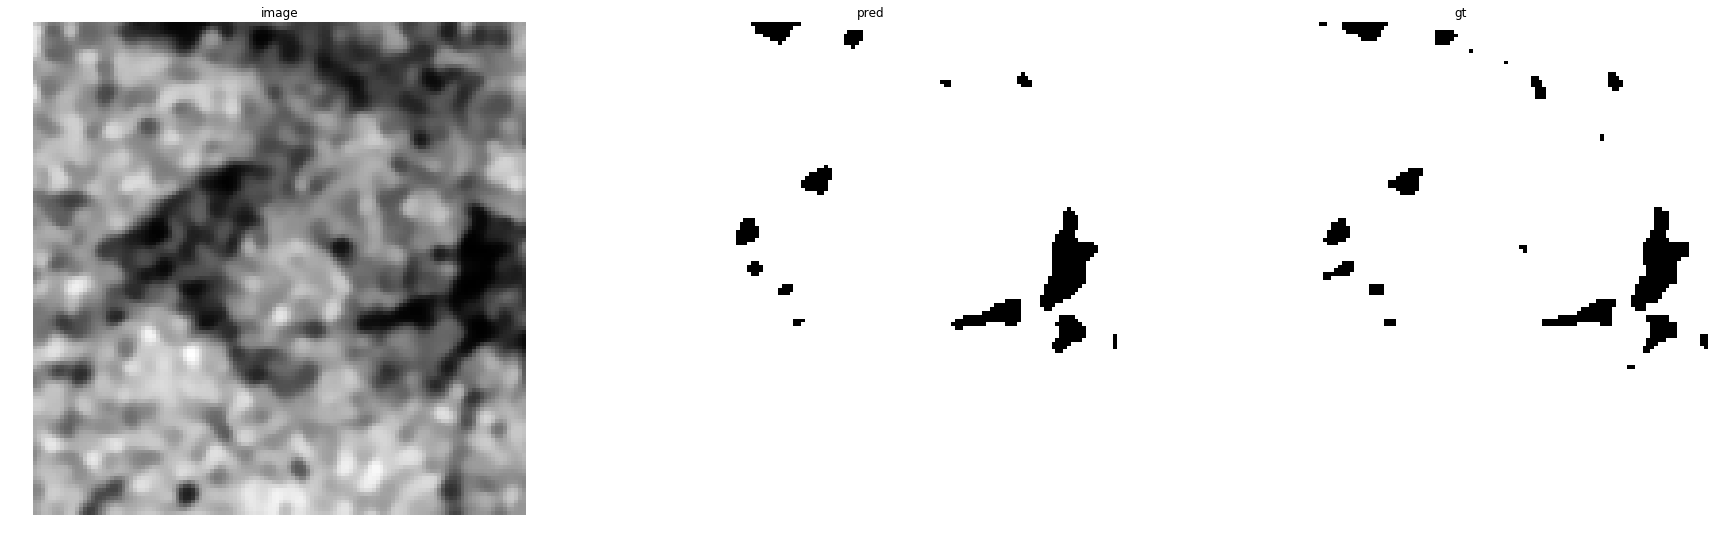

accuracy    : 0.994384765625
precision   : 0.9959062854263762
recall      : 0.9982954545454545
f1          : 0.9970994388044643
pr_auc      : 0.9999535543034962
iou         : 0.9942156554542597


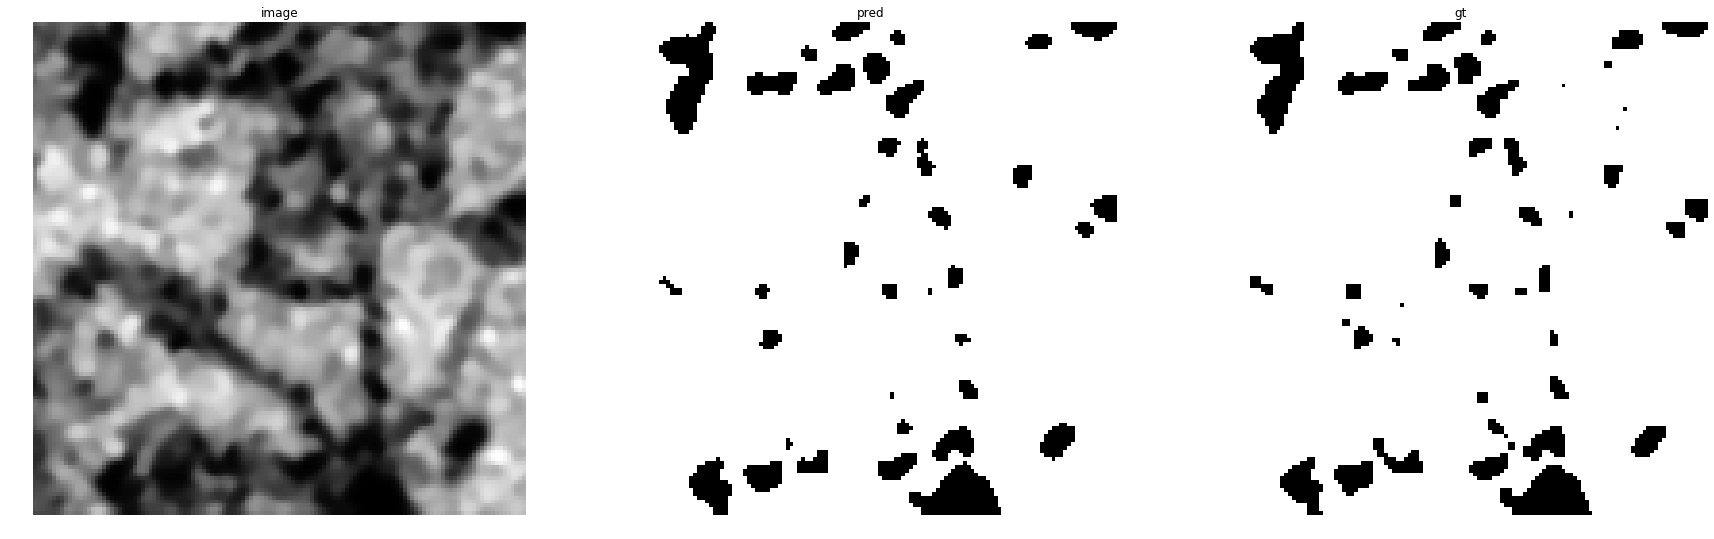

accuracy    : 0.98541259765625
precision   : 0.9906266738082485
recall      : 0.9933534743202417
f1          : 0.9919882001944287
pr_auc      : 0.9996833387355852
iou         : 0.9841037578982375


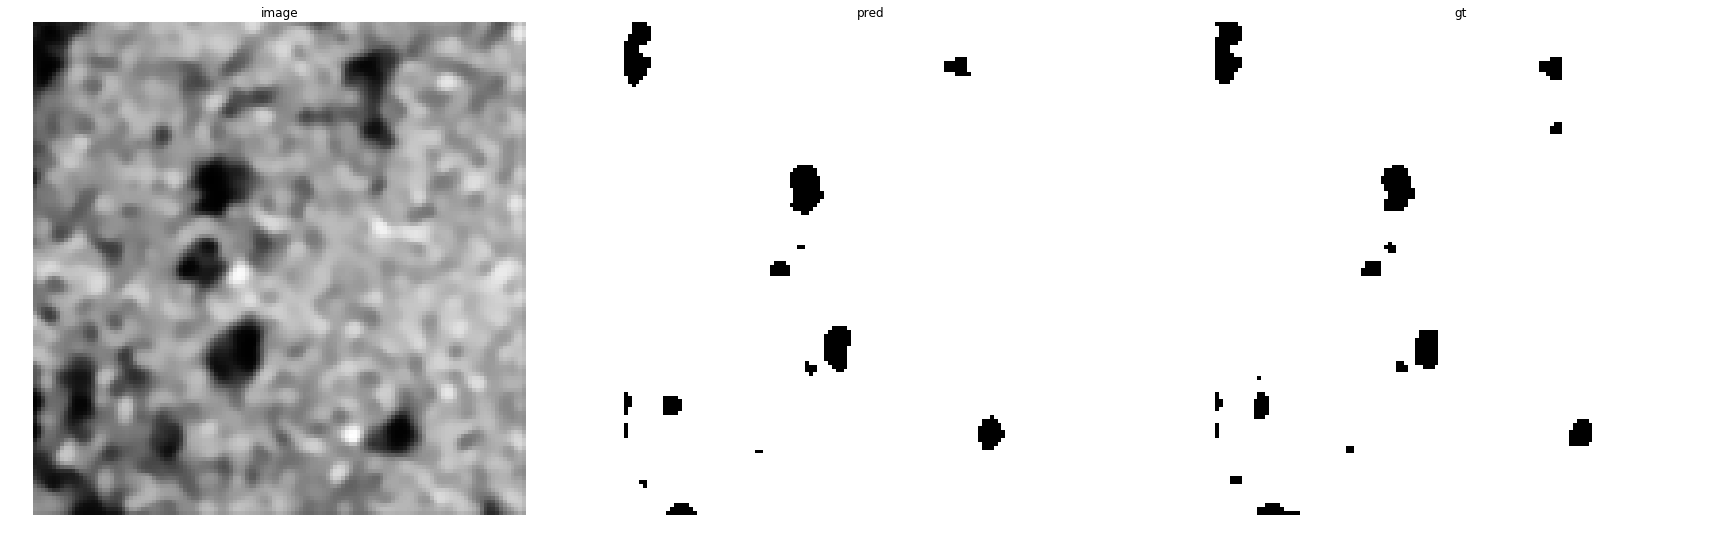

accuracy    : 0.9945068359375
precision   : 0.9971235617808905
recall      : 0.9972482801751095
f1          : 0.9971859170783566
pr_auc      : 0.9999813742183106
iou         : 0.9943876278373659


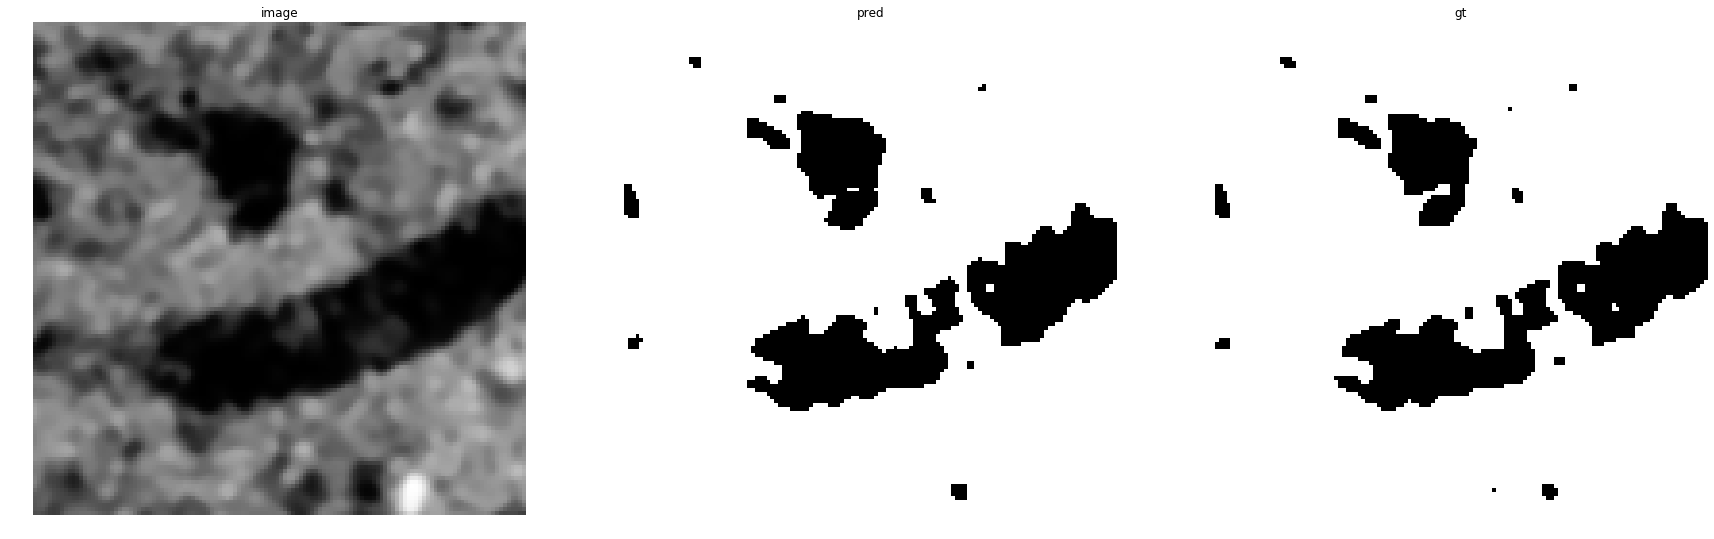

accuracy    : 0.990478515625
precision   : 0.9974978553045467
recall      : 0.9914025863294017
f1          : 0.994440880906564
pr_auc      : 0.9999079452351208
iou         : 0.9889432277269827


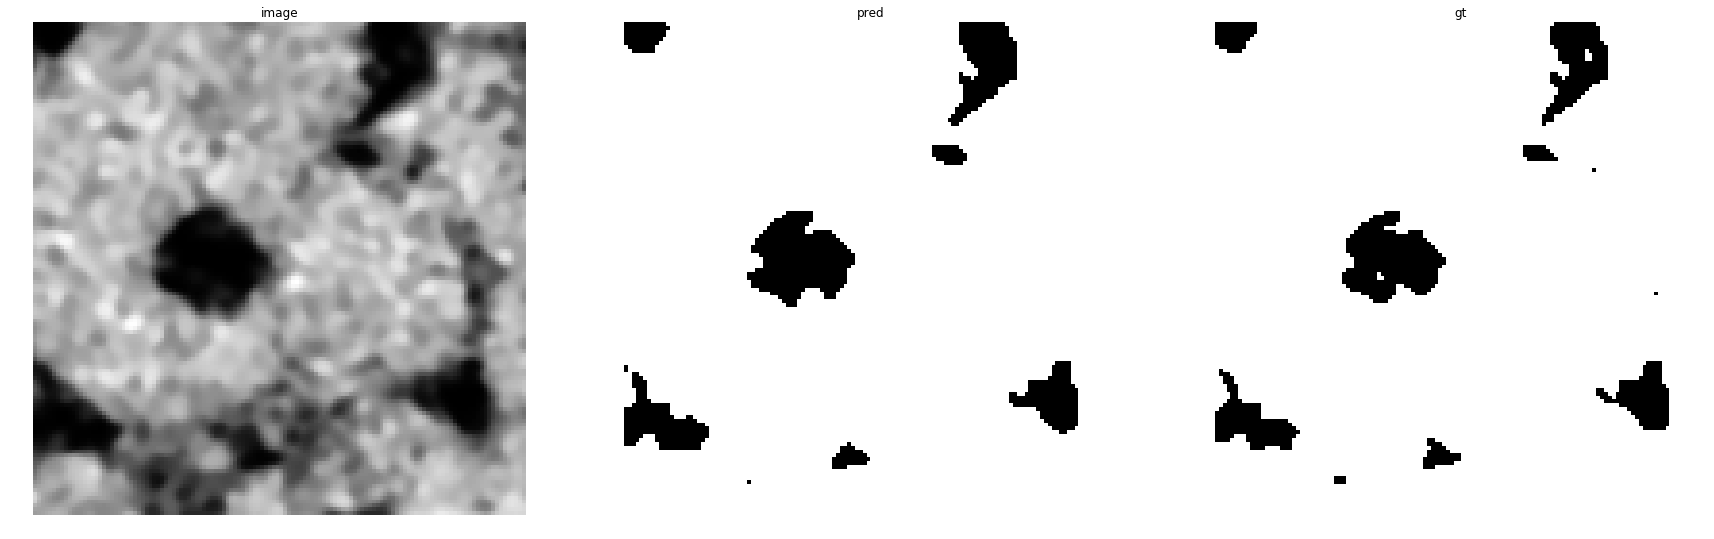

accuracy    : 0.99261474609375
precision   : 0.9986095477719659
recall      : 0.9934132525358977
f1          : 0.9960046227505366
pr_auc      : 0.9999588886131874
iou         : 0.9920410445306848


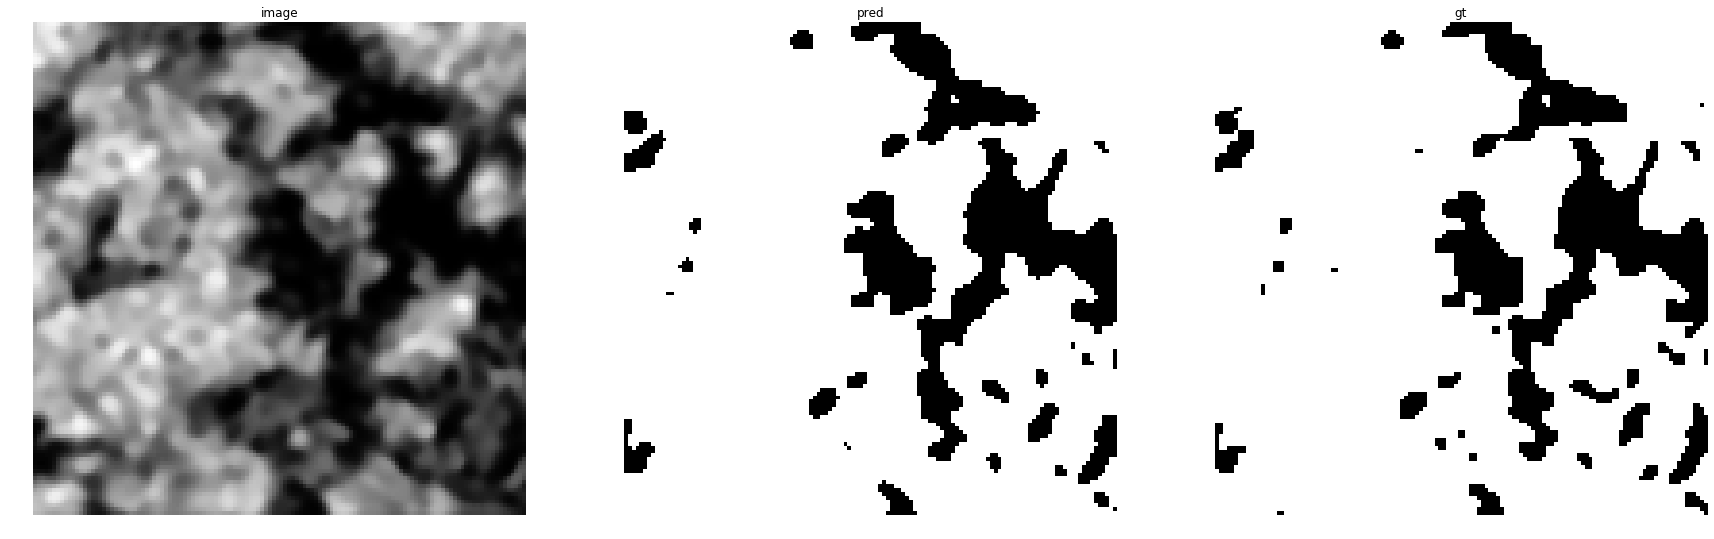

accuracy    : 0.9815673828125
precision   : 0.9895910231802746
recall      : 0.9881320949432405
f1          : 0.9888610209501328
pr_auc      : 0.9995037462699496
iou         : 0.9779674618807909


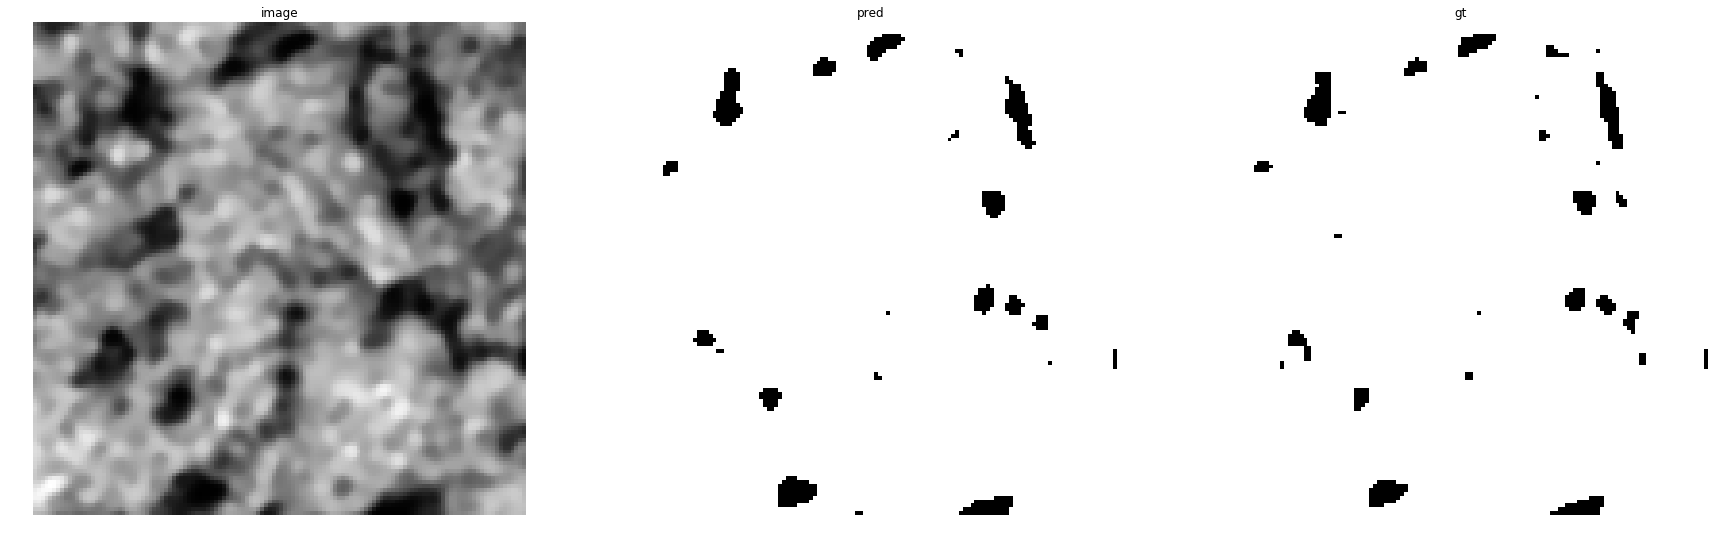

accuracy    : 0.99188232421875
precision   : 0.9959723096286973
recall      : 0.9956590122680088
f1          : 0.9958156363064339
pr_auc      : 0.9999337099700112
iou         : 0.9916661444952691


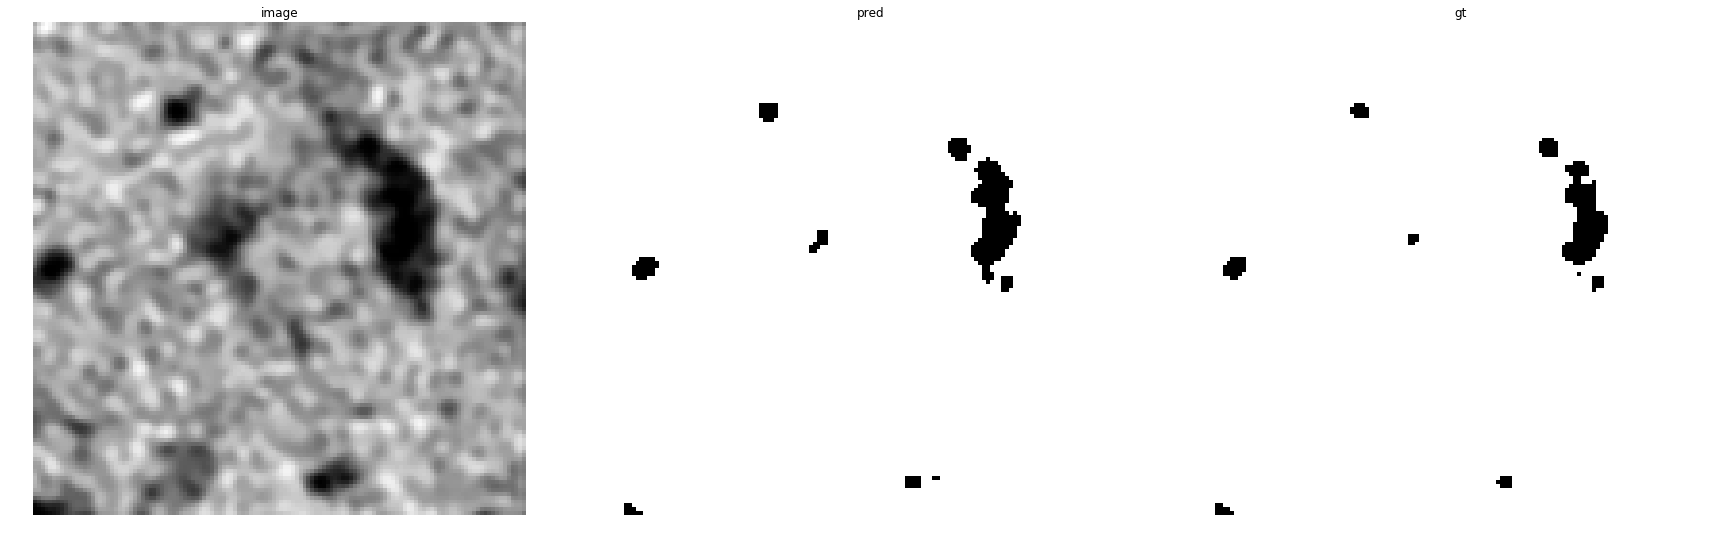

accuracy    : 0.99505615234375
precision   : 0.9998126639190709
recall      : 0.9951519671825471
f1          : 0.9974768713204373
pr_auc      : 0.9999940447775668
iou         : 0.9949664429530202


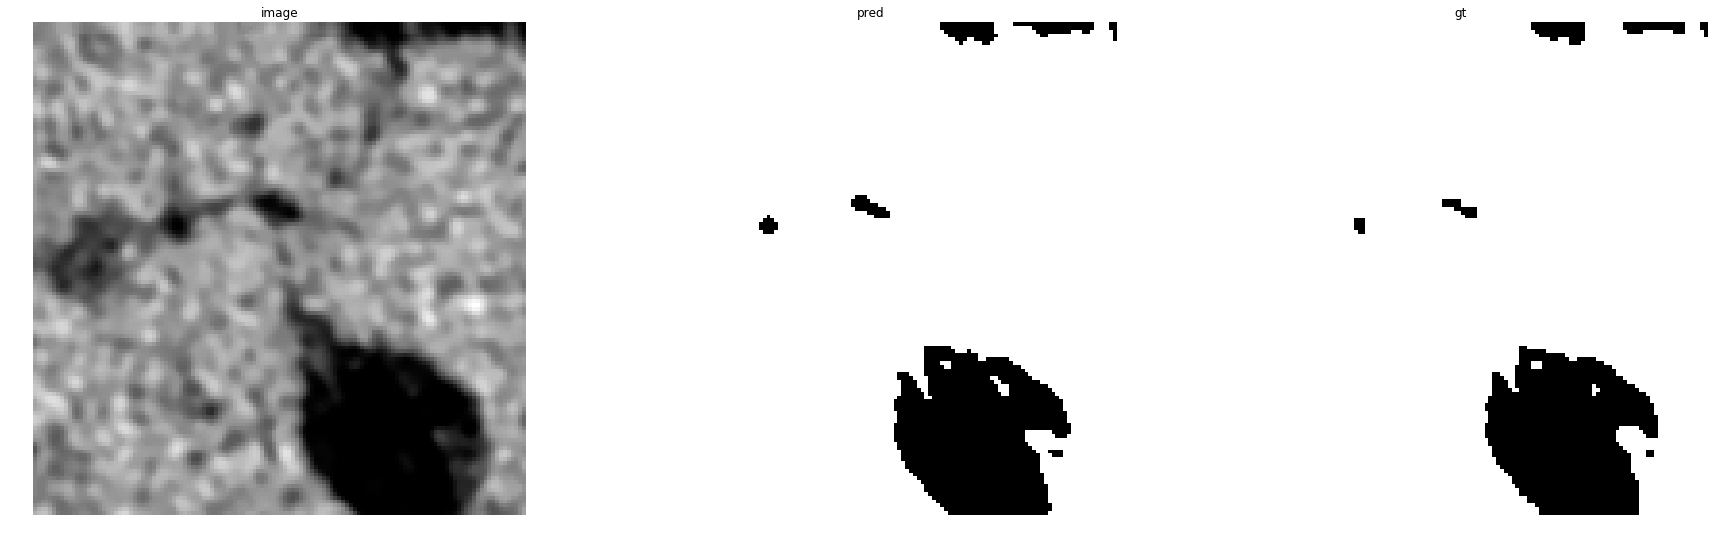

accuracy    : 0.994140625
precision   : 0.9988490962020175
recall      : 0.9946740376188229
f1          : 0.9967571949736522
pr_auc      : 0.9999813631812421
iou         : 0.9935353535353535


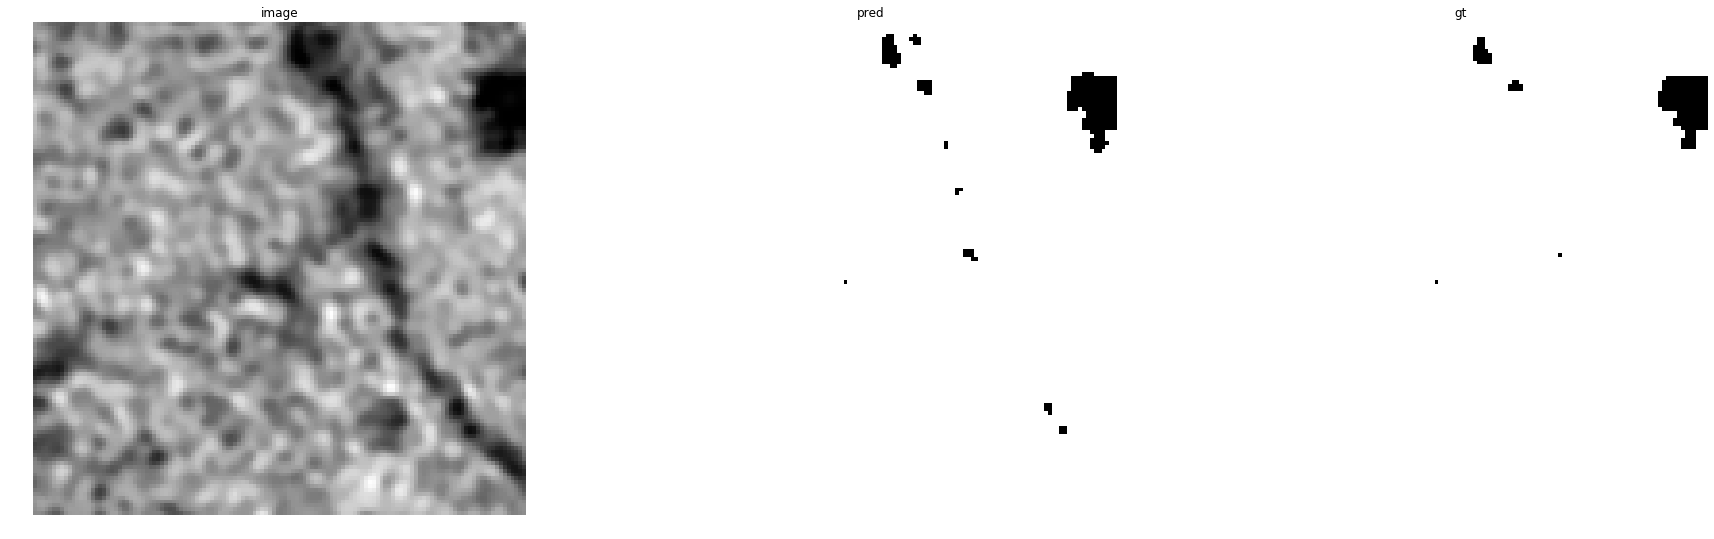

accuracy    : 0.99688720703125
precision   : 0.999937996031746
recall      : 0.9969091920628053
f1          : 0.9984212970128463
pr_auc      : 0.9999987039697292
iou         : 0.9968475707751268


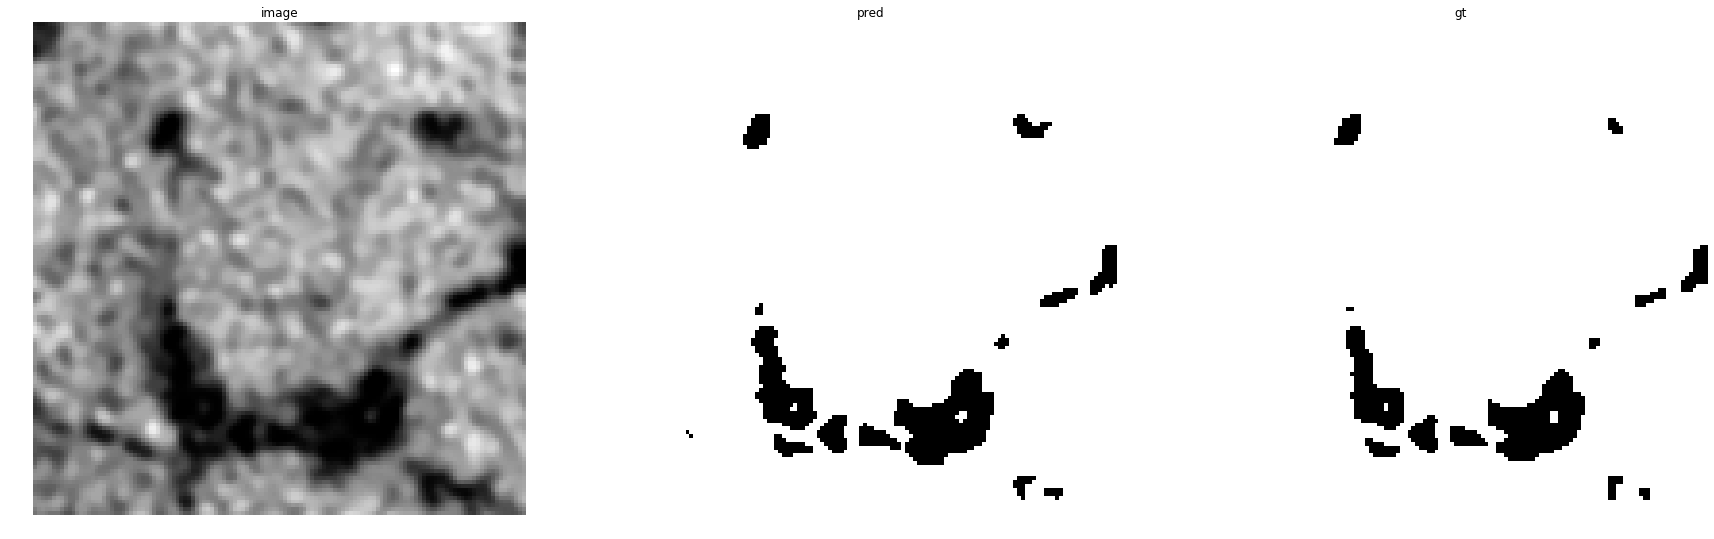

accuracy    : 0.9913330078125
precision   : 0.9994814622763806
recall      : 0.9913848527709914
f1          : 0.9954166935640049
pr_auc      : 0.9999790007446536
iou         : 0.9908752088420512


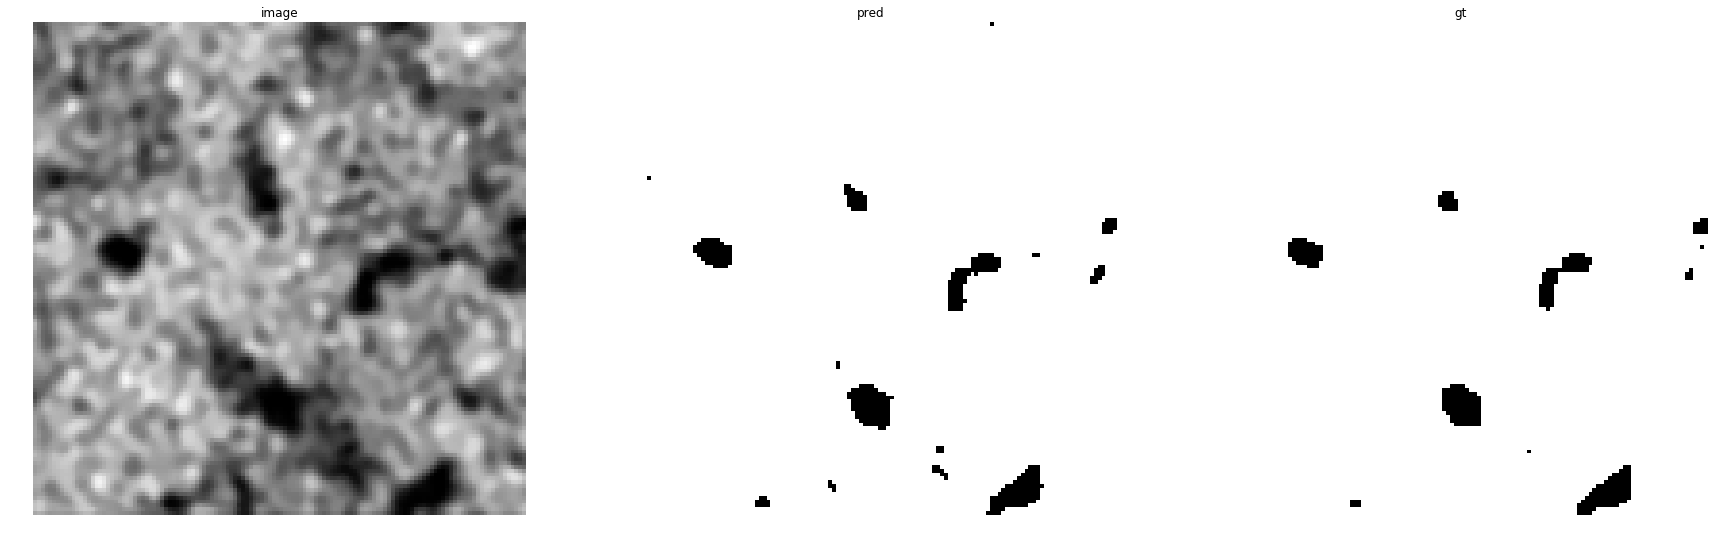

accuracy    : 0.99578857421875
precision   : 0.9997493106041614
recall      : 0.995941811824936
f1          : 0.9978419291277014
pr_auc      : 0.999990375090581
iou         : 0.9956931527370326


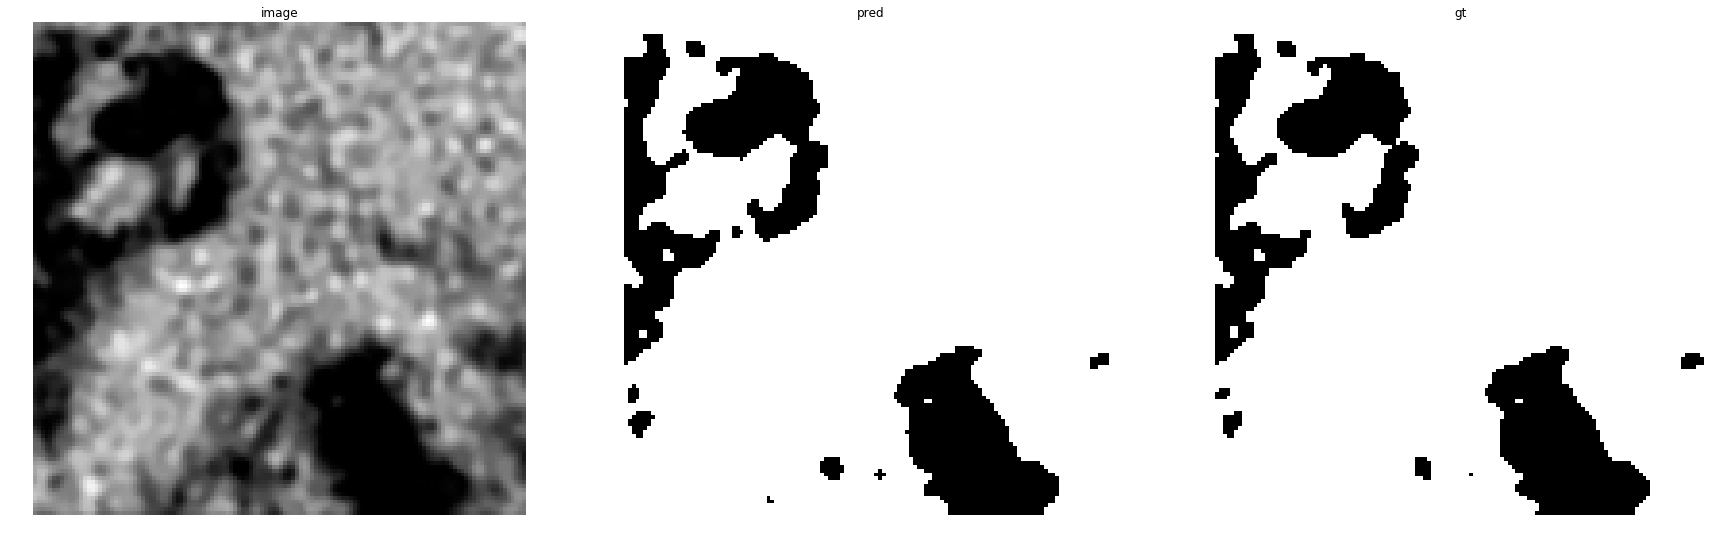

accuracy    : 0.99139404296875
precision   : 0.9984414427786849
recall      : 0.9911589184410227
f1          : 0.9947868525159907
pr_auc      : 0.999952438294106
iou         : 0.9896277769604237


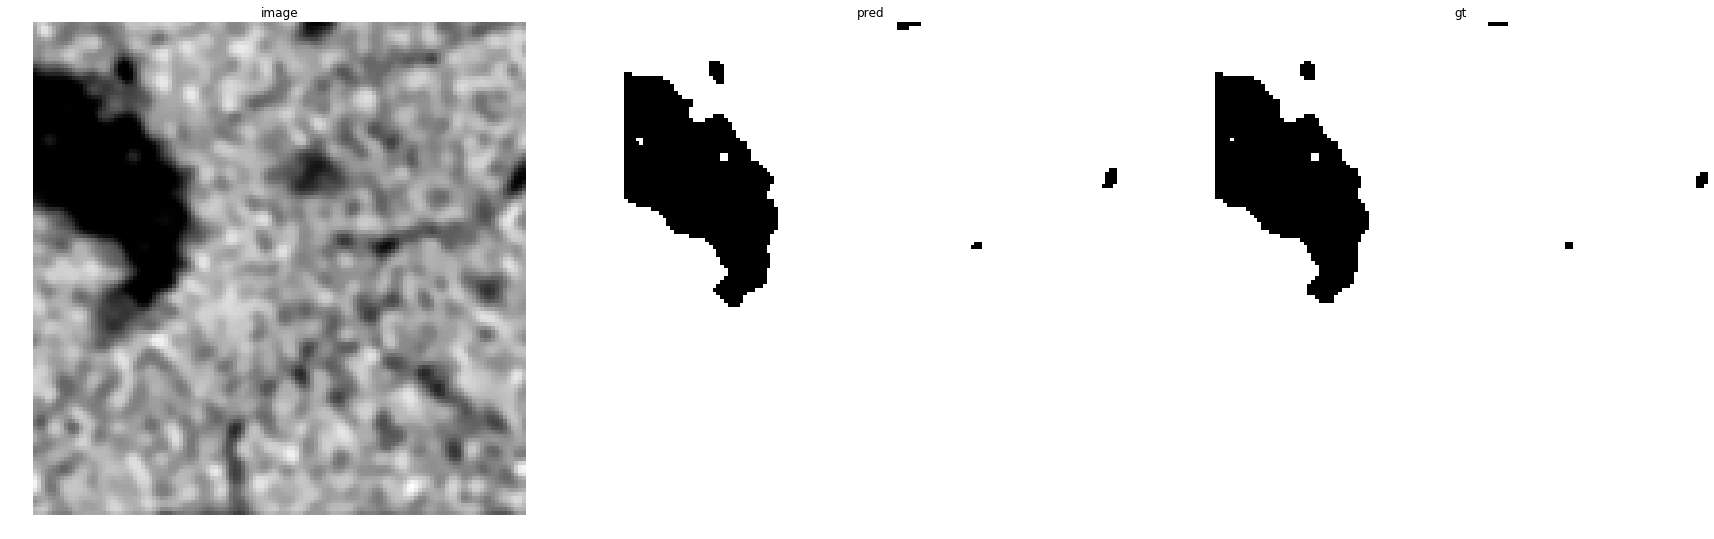

accuracy    : 0.996826171875
precision   : 0.9998663816141101
recall      : 0.9966702184336708
f1          : 0.9982657417289221
pr_auc      : 0.9999977053887799
iou         : 0.9965374883473166


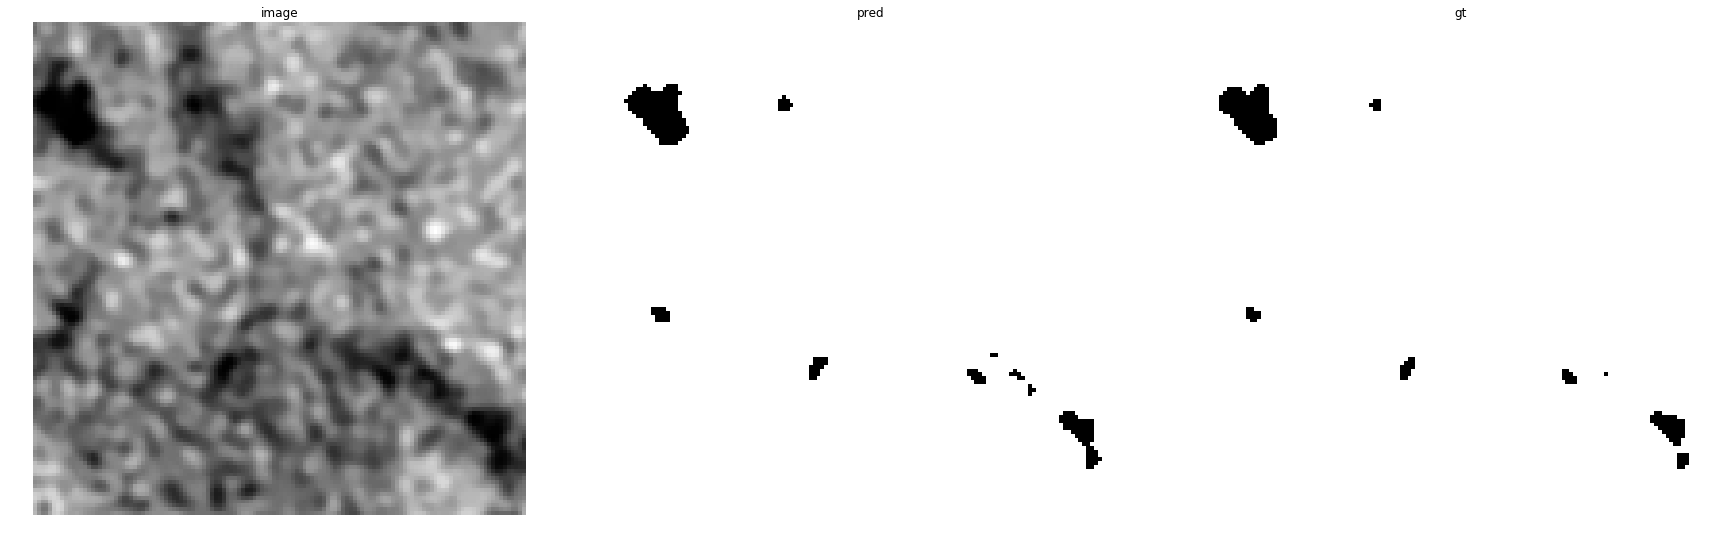

accuracy    : 0.99713134765625
precision   : 0.9998756064187088
recall      : 0.9972086098877241
f1          : 0.9985403273393584
pr_auc      : 0.9999974372936433
iou         : 0.9970849097562489


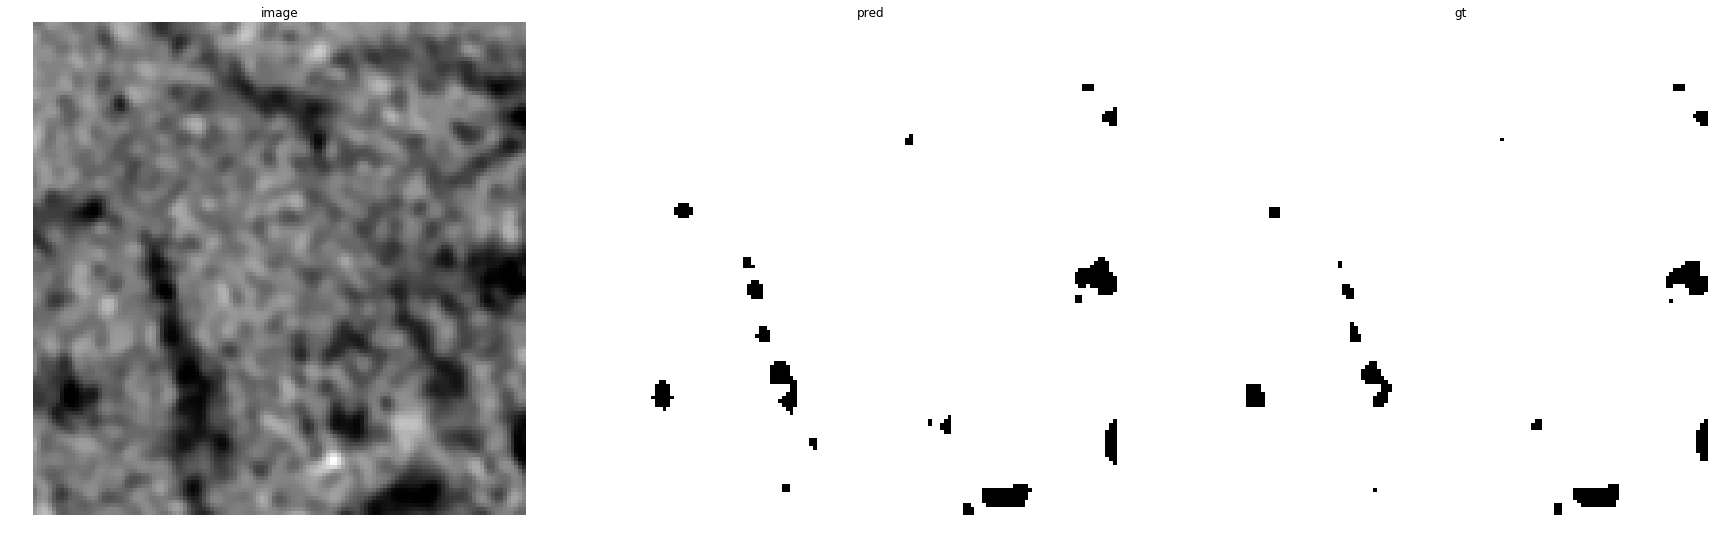

accuracy    : 0.9952392578125
precision   : 0.9995633187772925
recall      : 0.9955884180439916
f1          : 0.9975719088531939
pr_auc      : 0.9999930090165337
iou         : 0.995155580398733


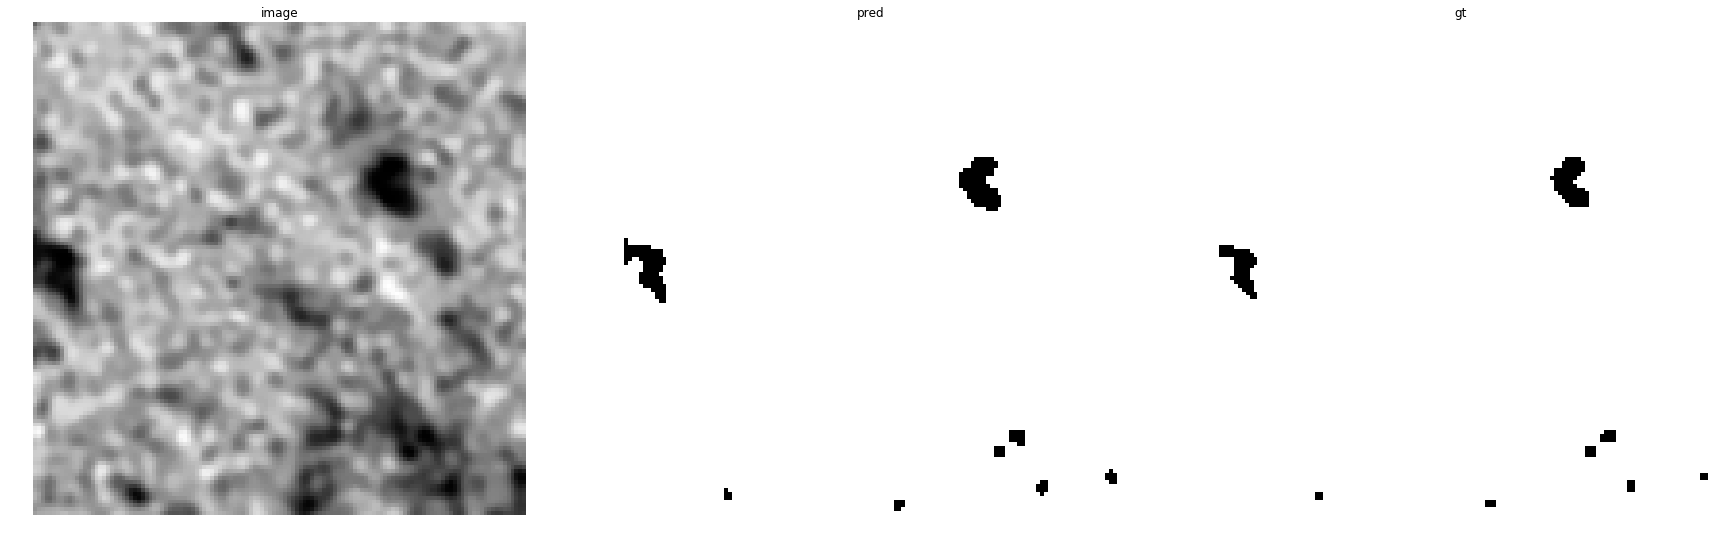

accuracy    : 0.99652099609375
precision   : 0.9999380344528442
recall      : 0.9965417155561045
f1          : 0.99823698617426
pr_auc      : 0.9999976864119721
iou         : 0.9964801778436458


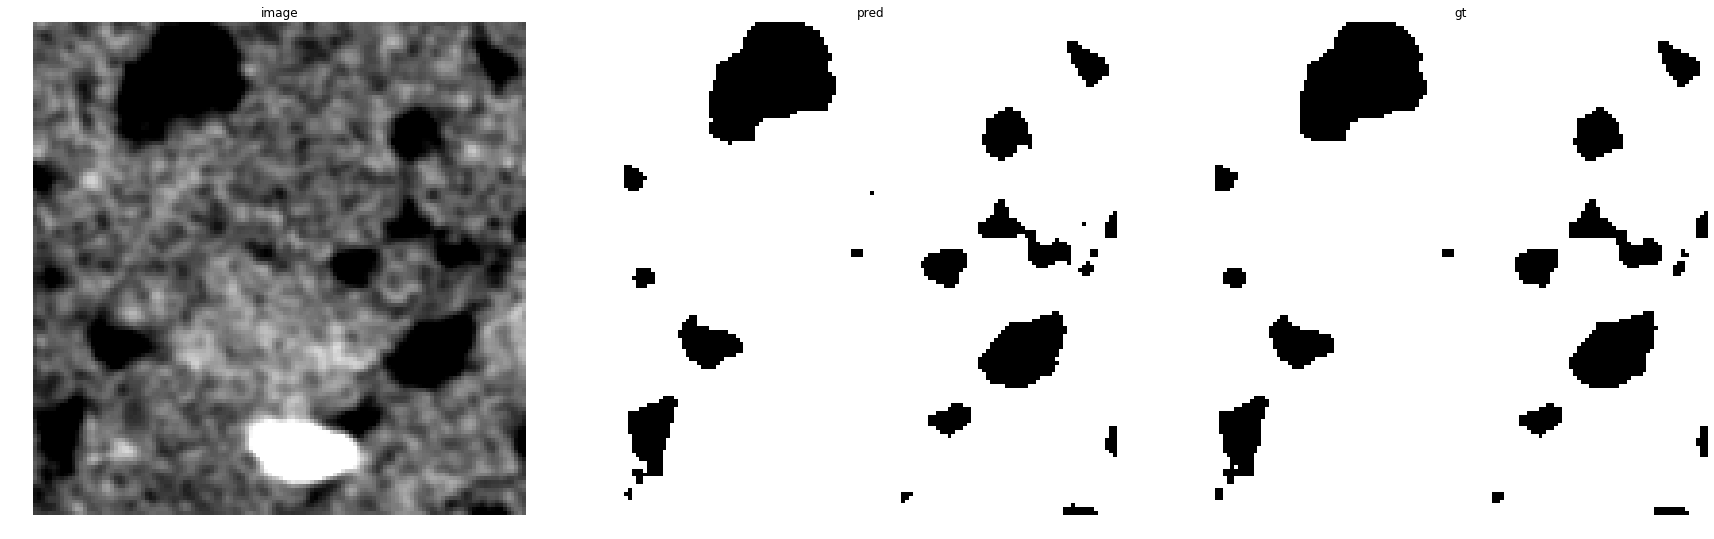

accuracy    : 0.99481201171875
precision   : 0.9960463341888048
recall      : 0.9980539338337503
f1          : 0.9970491234160734
pr_auc      : 0.999975884524045
iou         : 0.9941156109380408


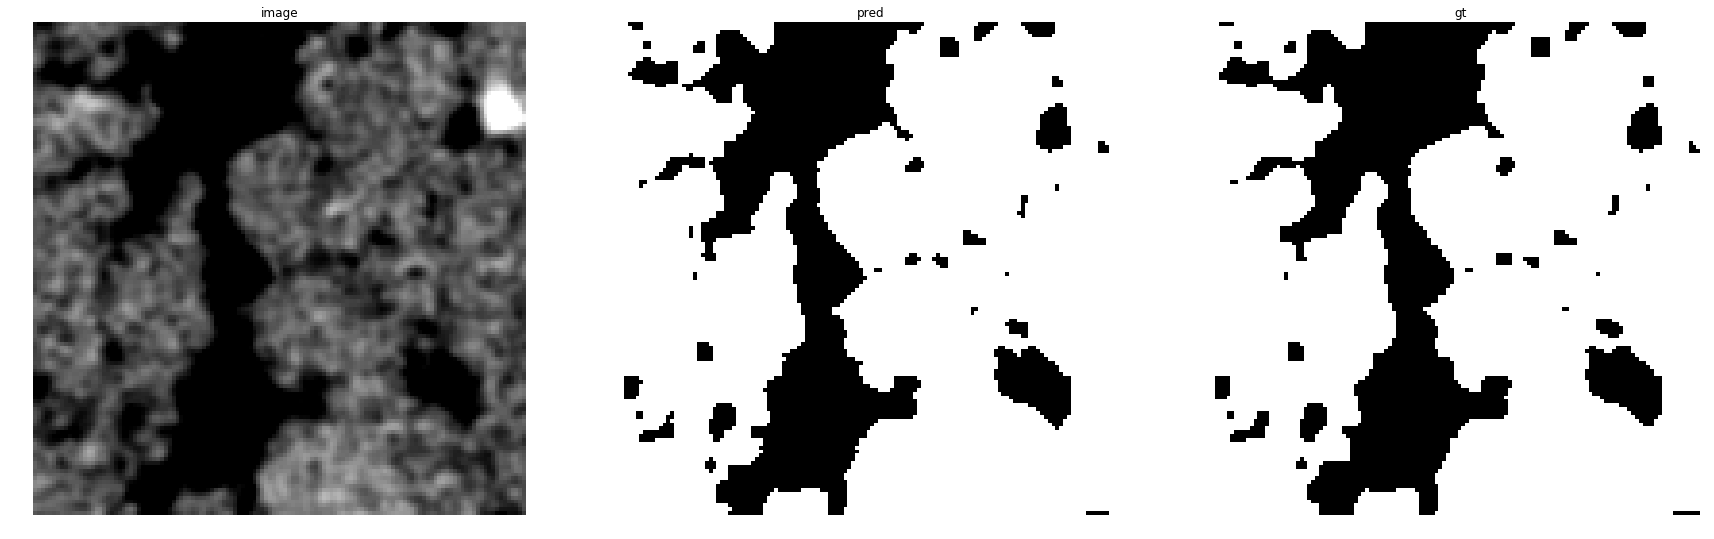

accuracy    : 0.99029541015625
precision   : 0.9894831977651796
recall      : 0.997432499585887
f1          : 0.9934419467931532
pr_auc      : 0.999877506673392
iou         : 0.9869693492870021


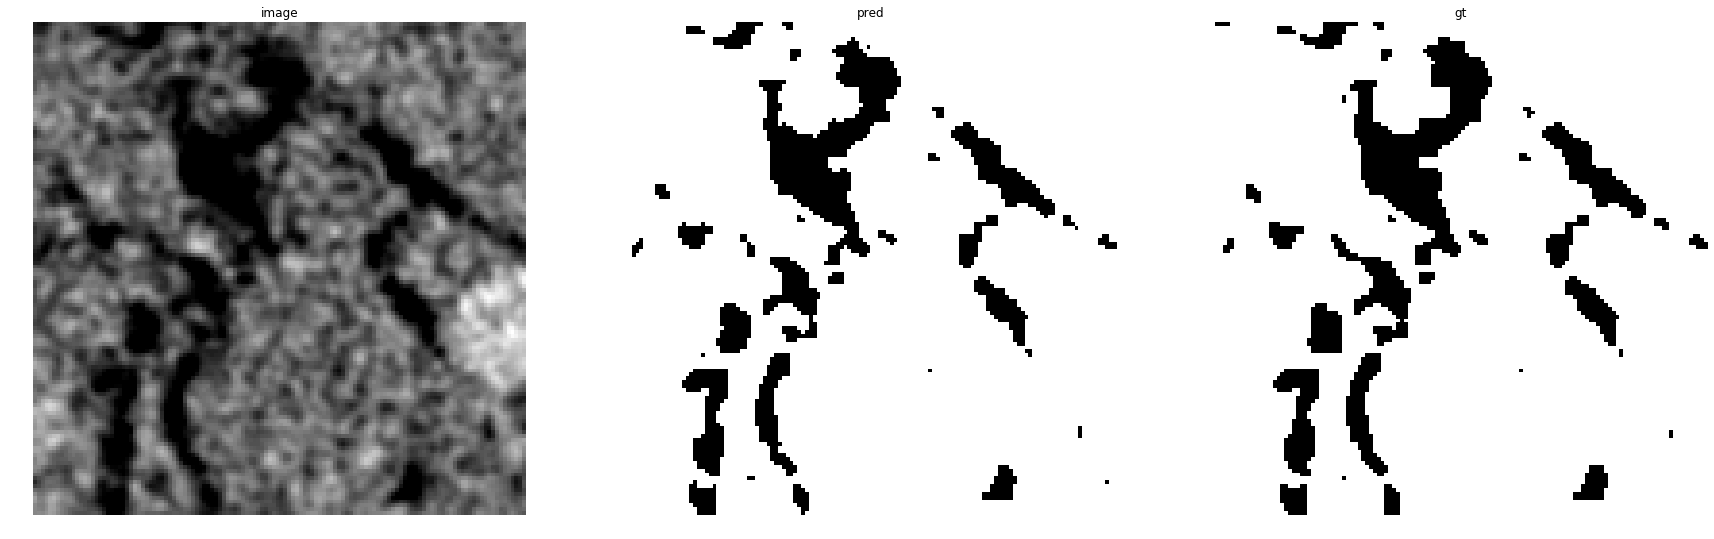

accuracy    : 0.9876708984375
precision   : 0.9876500139547865
recall      : 0.9982369534555712
f1          : 0.992915263748597
pr_auc      : 0.9998497026508172
iou         : 0.9859302082607787


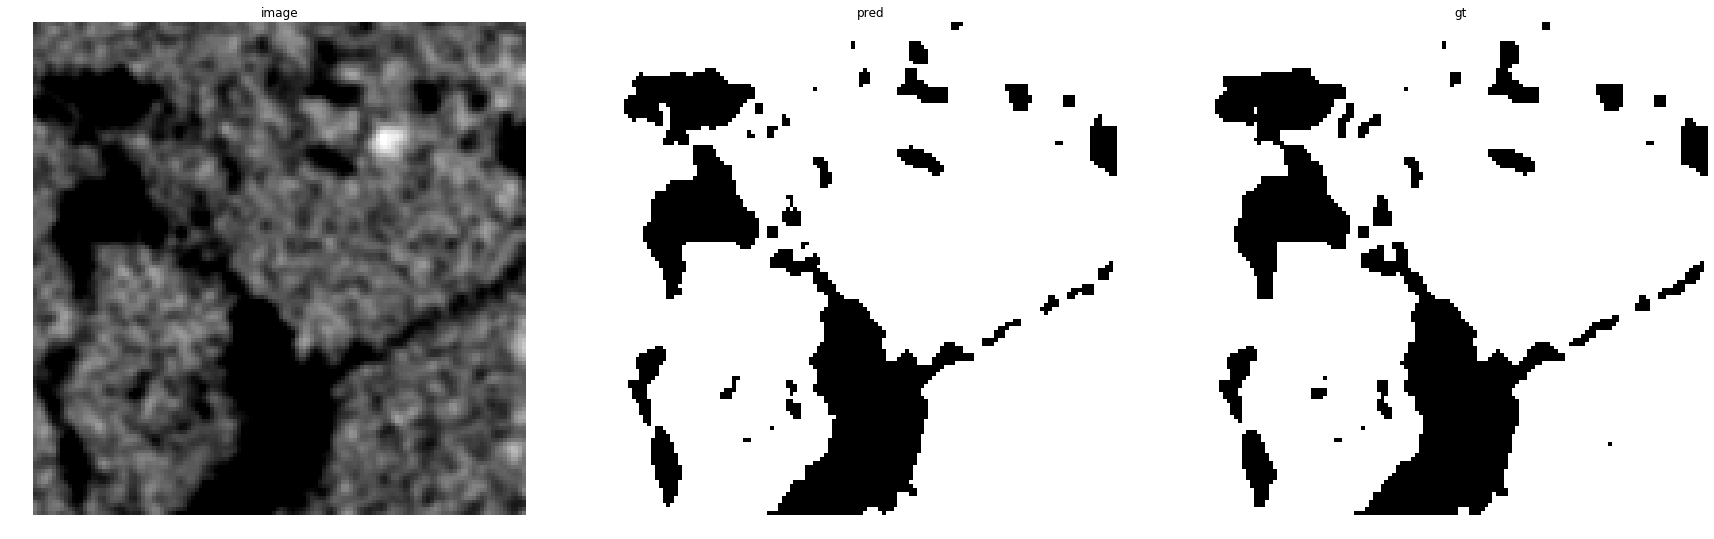

accuracy    : 0.98681640625
precision   : 0.985916553697846
recall      : 0.9977896341463415
f1          : 0.9918175619365104
pr_auc      : 0.9998158968641564
iou         : 0.9837679416848275


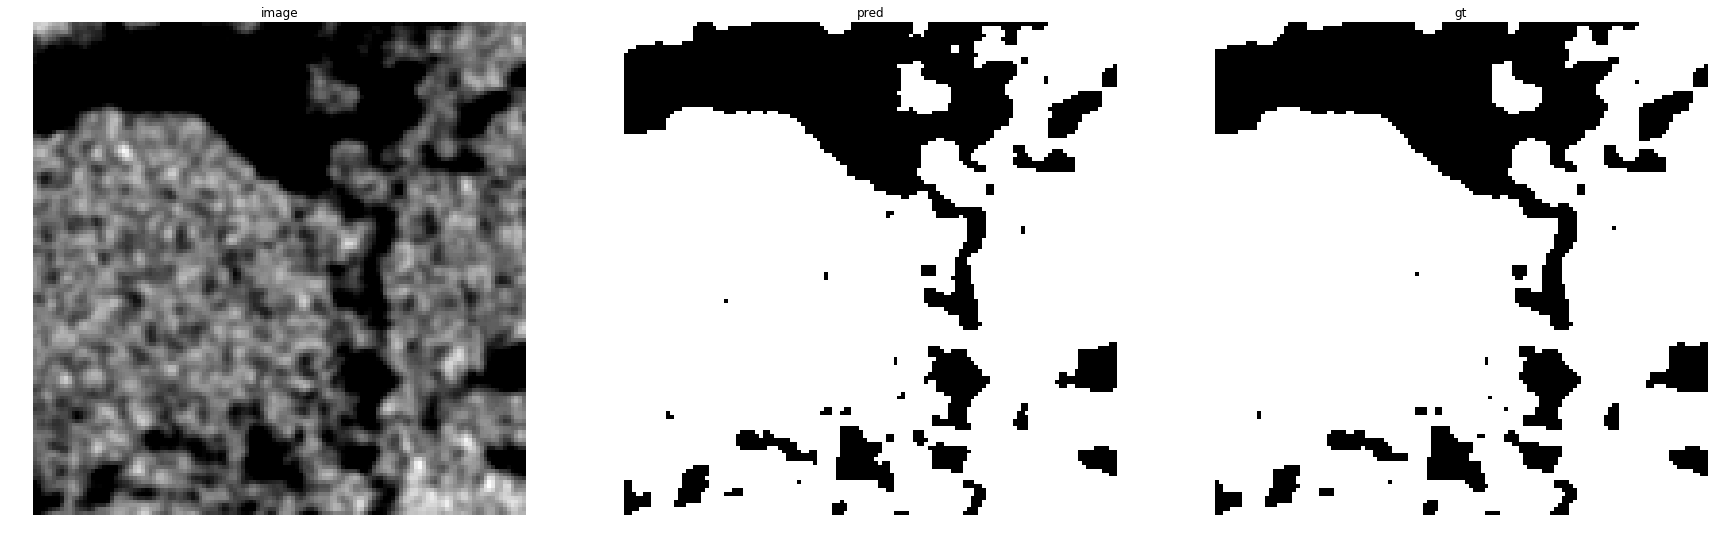

accuracy    : 0.98779296875
precision   : 0.9865372062663186
recall      : 0.9971136401121558
f1          : 0.9917972274628826
pr_auc      : 0.9998142207588553
iou         : 0.9837279310064274


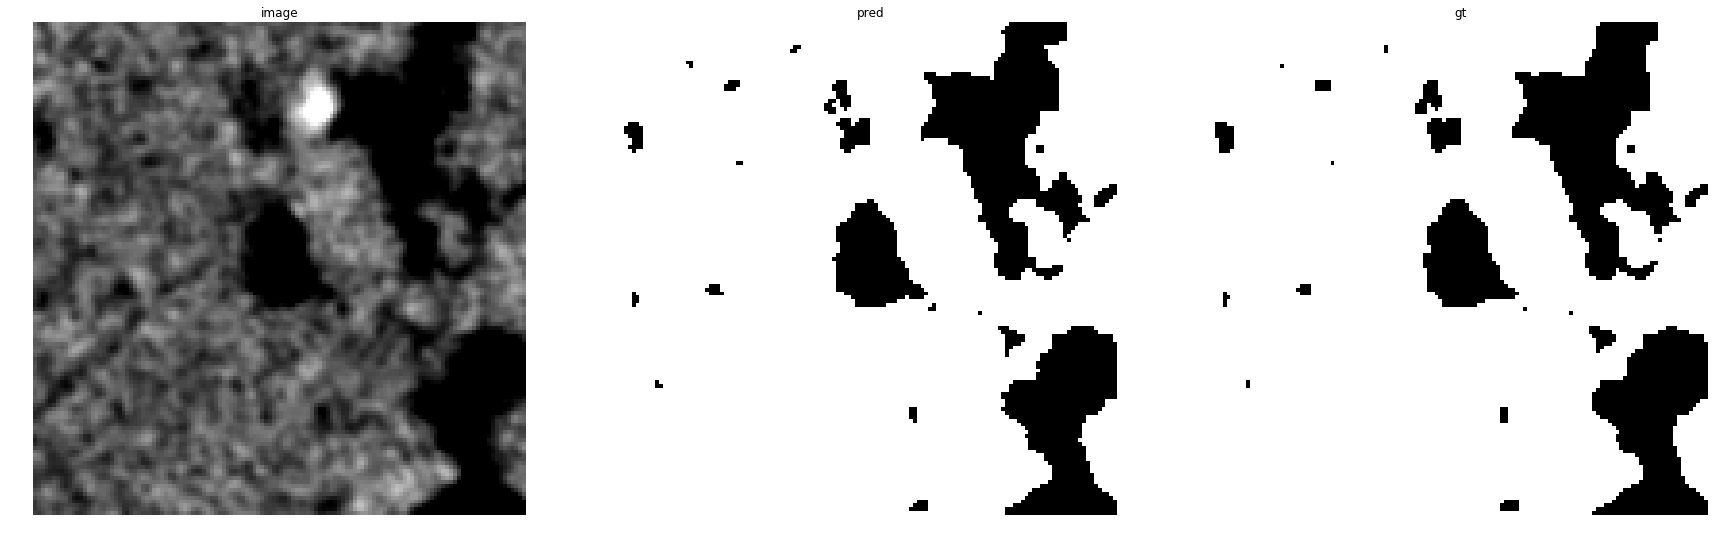

accuracy    : 0.9923095703125
precision   : 0.9928227894931557
recall      : 0.9978433851416673
f1          : 0.9953267561753578
pr_auc      : 0.999937295478202
iou         : 0.9906969875959835


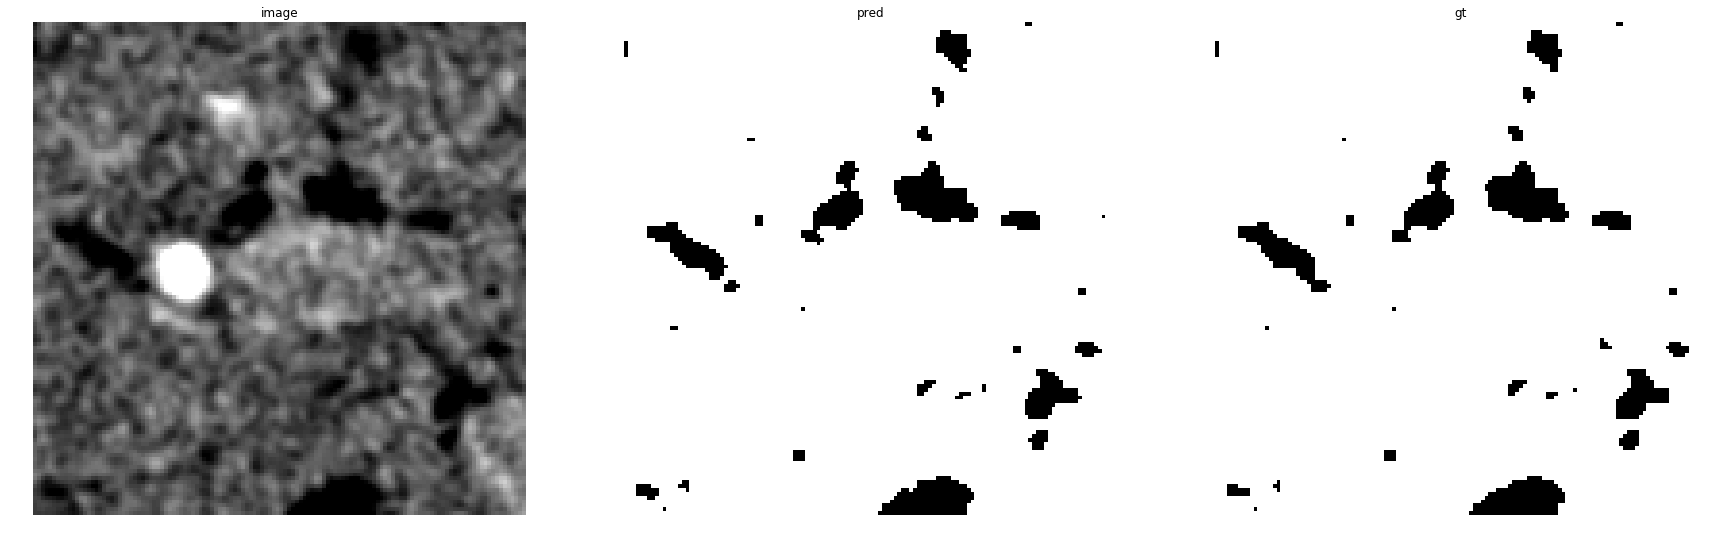

accuracy    : 0.99578857421875
precision   : 0.9977243172951885
recall      : 0.9977891930554652
f1          : 0.9977567541207452
pr_auc      : 0.9999836634254656
iou         : 0.9955235500194628


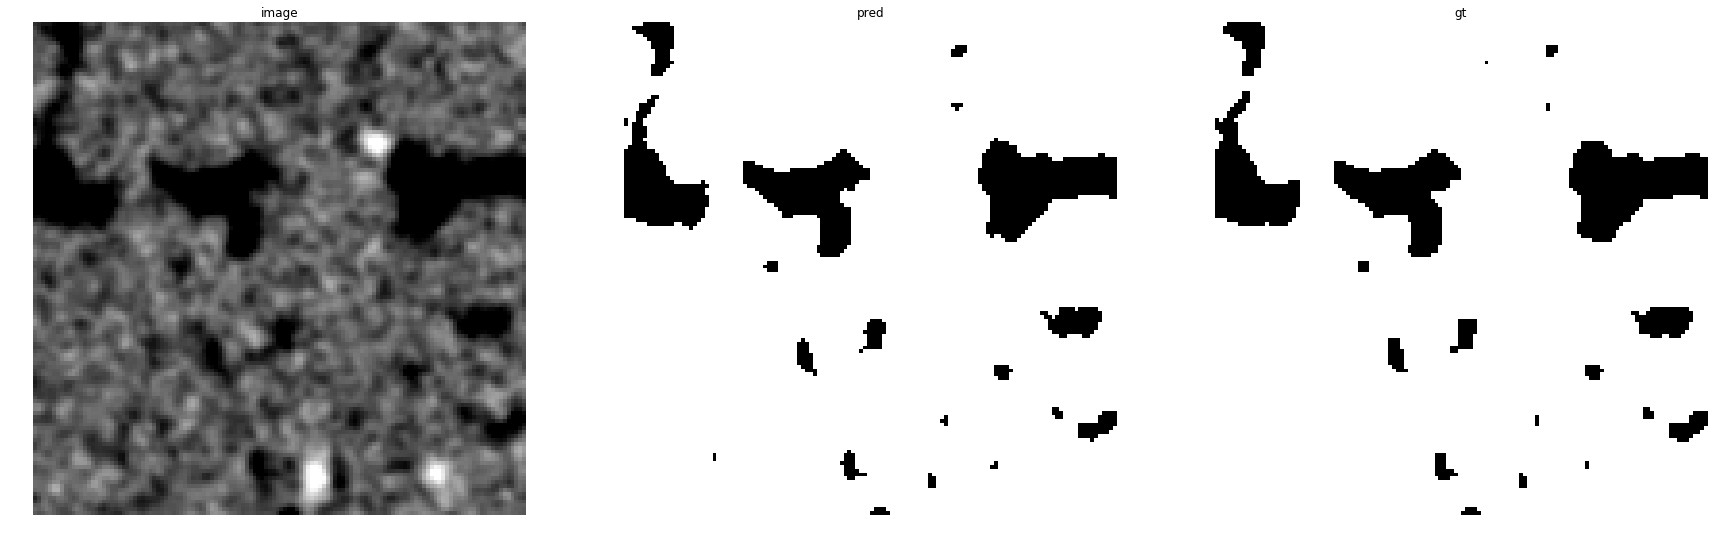

accuracy    : 0.99444580078125
precision   : 0.9950248756218906
recall      : 0.9987686414010124
f1          : 0.9968932436584617
pr_auc      : 0.9999738481725886
iou         : 0.993805731400177


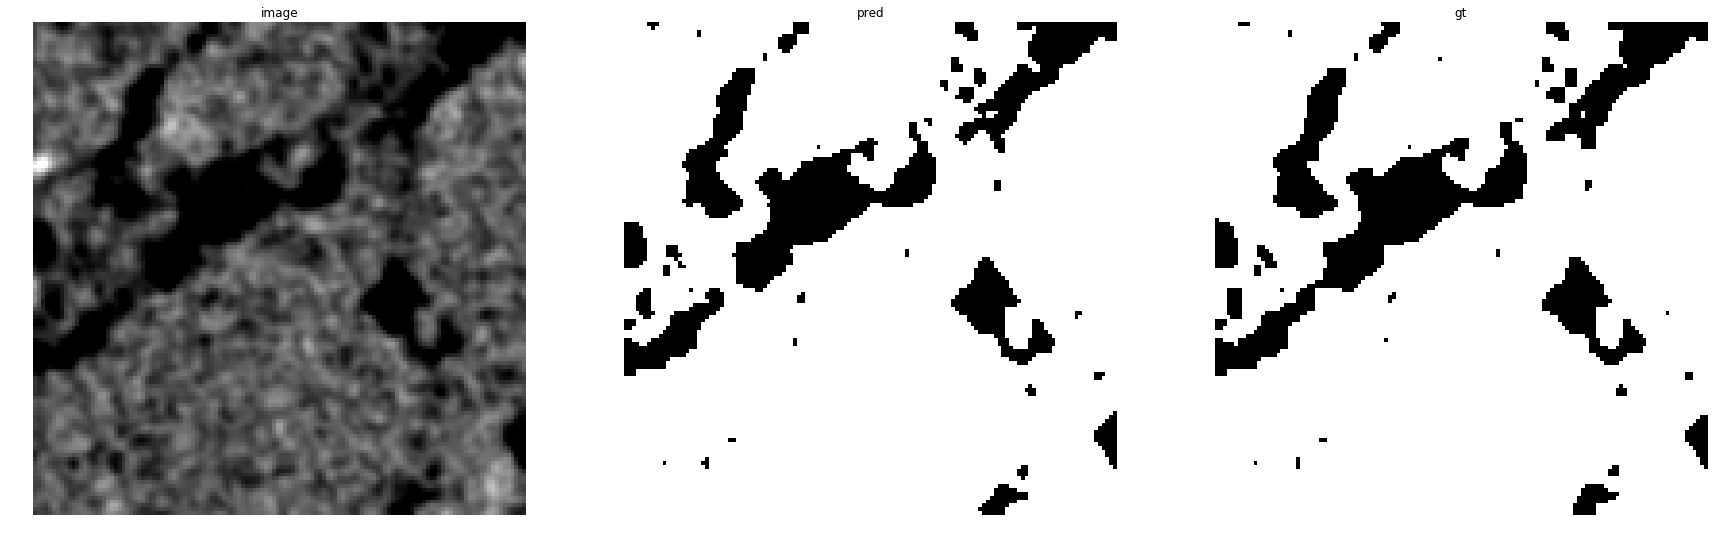

accuracy    : 0.98919677734375
precision   : 0.9895084794481173
recall      : 0.9977537859575393
f1          : 0.9936140274921528
pr_auc      : 0.9998585639580497
iou         : 0.9873090987309099


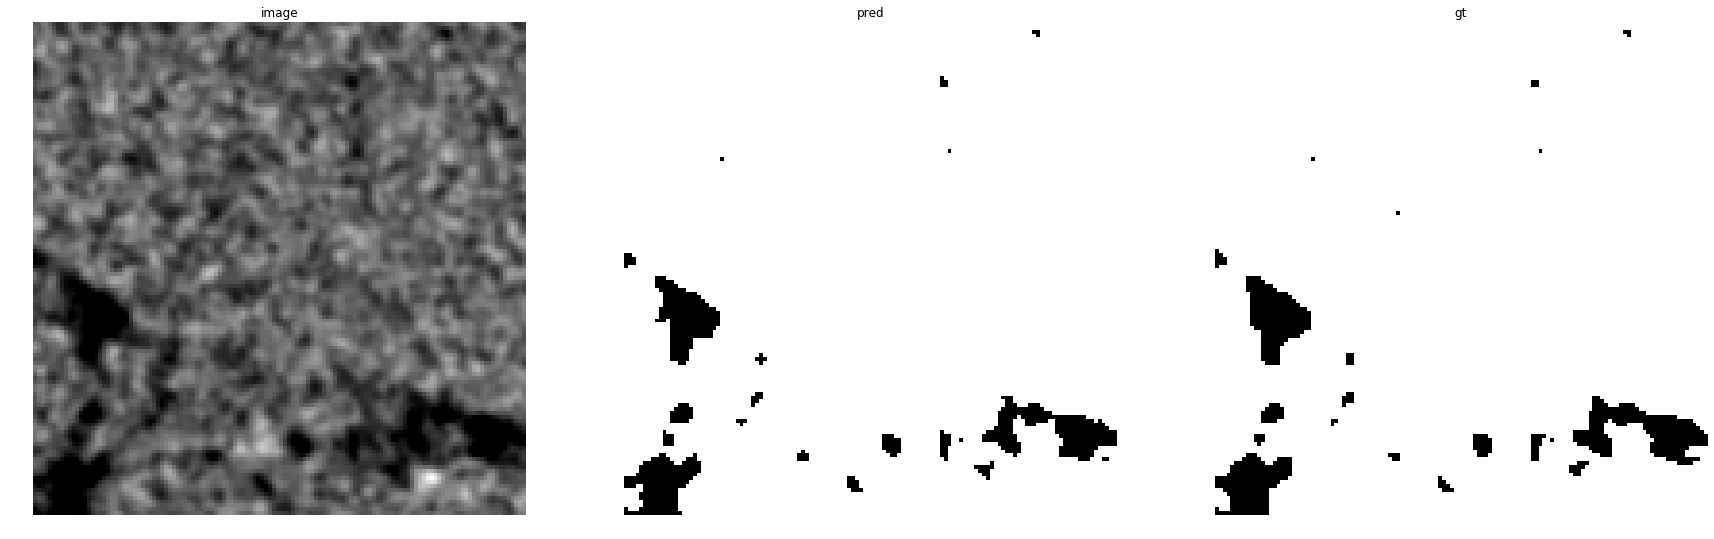

accuracy    : 0.9942626953125
precision   : 0.9954452142673852
recall      : 0.9985199485199485
f1          : 0.9969802107427398
pr_auc      : 0.9999712923051669
iou         : 0.9939786048299276


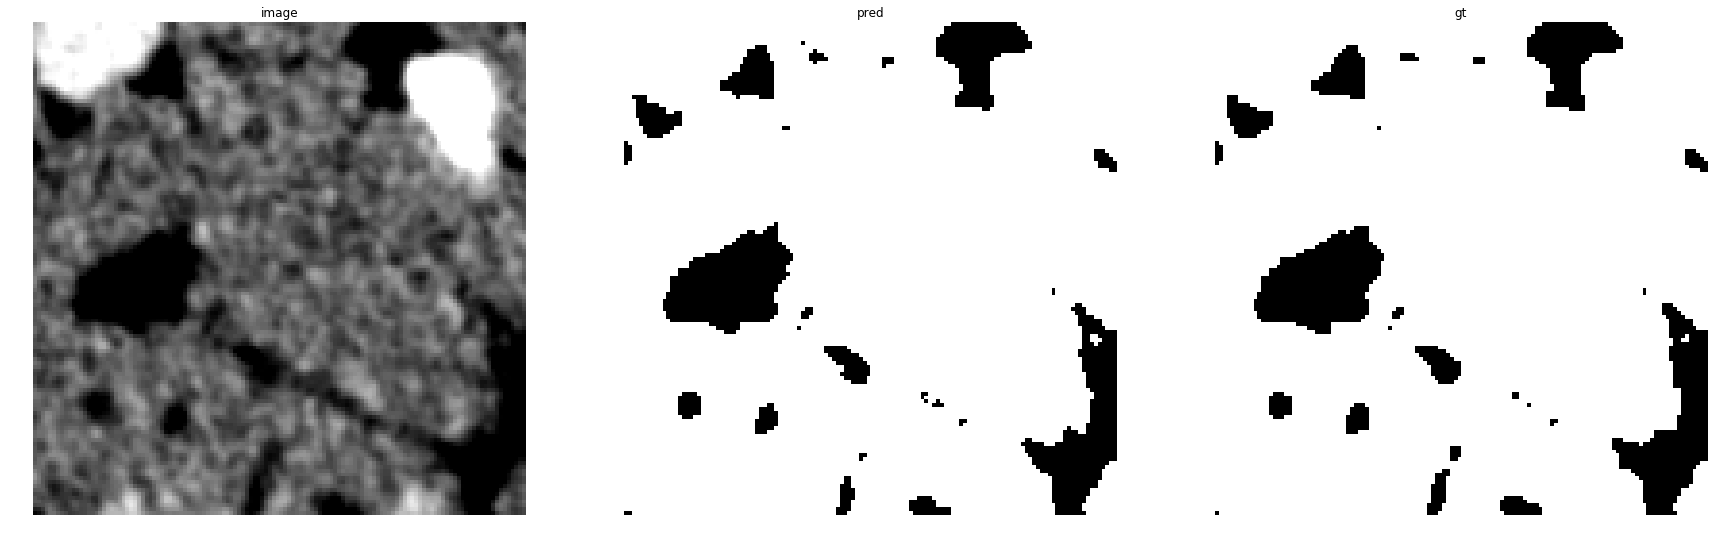

accuracy    : 0.99334716796875
precision   : 0.993615987787107
recall      : 0.9988141741071429
f1          : 0.9962082999965214
pr_auc      : 0.9999478218472988
iou         : 0.9924452453562518


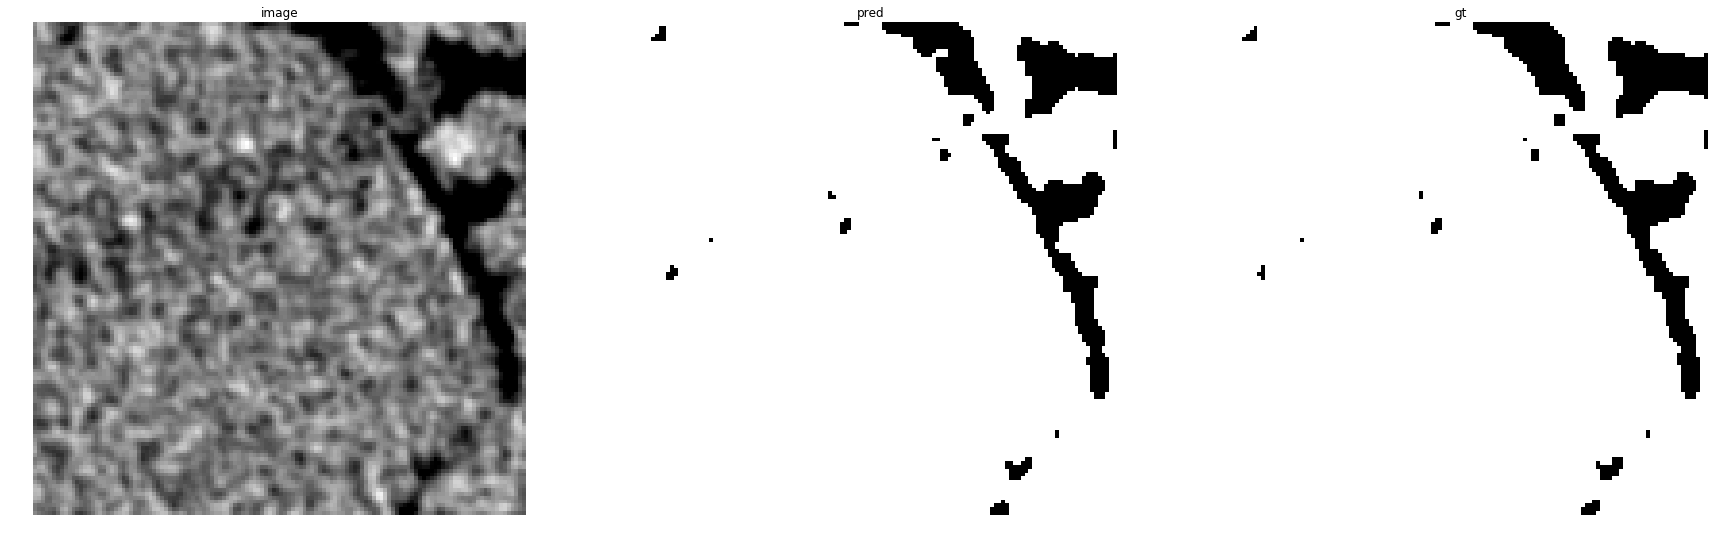

accuracy    : 0.99676513671875
precision   : 0.9976922062508242
recall      : 0.9988118027592581
f1          : 0.9982516905822201
pr_auc      : 0.9999873926909135
iou         : 0.9965094836670179


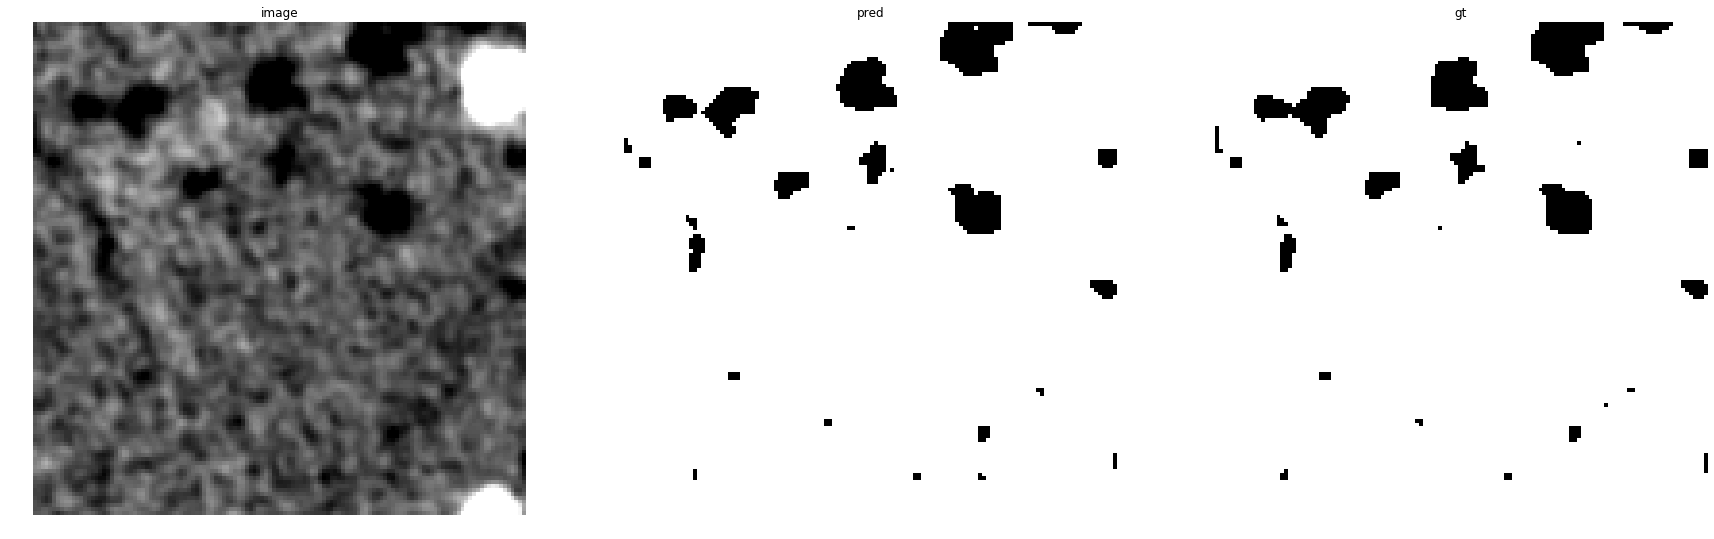

accuracy    : 0.9959716796875
precision   : 0.9972200672355831
recall      : 0.9985111341273951
f1          : 0.997865183076724
pr_auc      : 0.9999877101394792
iou         : 0.9957394616228779


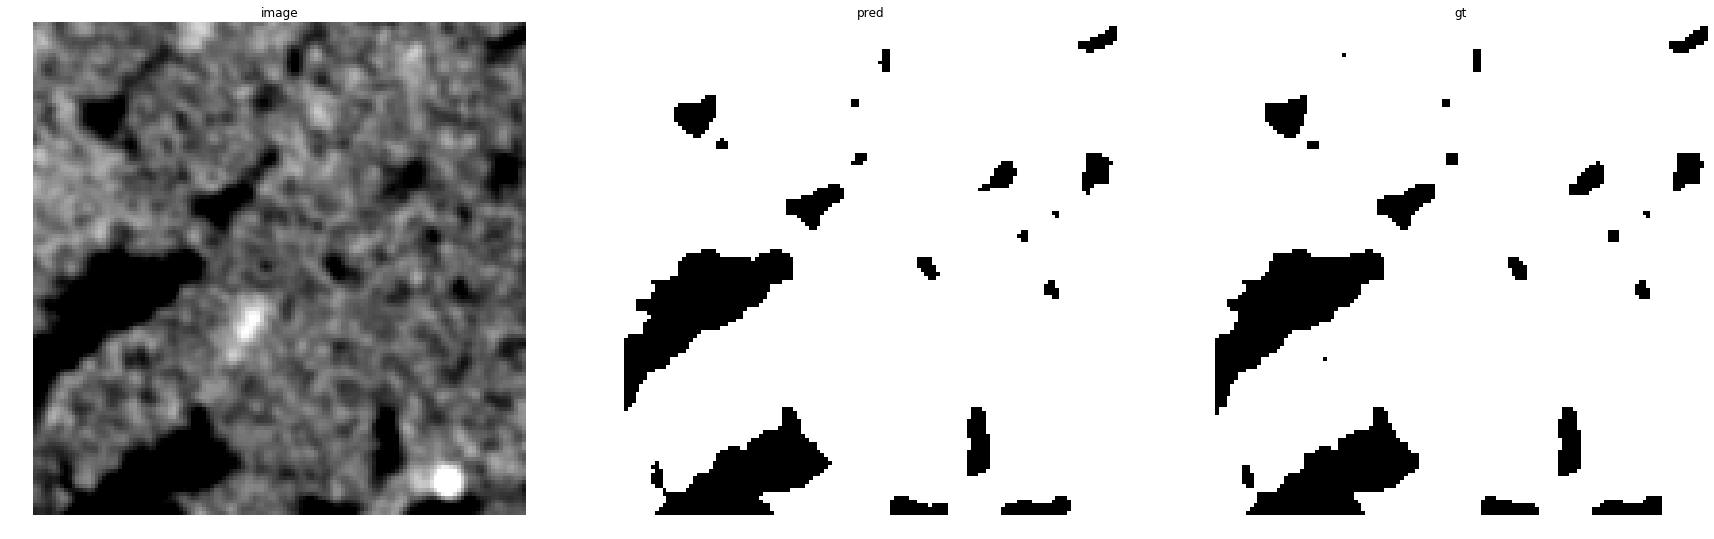

accuracy    : 0.9945068359375
precision   : 0.9956307649628962
recall      : 0.9981227838420358
f1          : 0.9968752169988195
pr_auc      : 0.9999702028370261
iou         : 0.9937699017028936


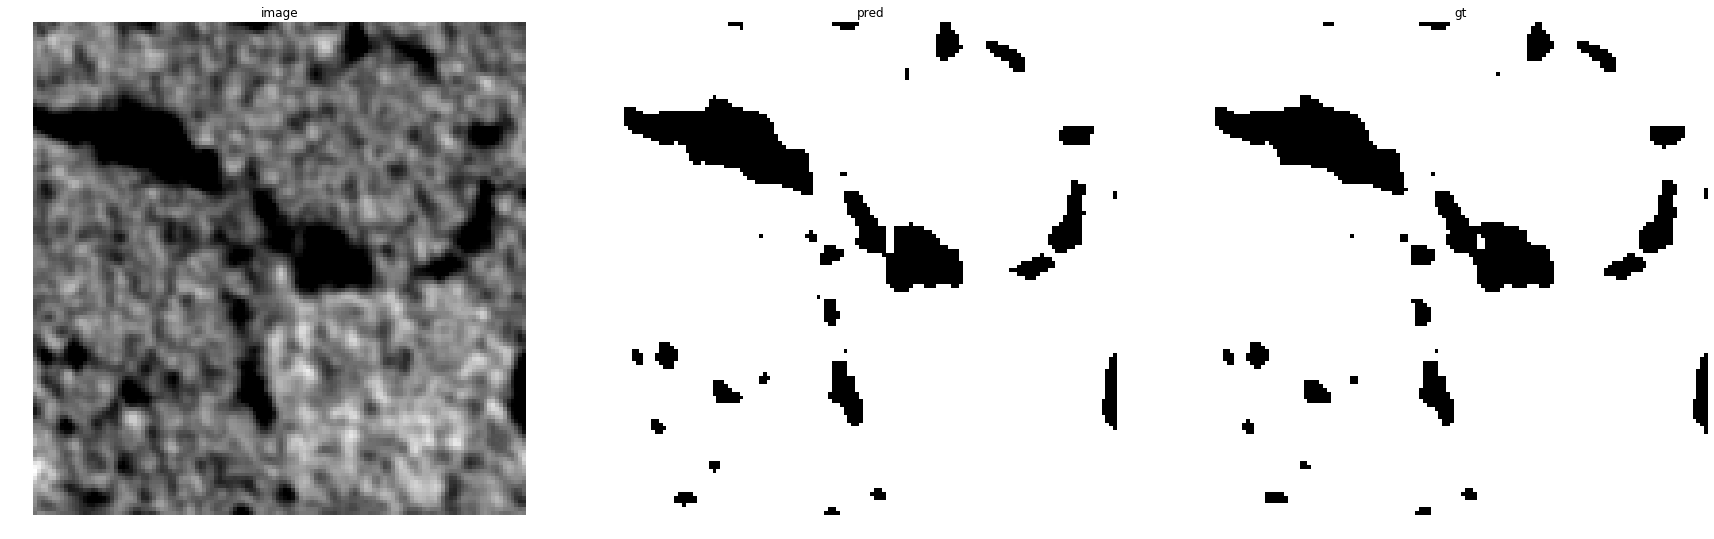

accuracy    : 0.99371337890625
precision   : 0.9947307978112545
recall      : 0.9983050847457627
f1          : 0.996514736236592
pr_auc      : 0.9999685505599978
iou         : 0.9930536822228216


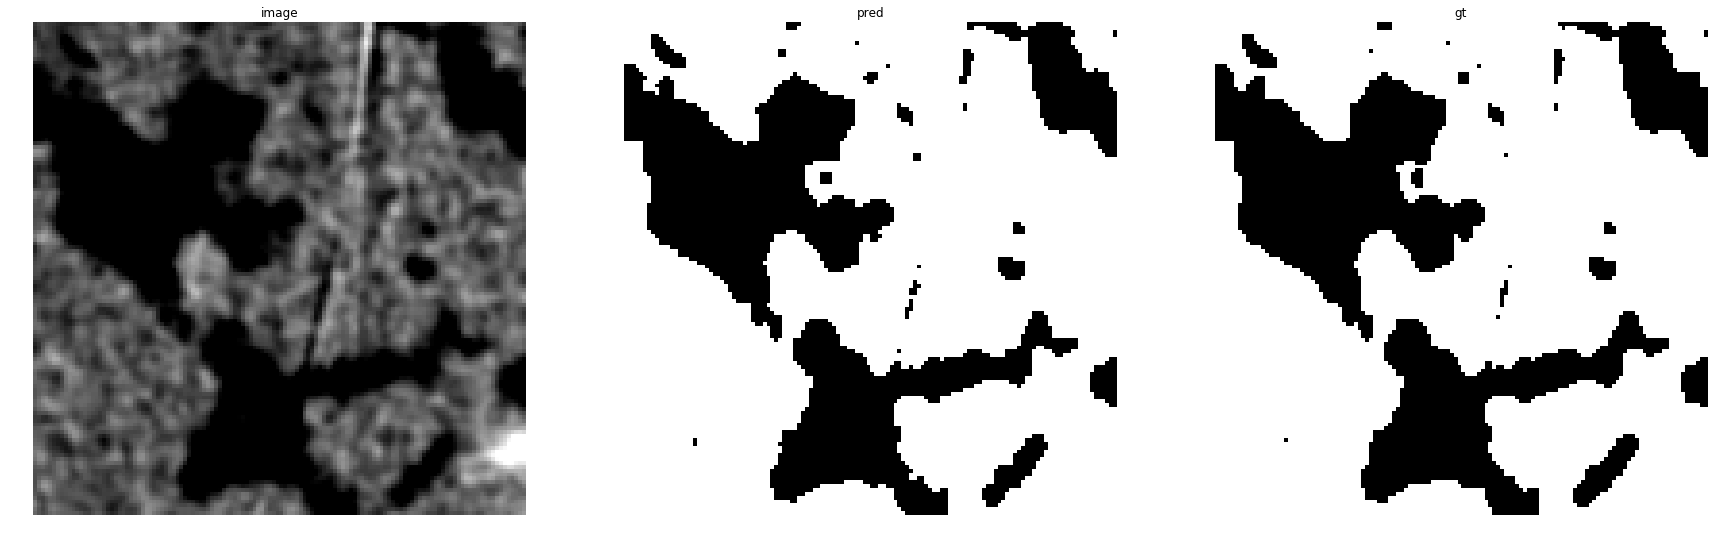

accuracy    : 0.9918212890625
precision   : 0.99110996029691
recall      : 0.997307625499392
f1          : 0.9941991341991342
pr_auc      : 0.9999112068701975
iou         : 0.9884651803391581


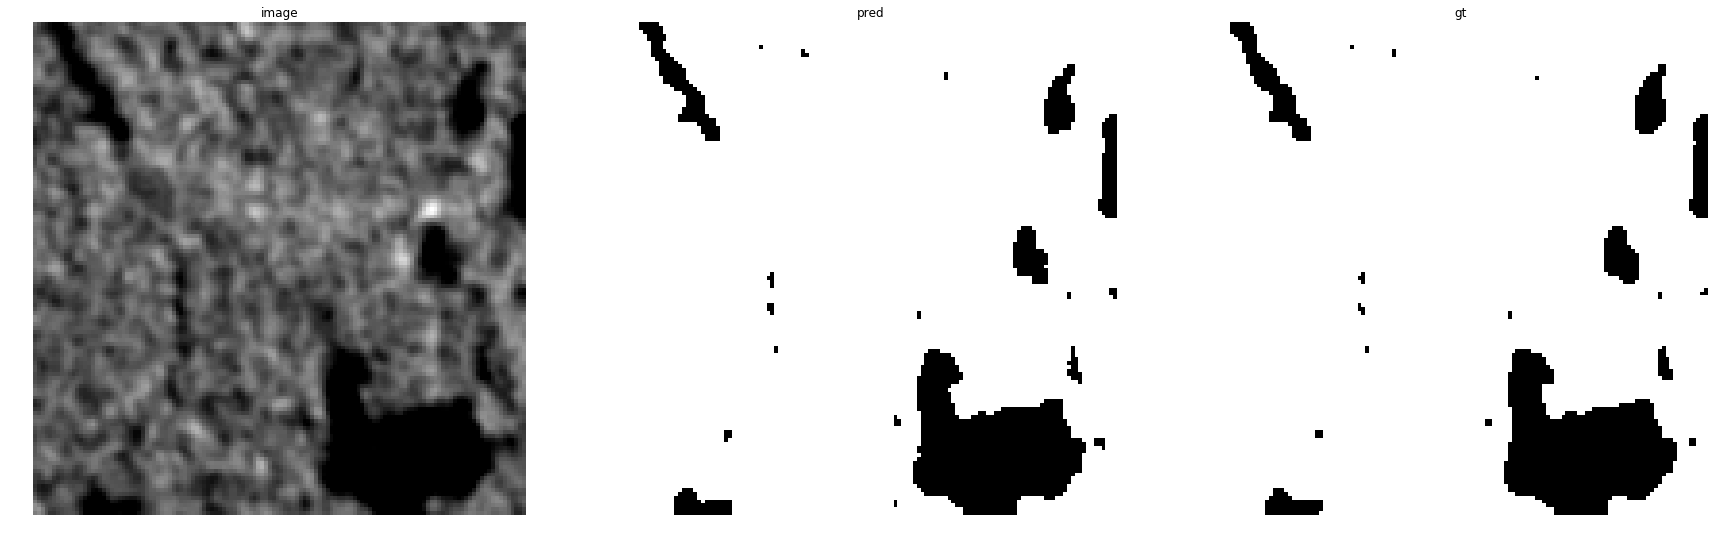

accuracy    : 0.994873046875
precision   : 0.9959693947260555
recall      : 0.9982881402355519
f1          : 0.9971274194651529
pr_auc      : 0.9999794706109357
iou         : 0.9942712950965014


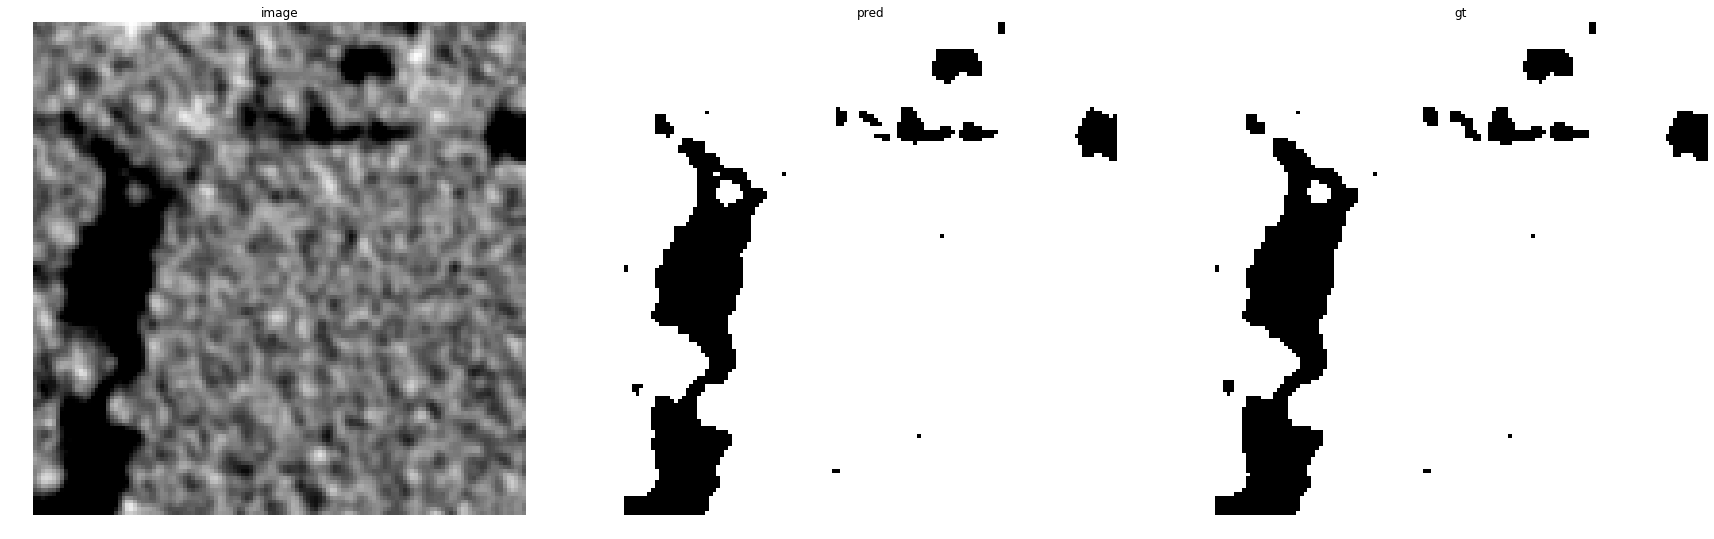

accuracy    : 0.9945068359375
precision   : 0.994502096075871
recall      : 0.9993094399558041
f1          : 0.9968999724441995
pr_auc      : 0.9999771174620192
iou         : 0.9938191058306435


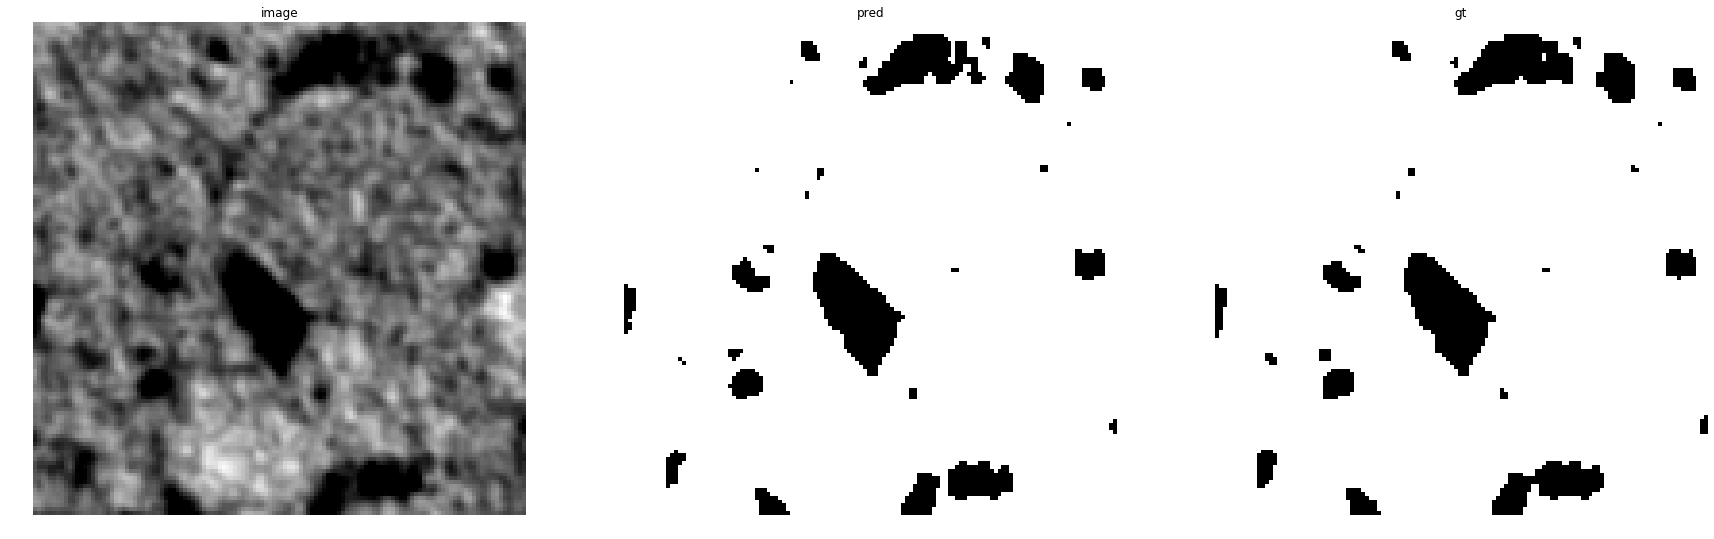

accuracy    : 0.99322509765625
precision   : 0.9940167530913442
recall      : 0.9985974754558204
f1          : 0.9963018490754623
pr_auc      : 0.9999667707617005
iou         : 0.9926309500099582


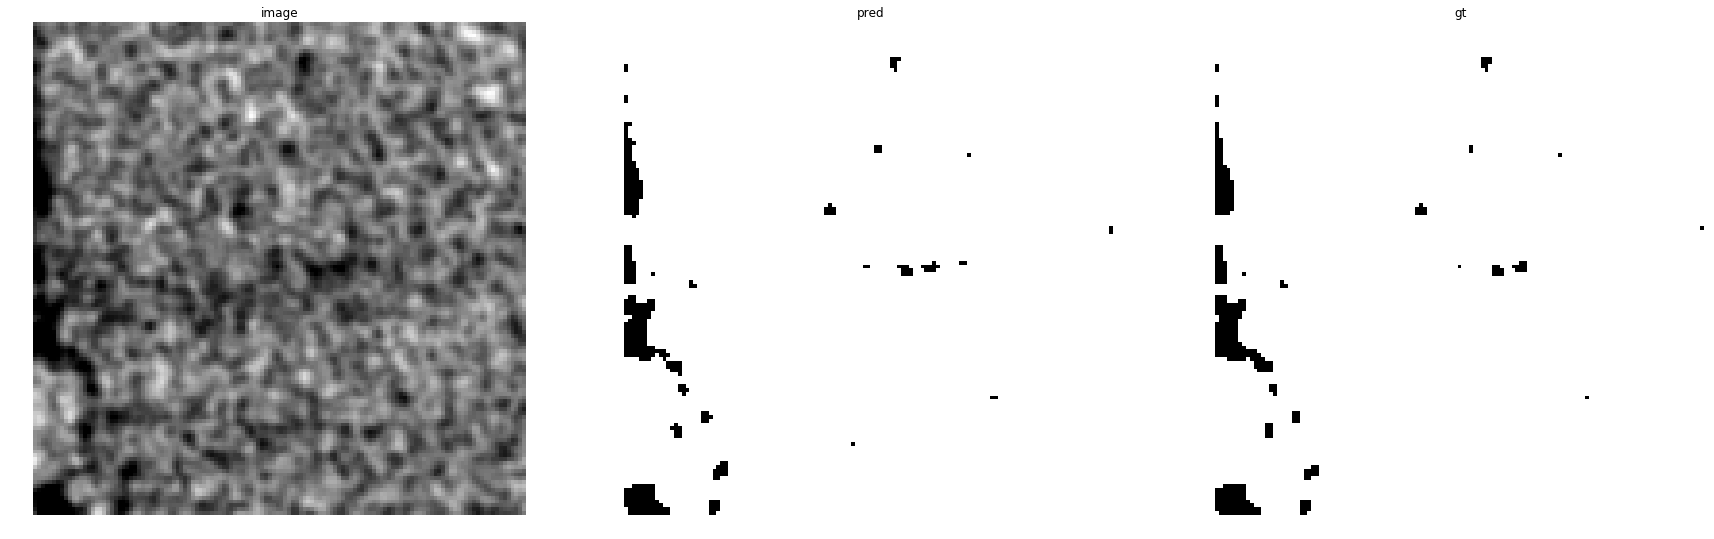

accuracy    : 0.99749755859375
precision   : 0.9987488270253363
recall      : 0.9986863505567372
f1          : 0.9987175878139565
pr_auc      : 0.9999954734046792
iou         : 0.9974384605772835


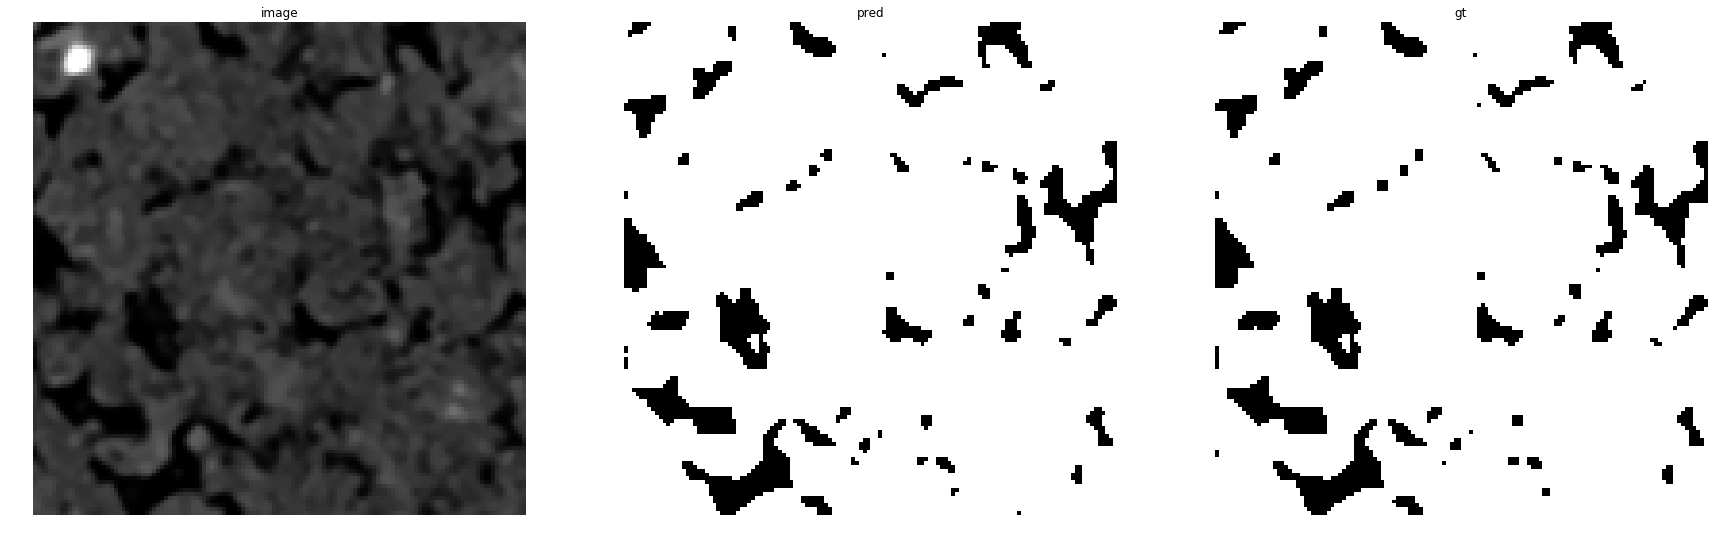

accuracy    : 0.99310302734375
precision   : 0.9964417681675106
recall      : 0.9958284893660672
f1          : 0.9961350343742518
pr_auc      : 0.999957376846285
iou         : 0.9922998296422487


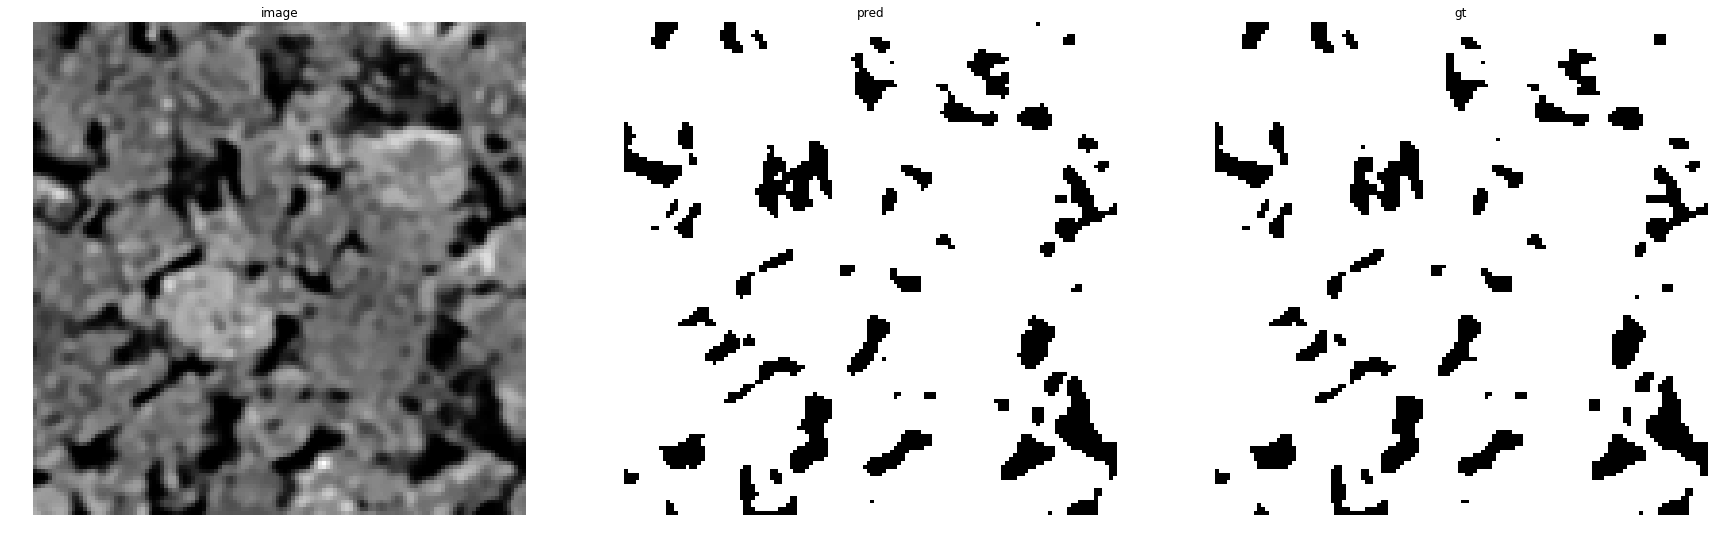

accuracy    : 0.98956298828125
precision   : 0.9958824760974248
recall      : 0.9922124878320122
f1          : 0.9940440945978893
pr_auc      : 0.9998991362308488
iou         : 0.9881587147704453


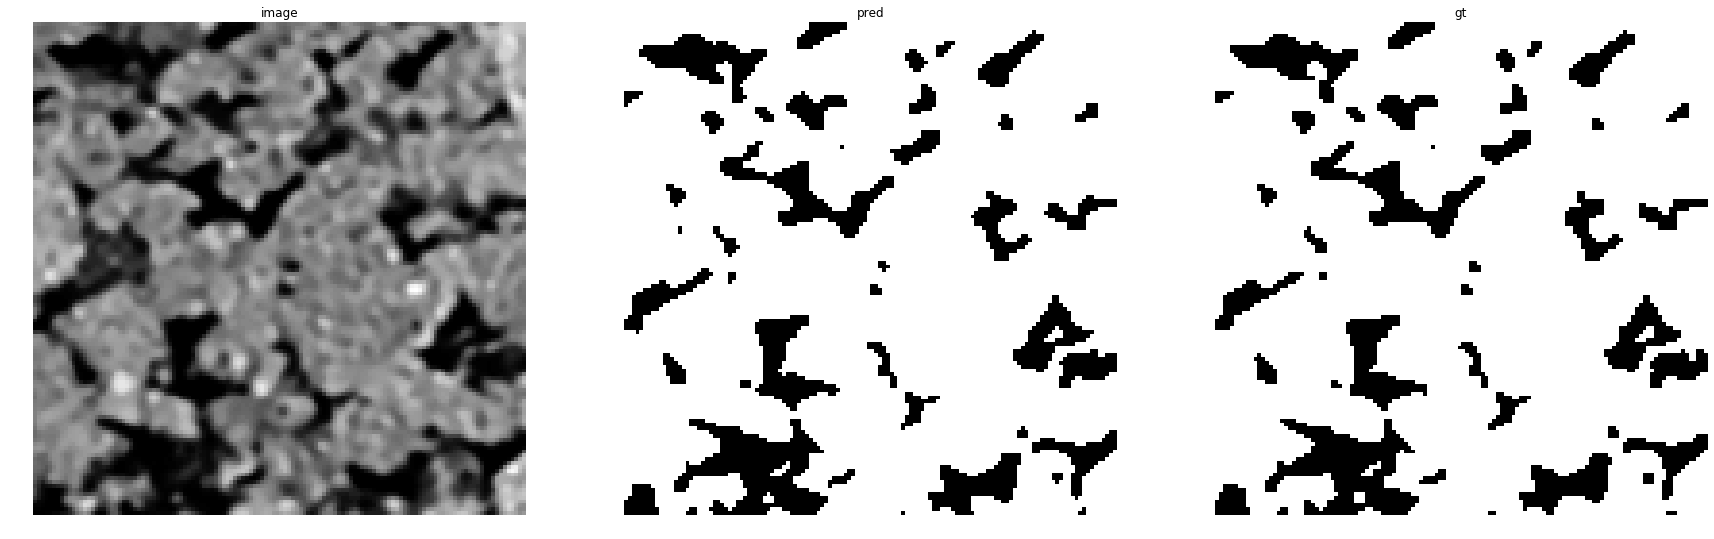

accuracy    : 0.98870849609375
precision   : 0.9945841679649826
recall      : 0.9917147507027667
f1          : 0.9931473867466756
pr_auc      : 0.9998709677037311
iou         : 0.9863880509160474


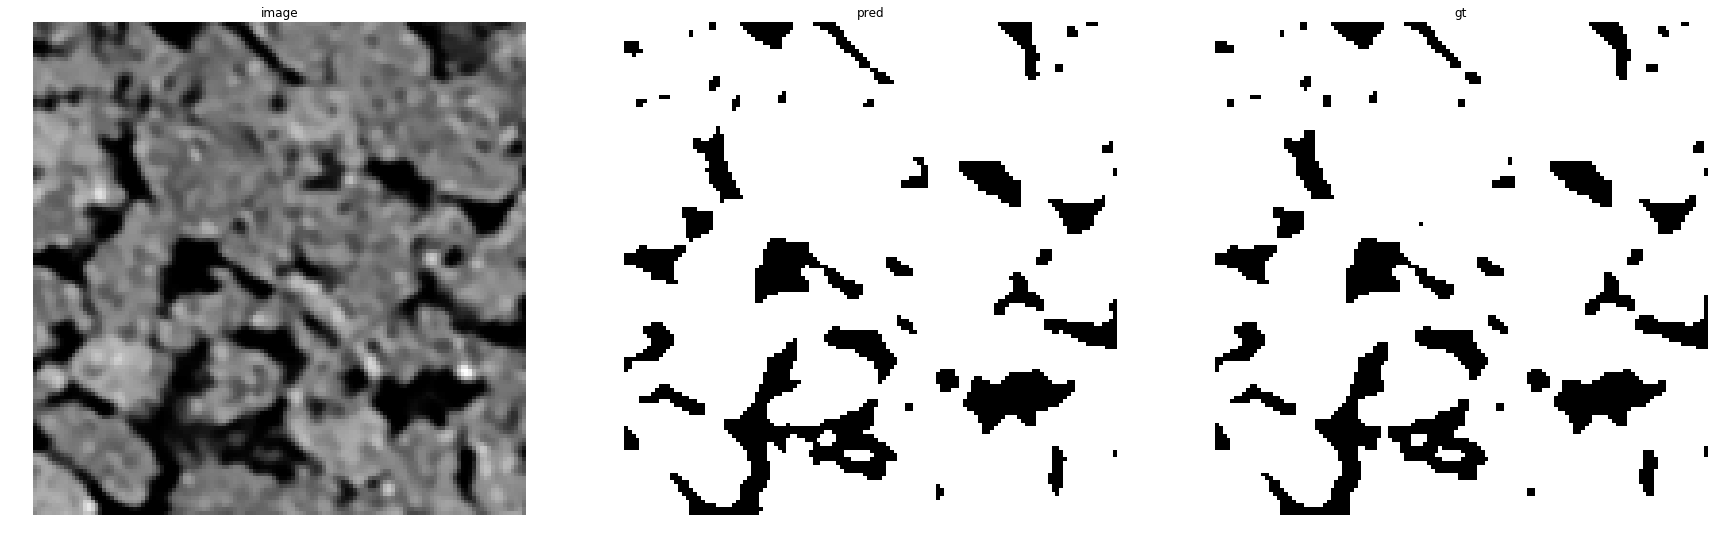

accuracy    : 0.99005126953125
precision   : 0.99541119954112
recall      : 0.9929194678872837
f1          : 0.9941637724229296
pr_auc      : 0.9999043733079714
iou         : 0.9883952726754948


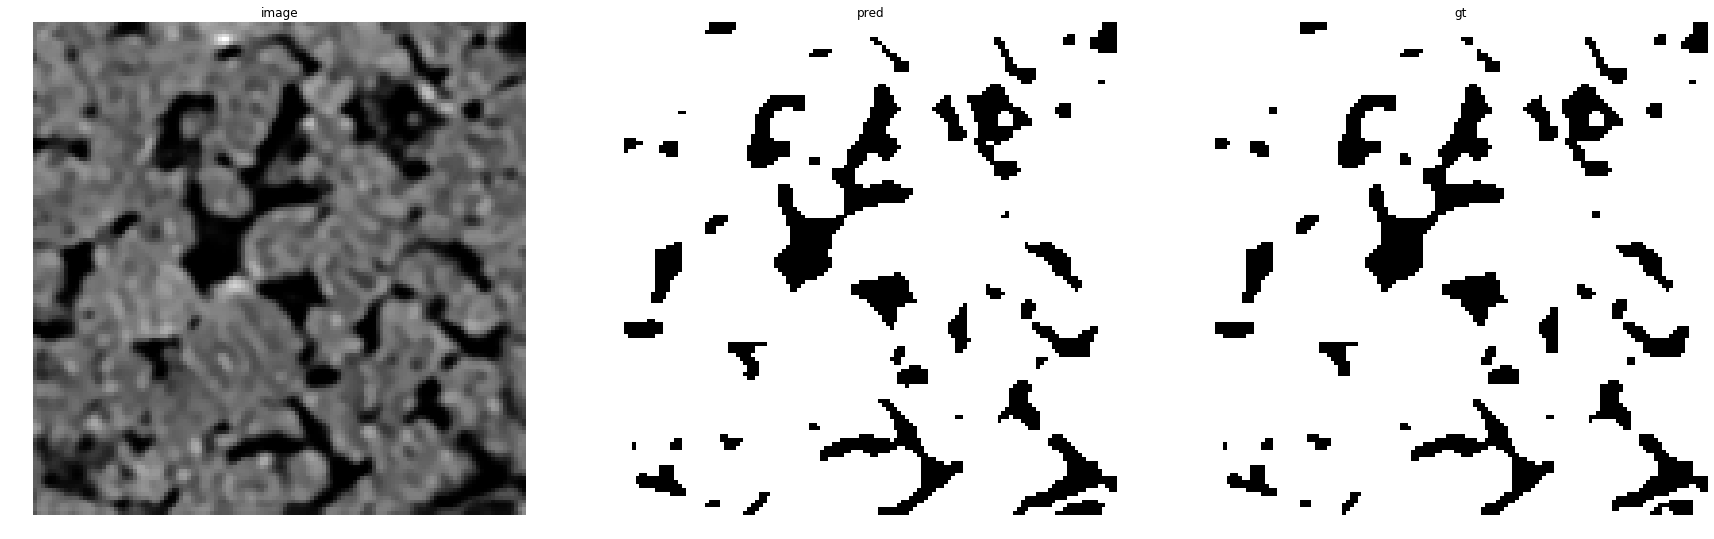

accuracy    : 0.99005126953125
precision   : 0.9953004841925377
recall      : 0.9931083481349912
f1          : 0.9942032077954408
pr_auc      : 0.9999115344545484
iou         : 0.9884732338589916


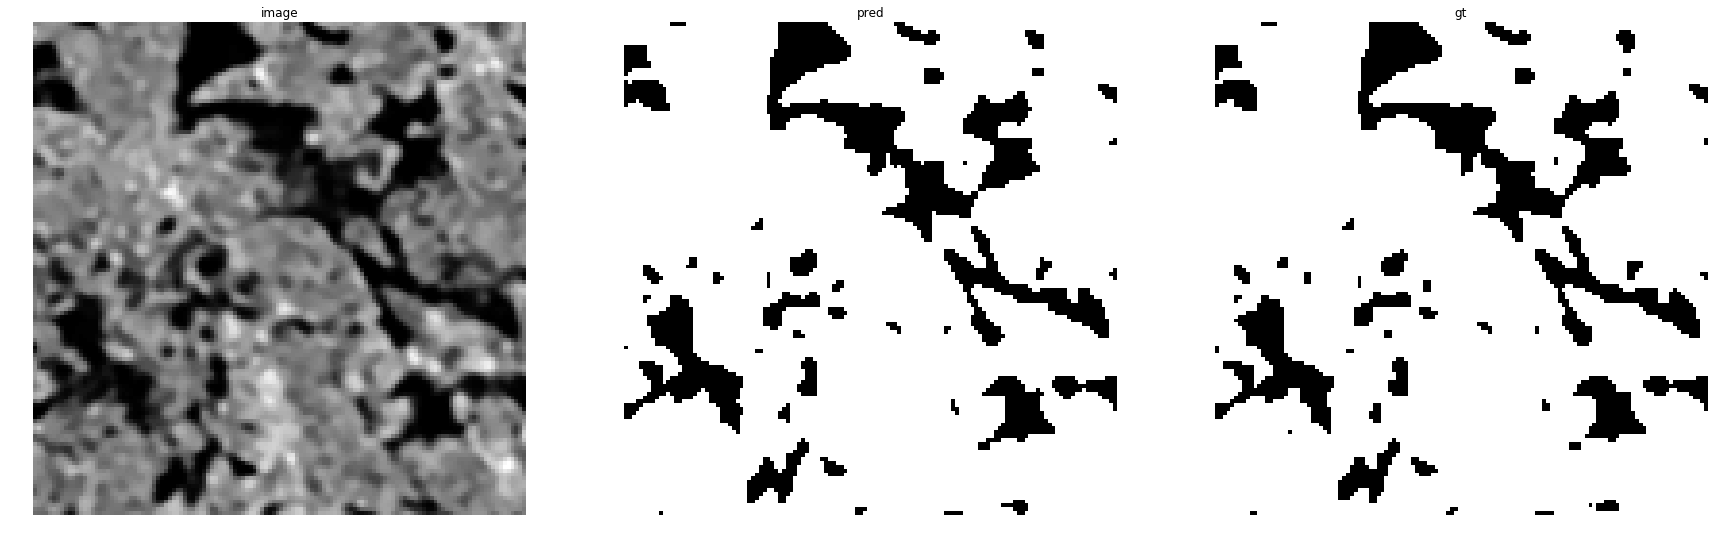

accuracy    : 0.98980712890625
precision   : 0.9953212954163316
recall      : 0.9924916168537687
f1          : 0.9939044420922
pr_auc      : 0.9999036873175086
iou         : 0.9878827456102163


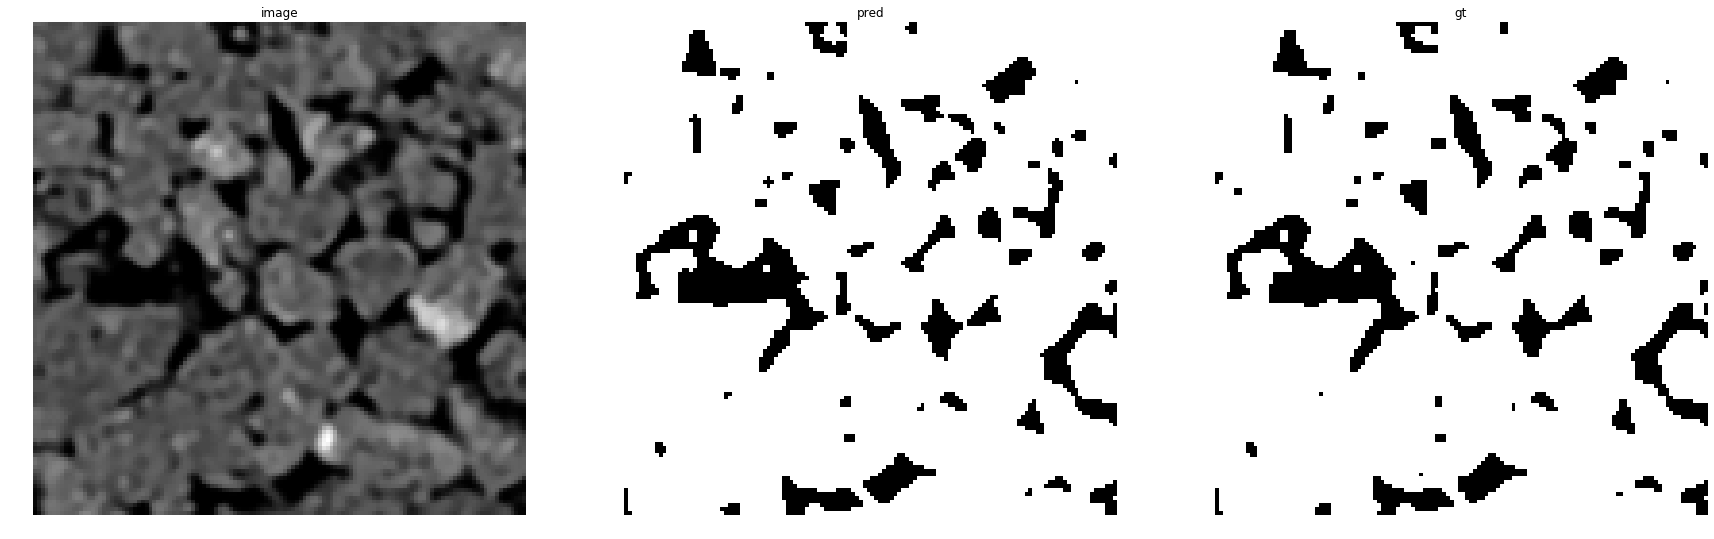

accuracy    : 0.9901123046875
precision   : 0.9953703703703703
recall      : 0.9931068789084707
f1          : 0.9942373363688104
pr_auc      : 0.9999156148698025
iou         : 0.988540708778383


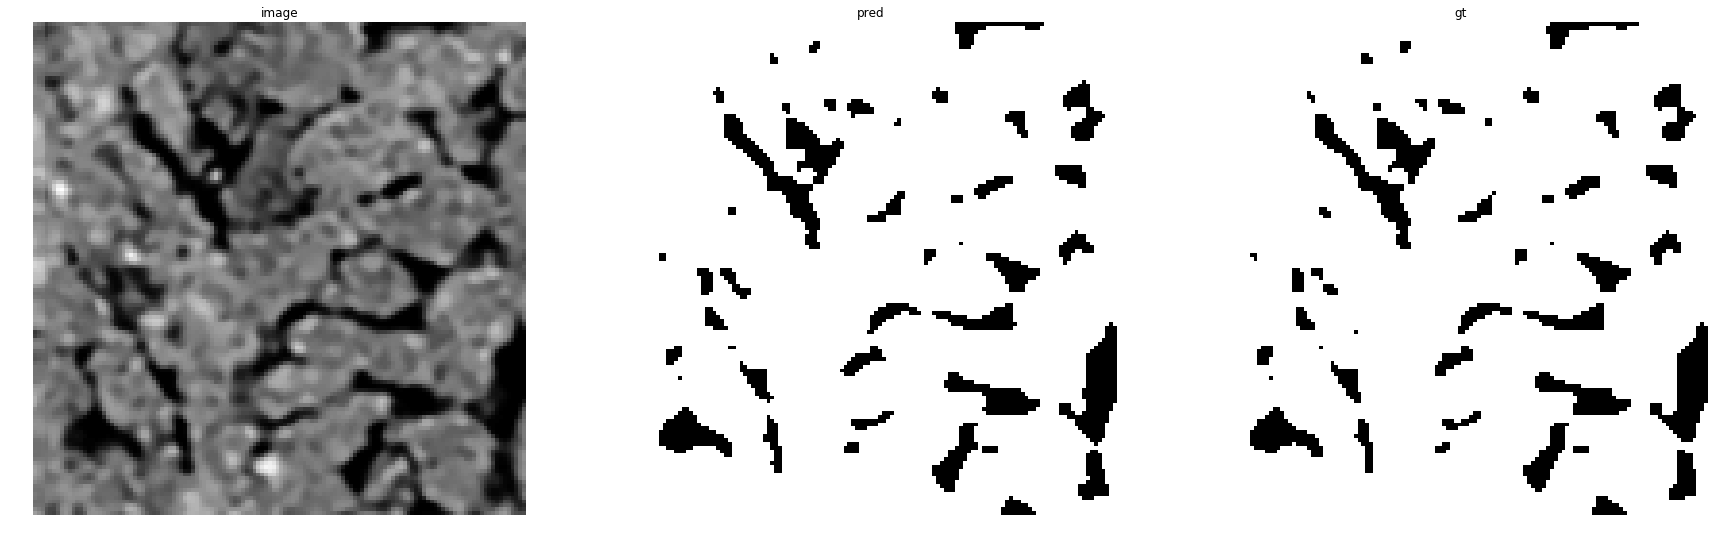

accuracy    : 0.99200439453125
precision   : 0.9969127332601537
recall      : 0.9941164397619211
f1          : 0.9955126228890488
pr_auc      : 0.999944976948952
iou         : 0.991065338971491


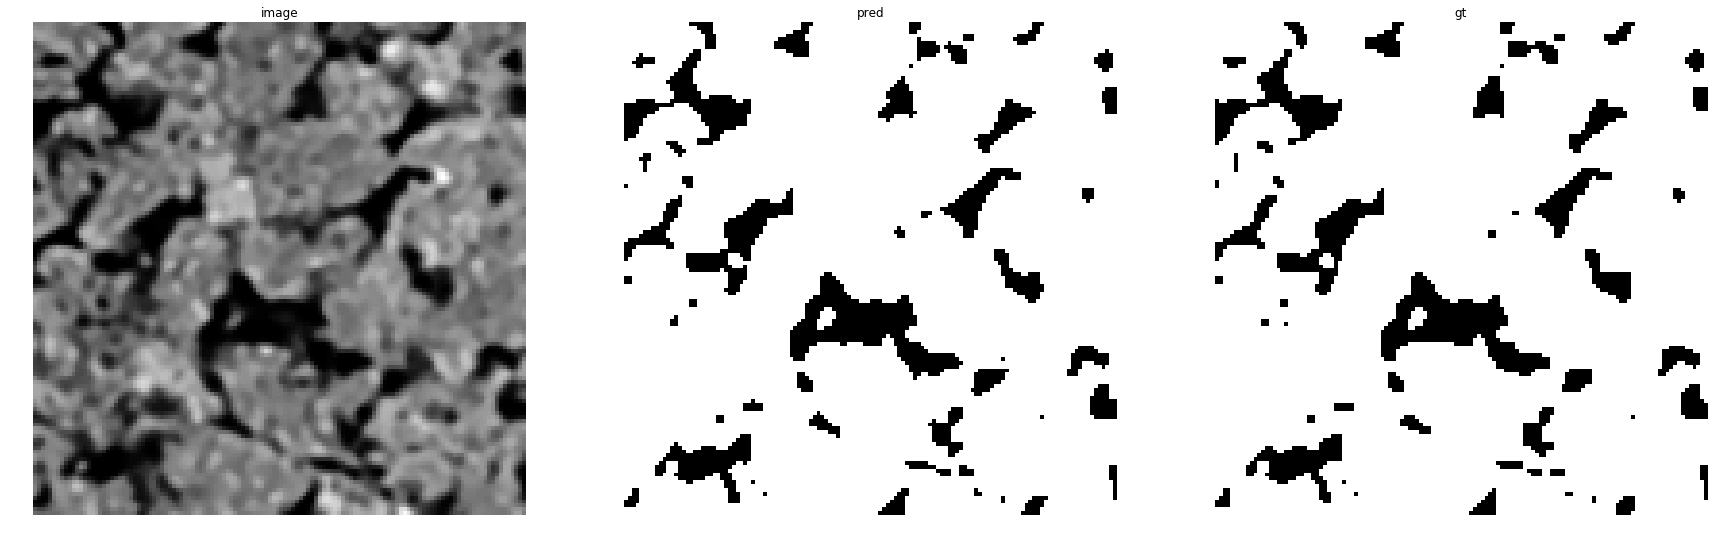

accuracy    : 0.9906005859375
precision   : 0.9955618175413878
recall      : 0.9936019123954158
f1          : 0.9945808994299388
pr_auc      : 0.9999174963539718
iou         : 0.9892202155956881


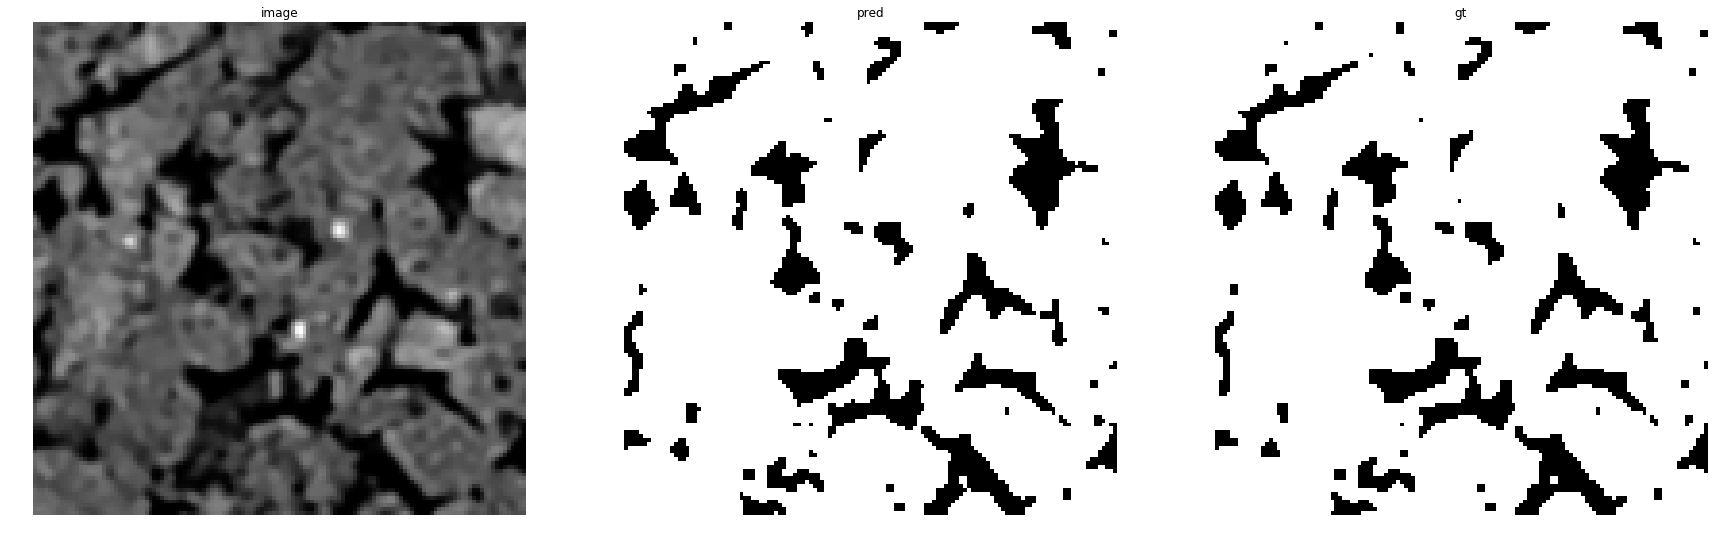

accuracy    : 0.9908447265625
precision   : 0.9958177098355927
recall      : 0.9933822471586822
f1          : 0.9945984875765215
pr_auc      : 0.9999109718509274
iou         : 0.9892550143266475


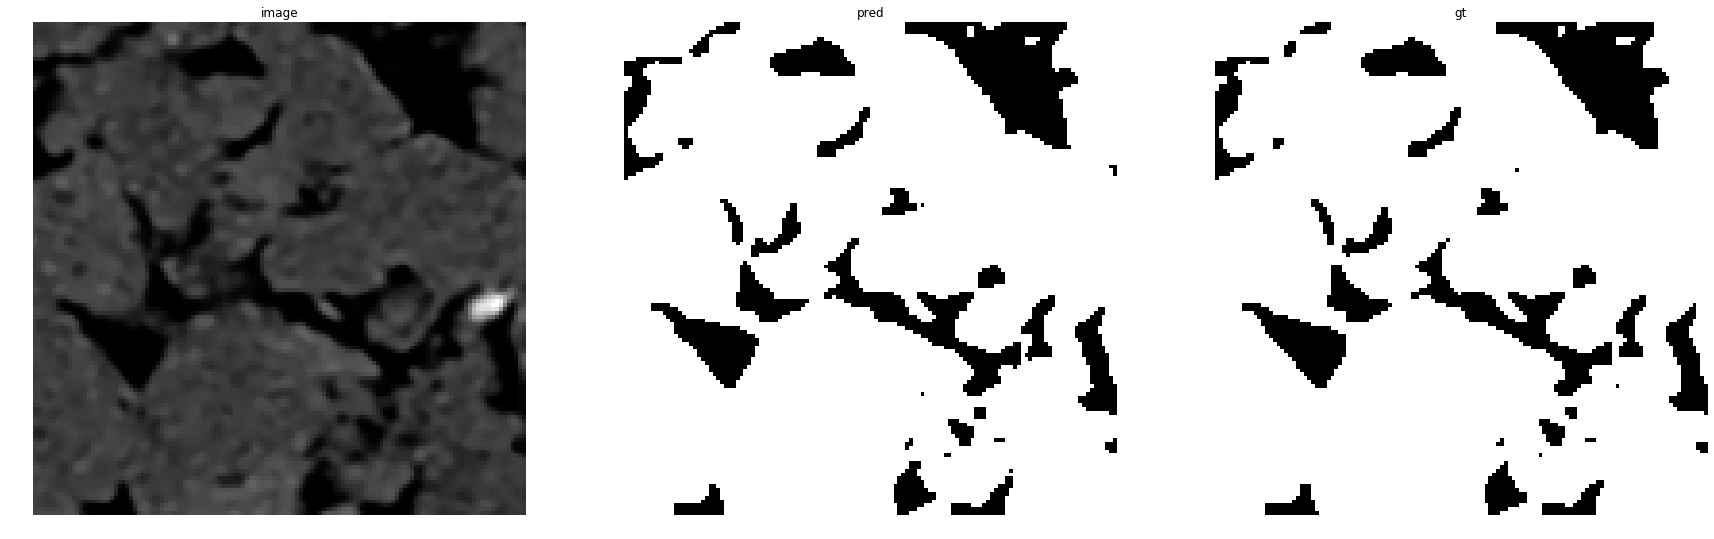

accuracy    : 0.99102783203125
precision   : 0.995348161069923
recall      : 0.9939754663569718
f1          : 0.9946613401125841
pr_auc      : 0.9999256564997269
iou         : 0.9893793801025937


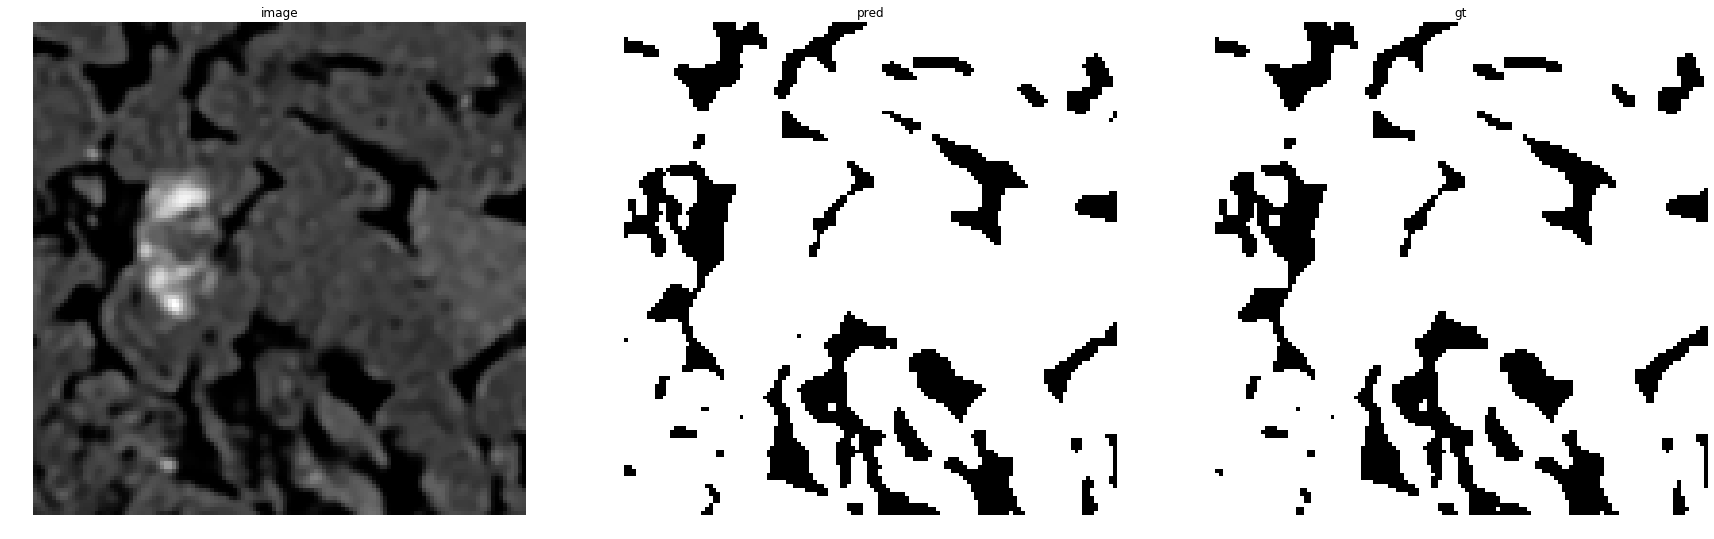

accuracy    : 0.98760986328125
precision   : 0.9932890910446648
recall      : 0.9915885067738573
f1          : 0.992438070404172
pr_auc      : 0.9998482108217075
iou         : 0.9849896480331263


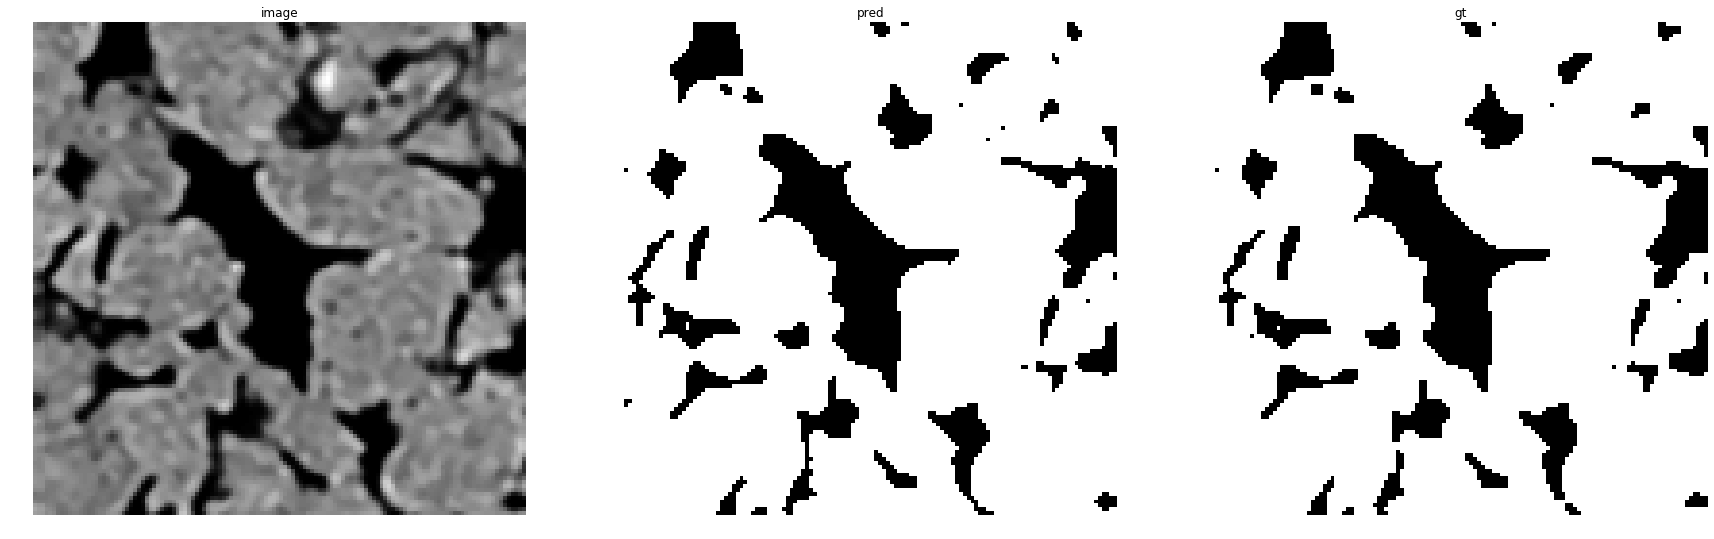

accuracy    : 0.98956298828125
precision   : 0.9942200870740129
recall      : 0.9929529949771347
f1          : 0.993586137054124
pr_auc      : 0.9998955939636318
iou         : 0.9872540250447227


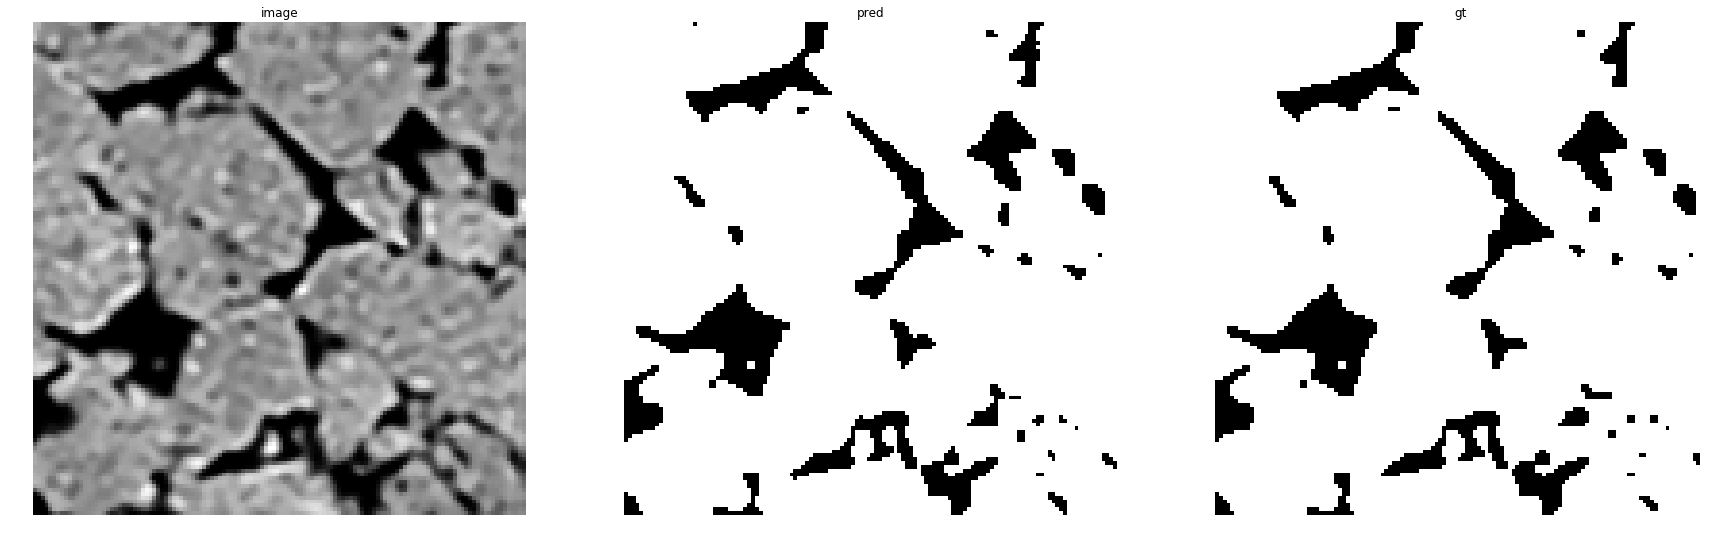

accuracy    : 0.99267578125
precision   : 0.9967707967707967
recall      : 0.994815385693267
f1          : 0.9957921312855039
pr_auc      : 0.9999478998651838
iou         : 0.9916195265032475


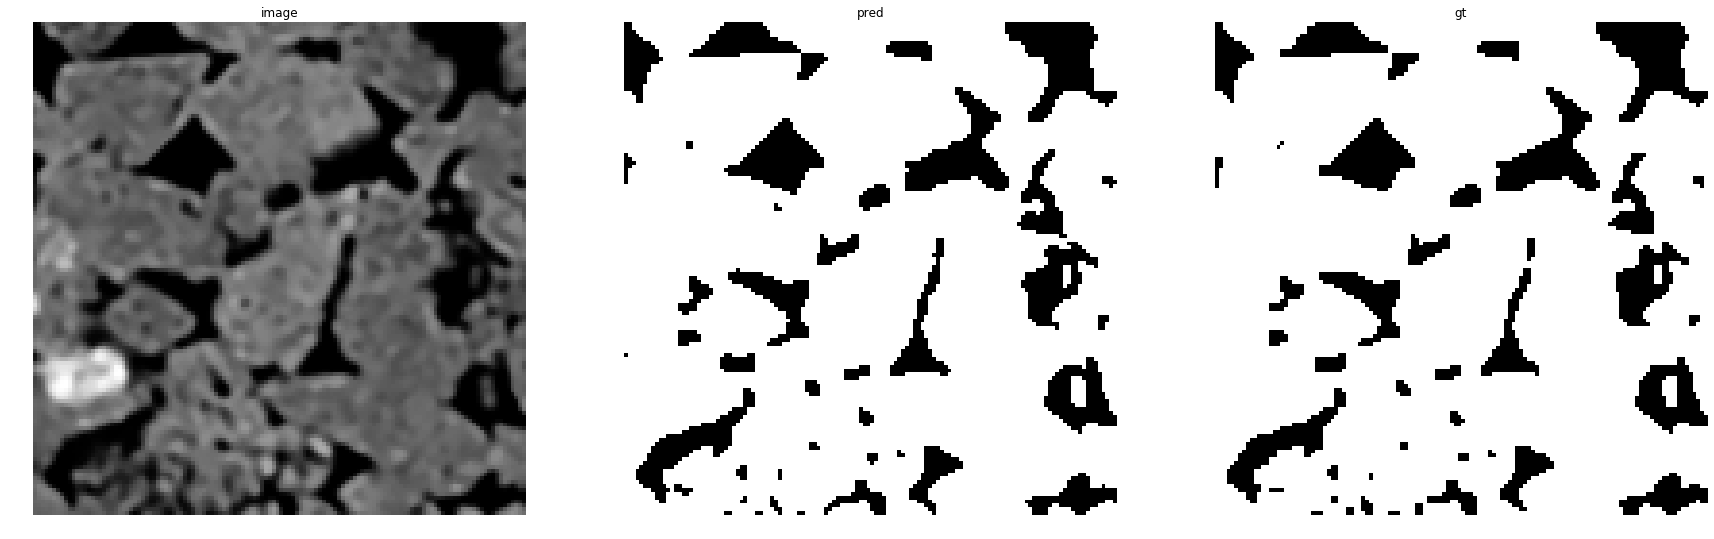

accuracy    : 0.99005126953125
precision   : 0.9961173747480027
recall      : 0.9917484388938448
f1          : 0.9939281057925126
pr_auc      : 0.9998802384666065
iou         : 0.9879295023696683


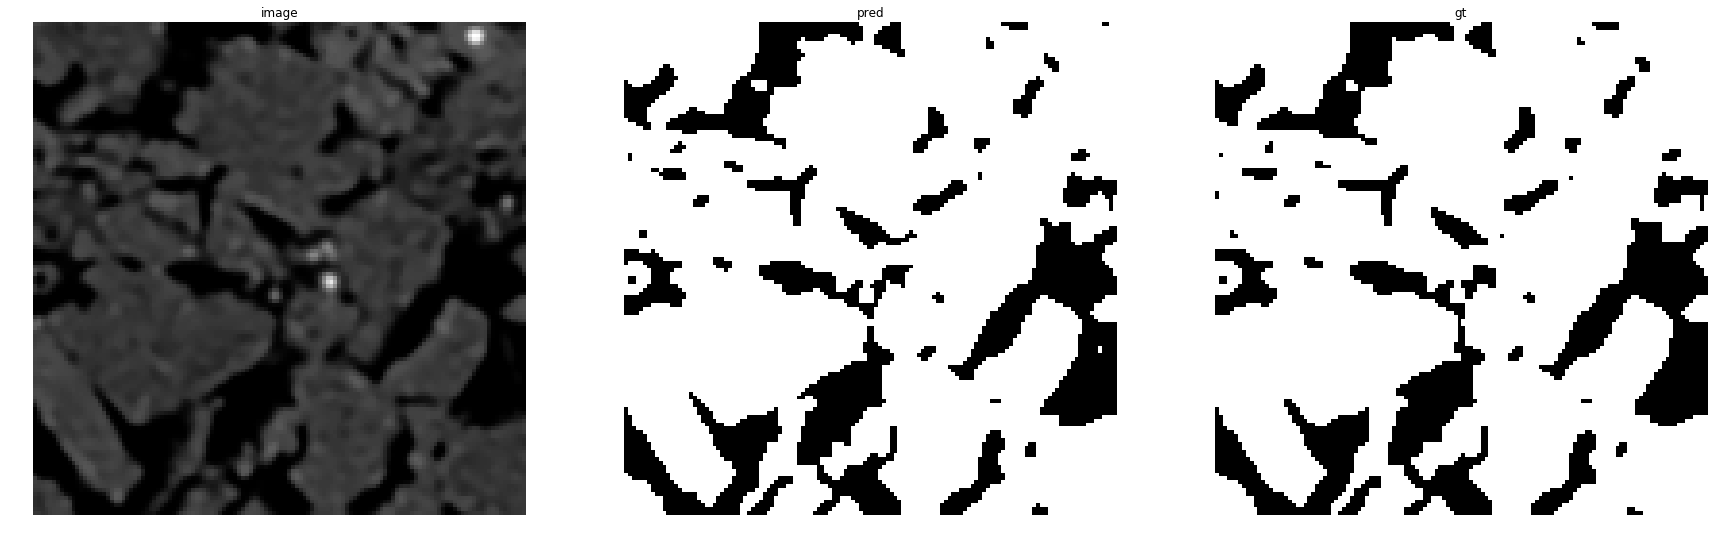

accuracy    : 0.987548828125
precision   : 0.9922222222222222
recall      : 0.9915926395939086
f1          : 0.9919073310060298
pr_auc      : 0.9998308255512712
iou         : 0.9839445931056194


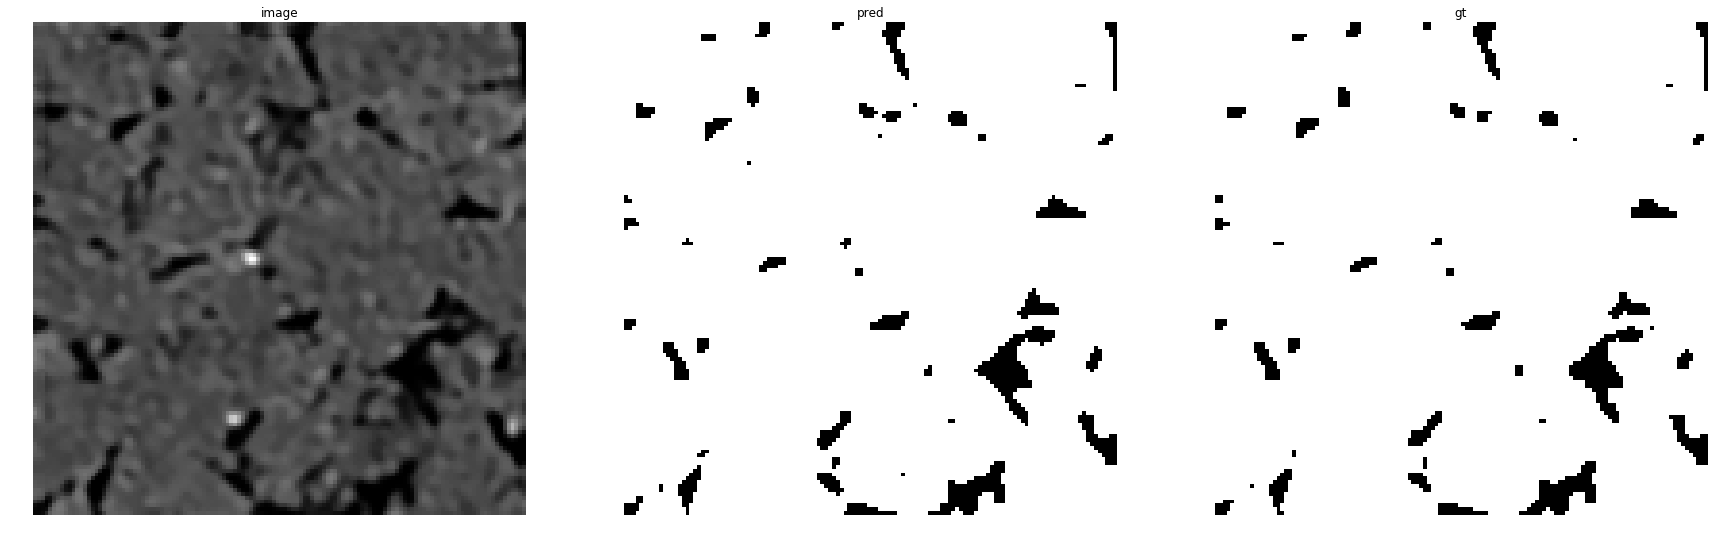

accuracy    : 0.9945068359375
precision   : 0.998315189217211
recall      : 0.9958629605688429
f1          : 0.9970875671477574
pr_auc      : 0.9999738889306212
iou         : 0.9941920495611771


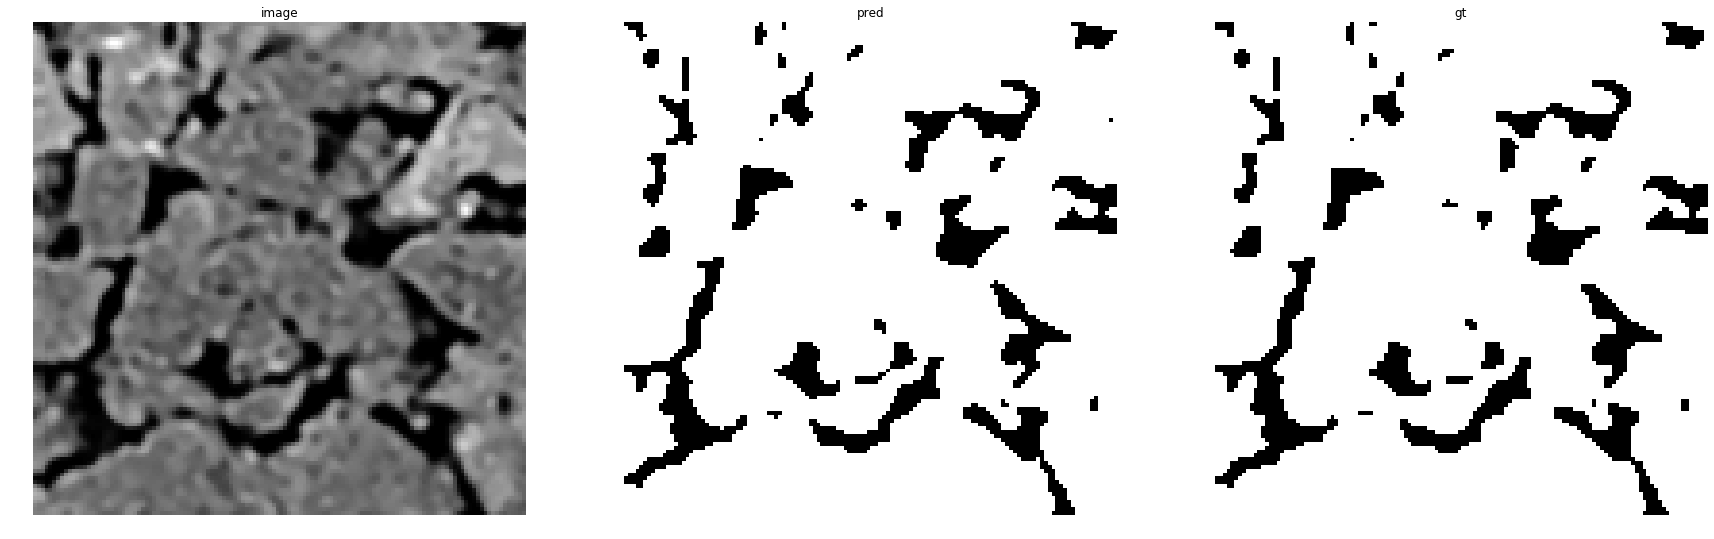

accuracy    : 0.98992919921875
precision   : 0.994750283768445
recall      : 0.993552044214554
f1          : 0.9941508029352335
pr_auc      : 0.9999012152988094
iou         : 0.9883696341721294


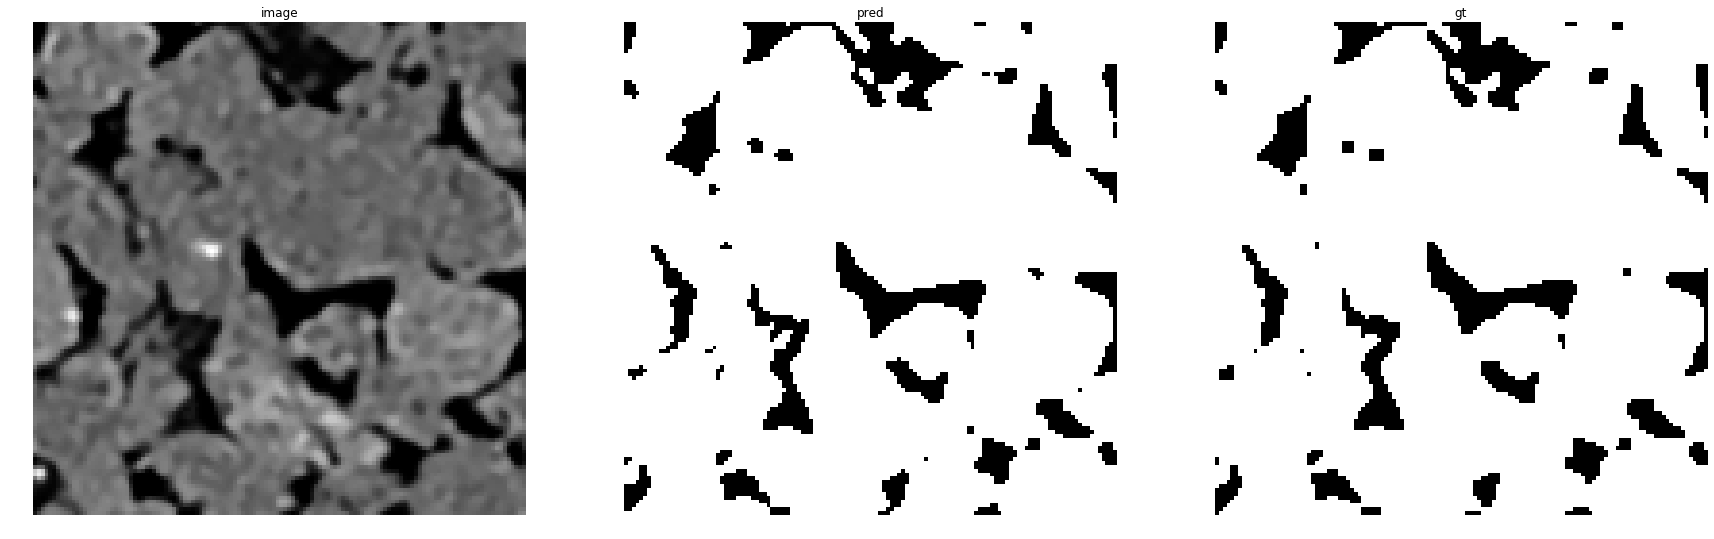

accuracy    : 0.99017333984375
precision   : 0.9955049866554291
recall      : 0.9932029990890617
f1          : 0.9943526605633308
pr_auc      : 0.9999075342487257
iou         : 0.9887687478200209


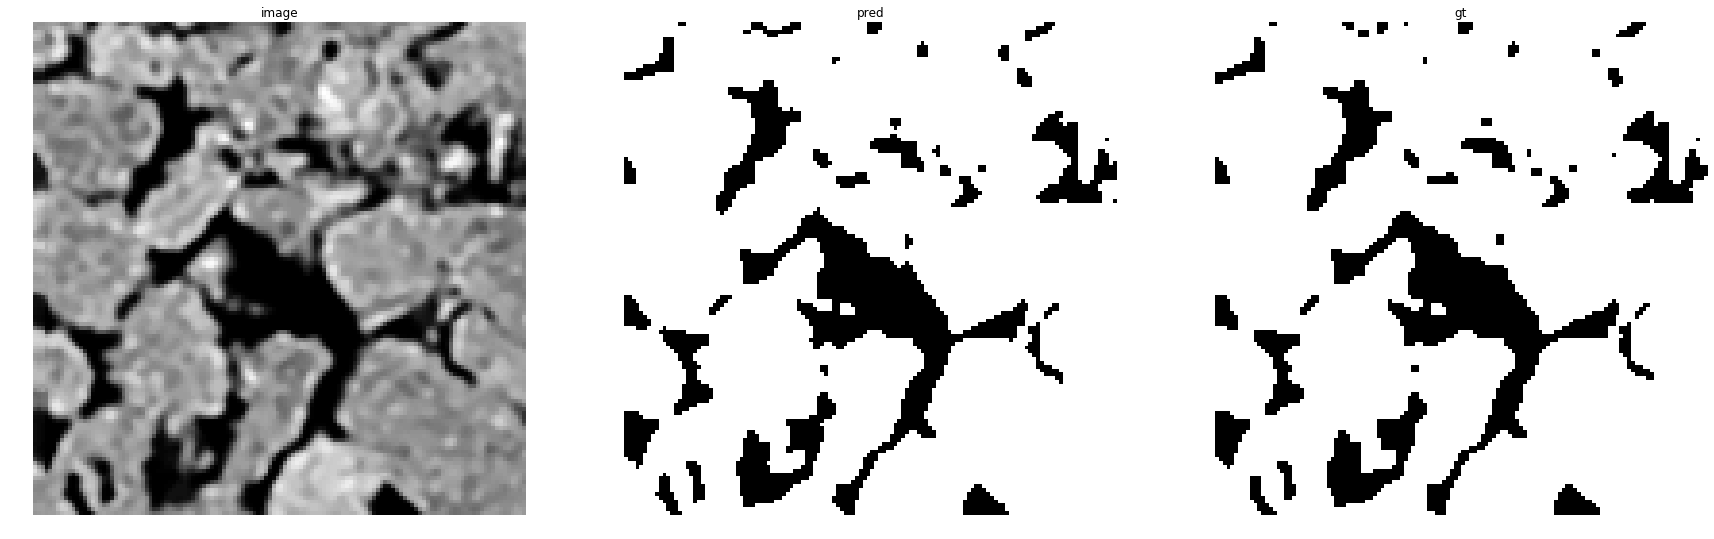

accuracy    : 0.99017333984375
precision   : 0.9949952160153087
recall      : 0.9931677931237144
f1          : 0.994080664730321
pr_auc      : 0.9998990750099349
iou         : 0.9882309941520467


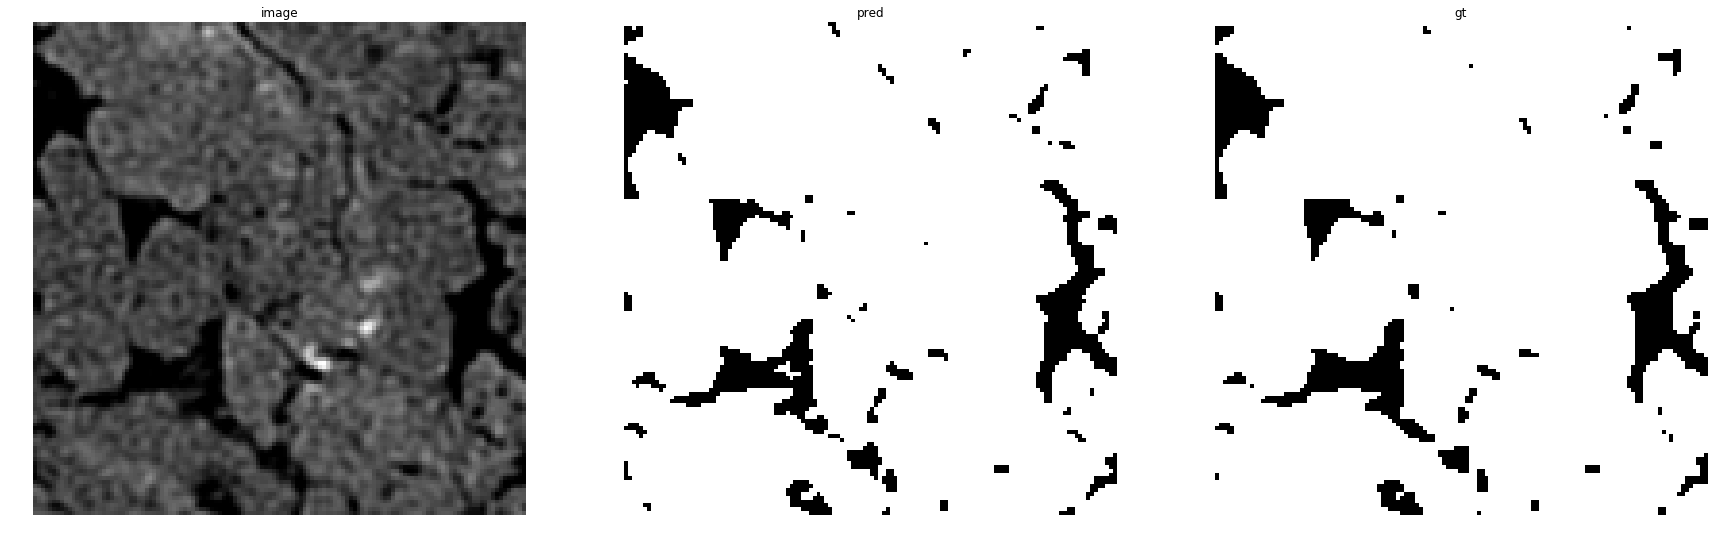

accuracy    : 0.986572265625
precision   : 0.9945692756771435
recall      : 0.9905347846663511
f1          : 0.9925479303570219
pr_auc      : 0.9998532418728802
iou         : 0.9852061058435881


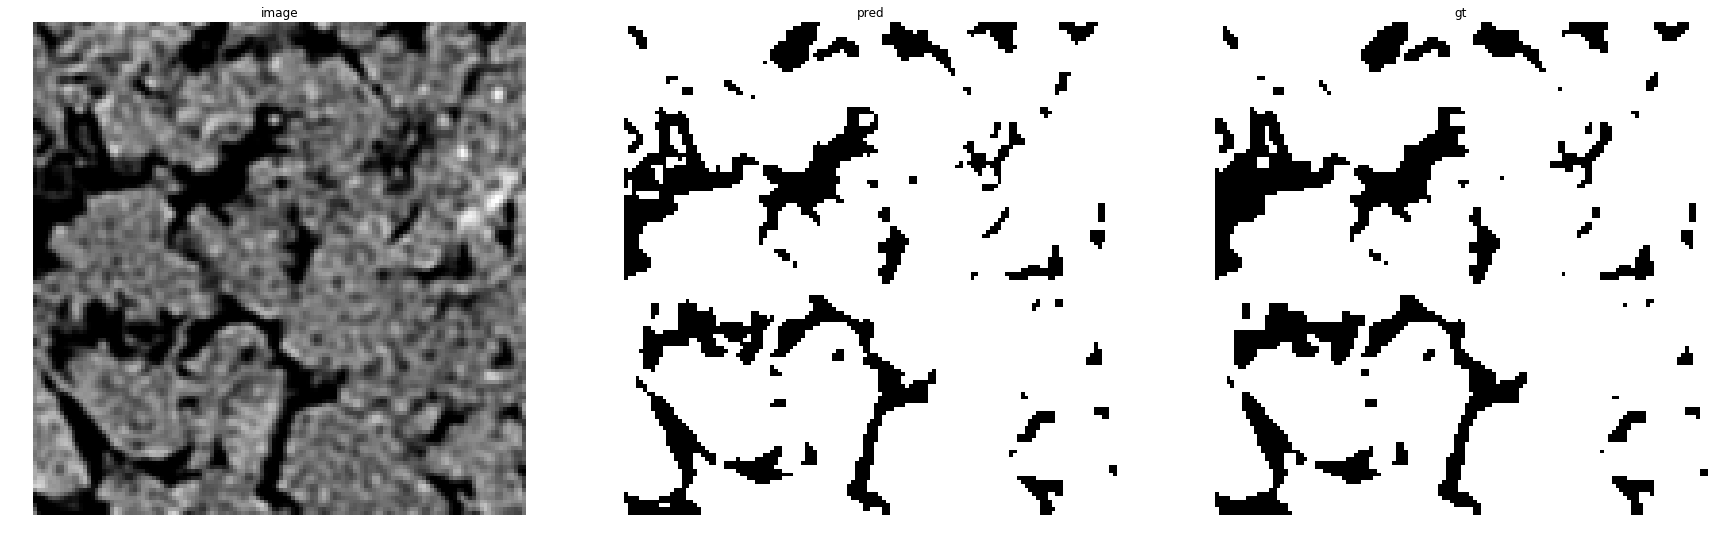

accuracy    : 0.980224609375
precision   : 0.98700445352997
recall      : 0.98931577021588
f1          : 0.9881587603245375
pr_auc      : 0.999557478566082
iou         : 0.9765946687856678


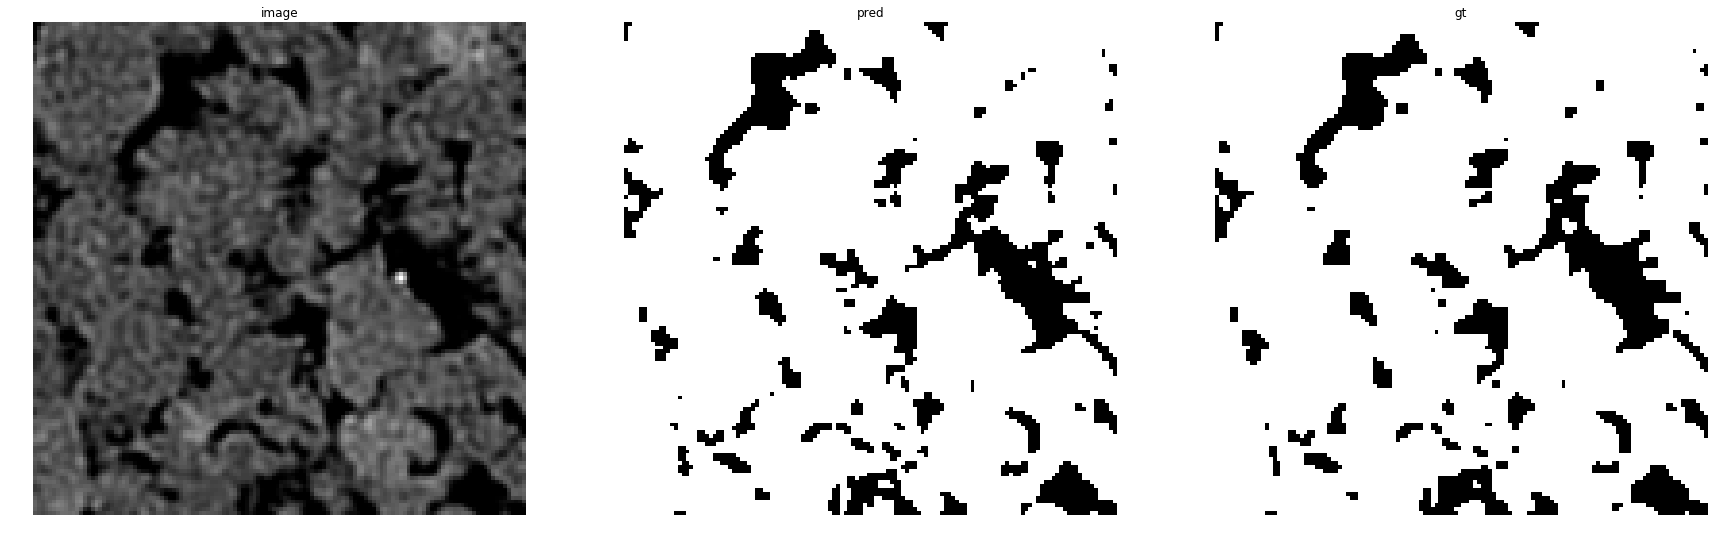

accuracy    : 0.97930908203125
precision   : 0.9884551554946245
recall      : 0.987101887880098
f1          : 0.9877780581894221
pr_auc      : 0.9995878011983687
iou         : 0.9758512608633708


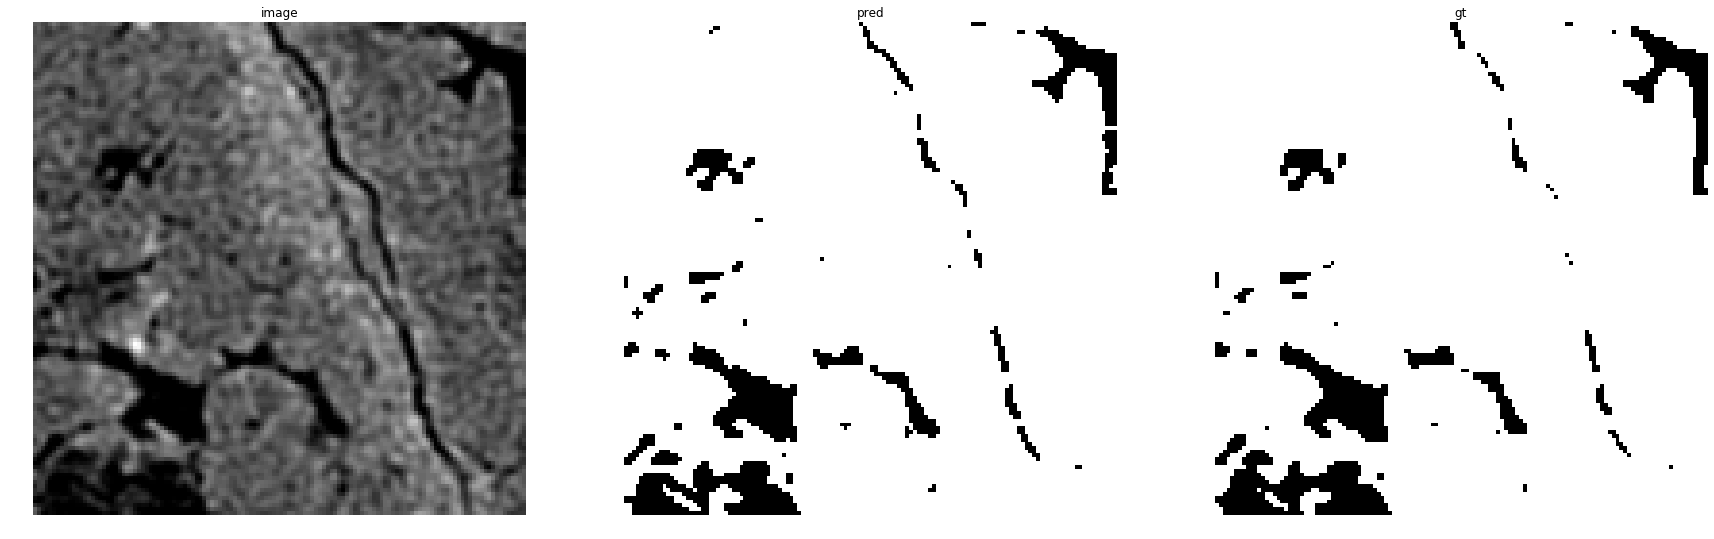

accuracy    : 0.98712158203125
precision   : 0.9938901571102458
recall      : 0.9919587214367085
f1          : 0.992923500016769
pr_auc      : 0.9998721575749666
iou         : 0.9859464499800187


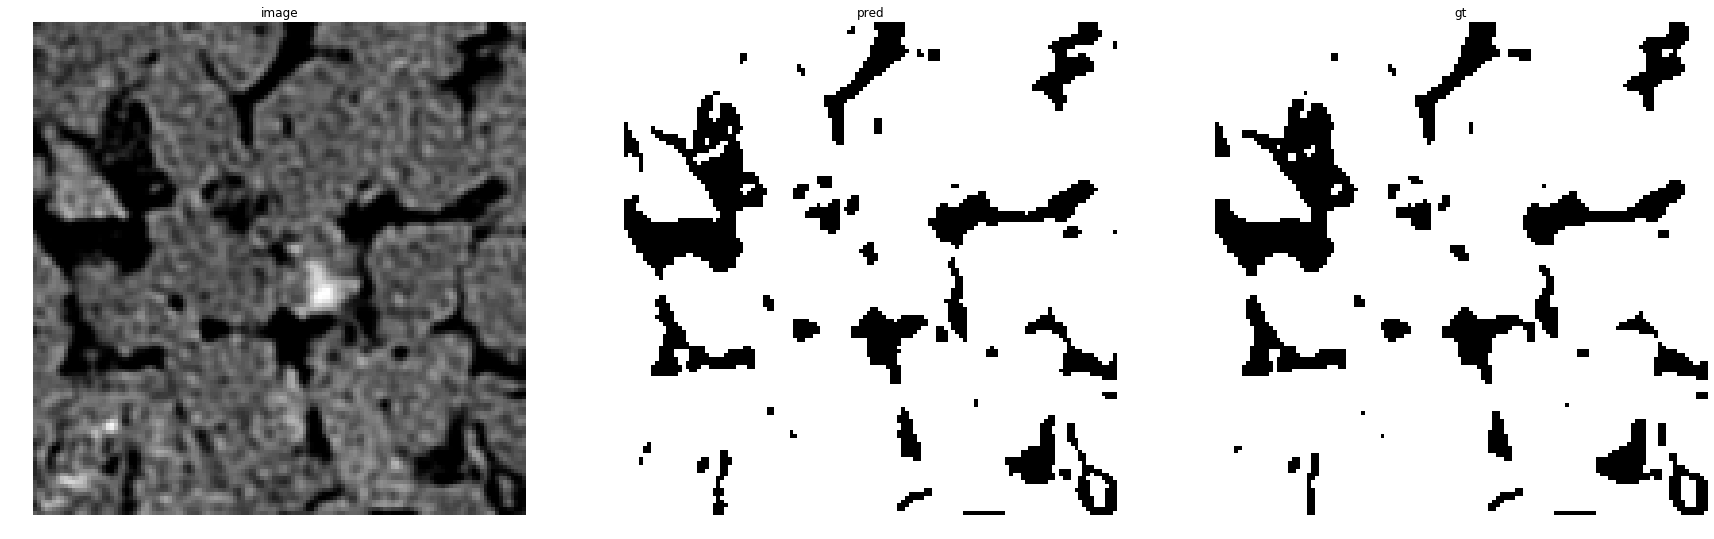

accuracy    : 0.98211669921875
precision   : 0.9906414225037794
recall      : 0.9882935937948866
f1          : 0.9894661154053569
pr_auc      : 0.9996623673711645
iou         : 0.9791518428917034


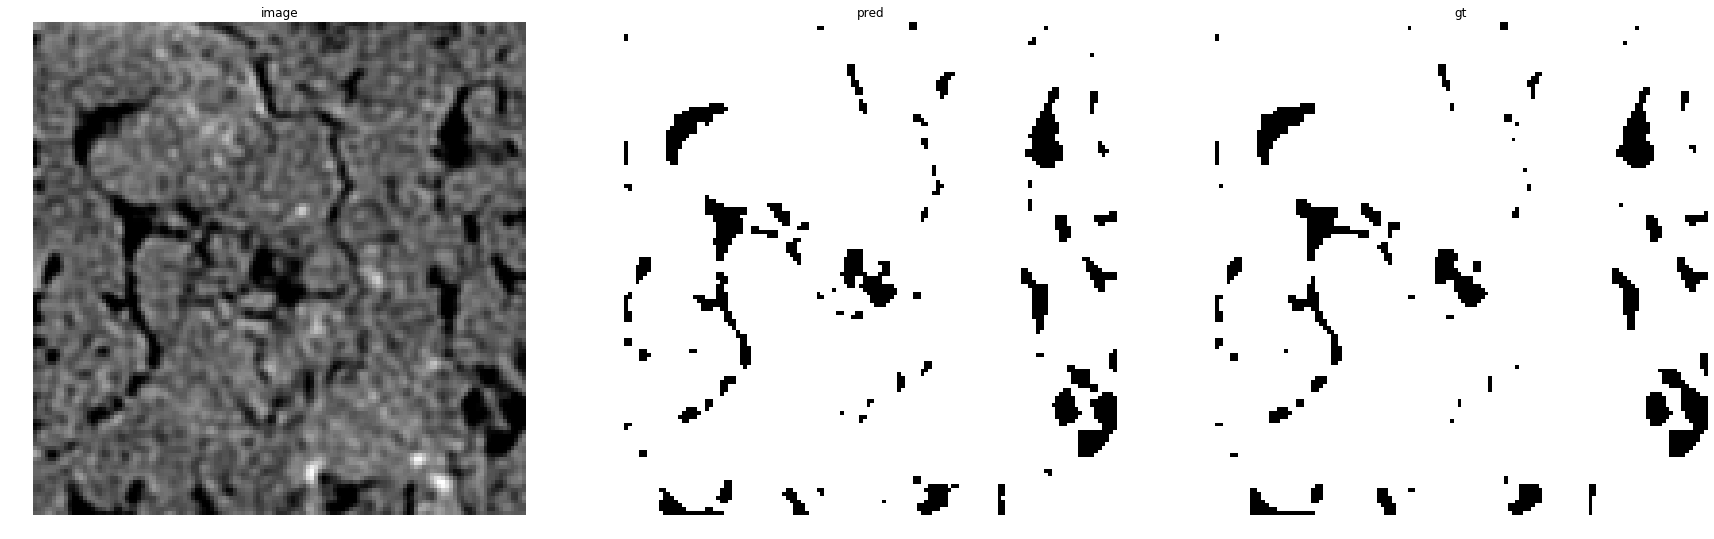

accuracy    : 0.9869384765625
precision   : 0.9961071522829242
recall      : 0.9898373983739838
f1          : 0.9929623783214944
pr_auc      : 0.9998762868829439
iou         : 0.9860231206322252


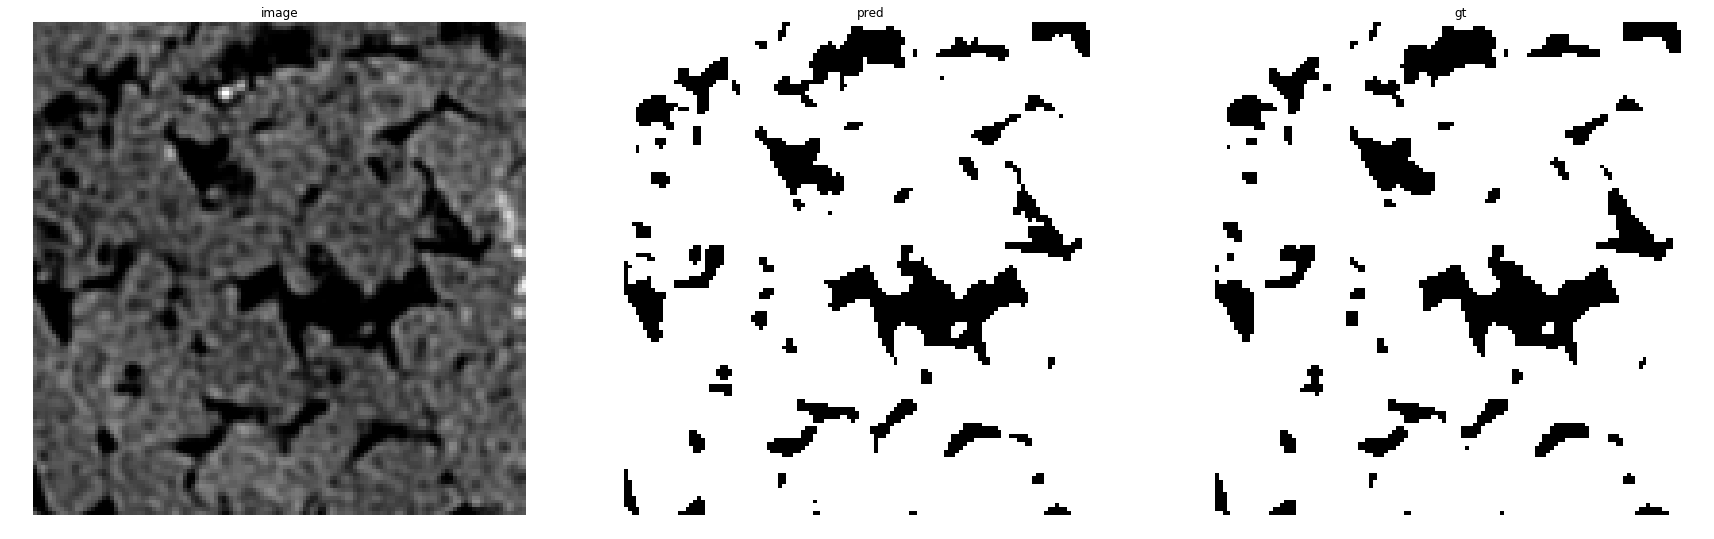

accuracy    : 0.98406982421875
precision   : 0.9906276625958534
recall      : 0.9908387188409914
f1          : 0.9907331794780756
pr_auc      : 0.9997494308065353
iou         : 0.9816365299373813


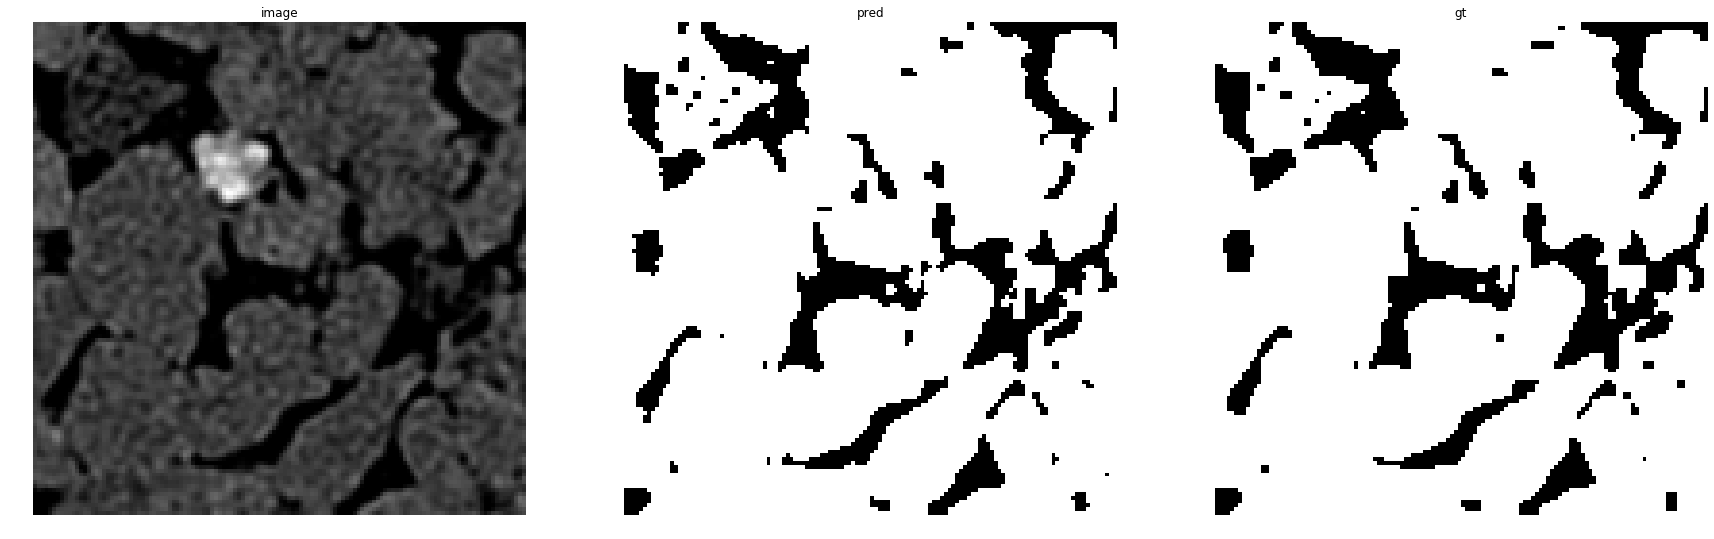

accuracy    : 0.98260498046875
precision   : 0.9884833981453784
recall      : 0.9901865308262792
f1          : 0.989334231503312
pr_auc      : 0.9996516884251447
iou         : 0.9788935792046212


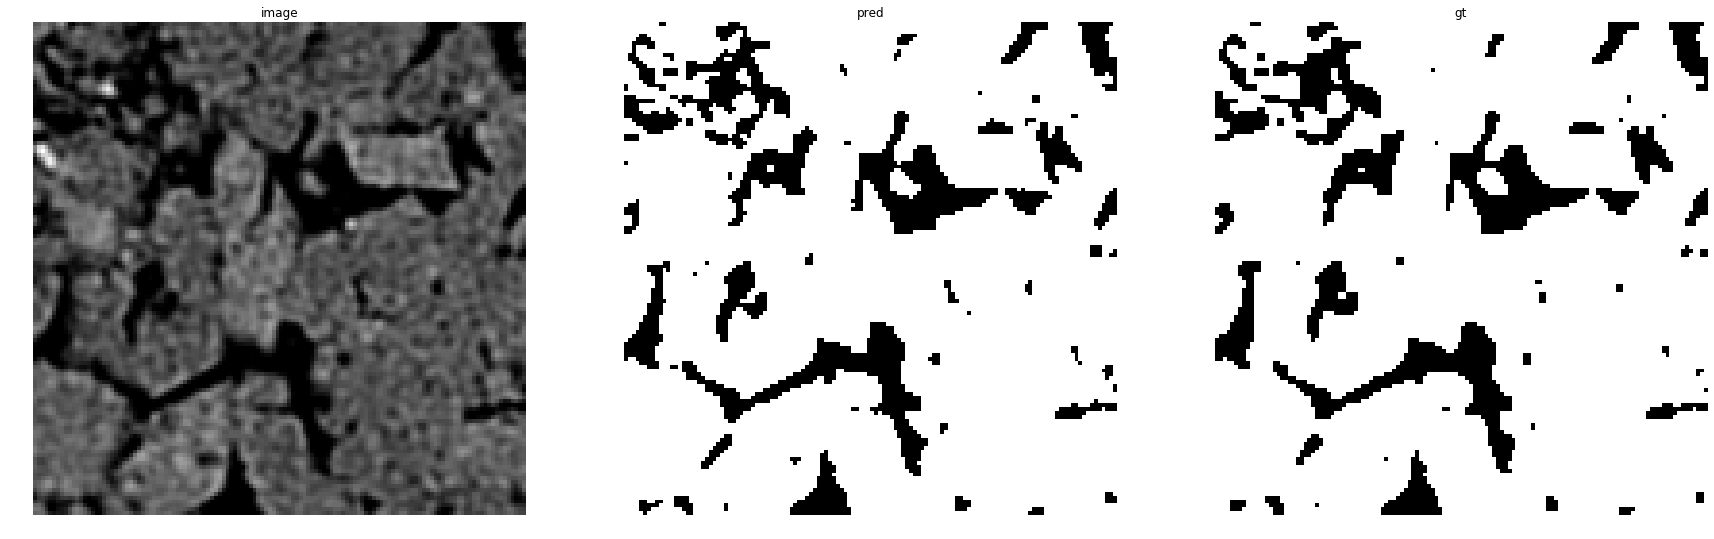

accuracy    : 0.980224609375
precision   : 0.9879211234810449
recall      : 0.9884965416818348
f1          : 0.9882087488172356
pr_auc      : 0.9995857499888569
iou         : 0.9766923242932163


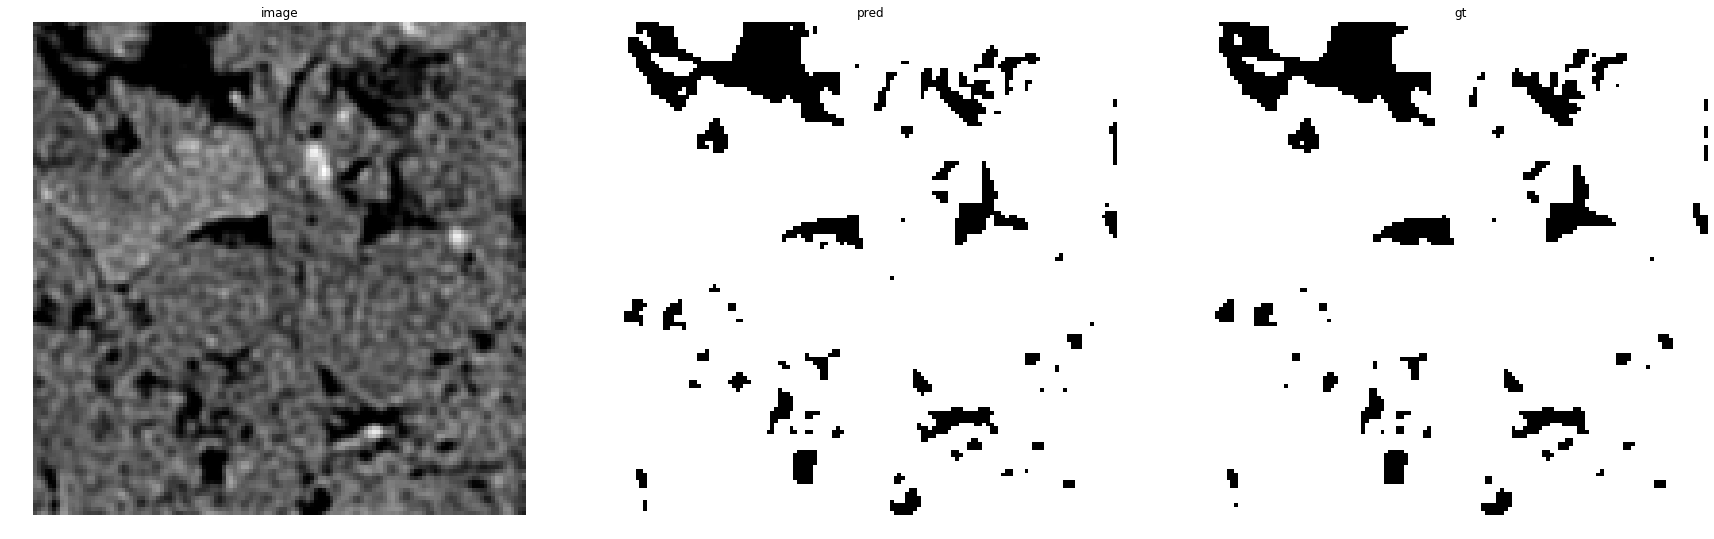

accuracy    : 0.984130859375
precision   : 0.991618969746525
recall      : 0.9906739278420694
f1          : 0.9911462235238031
pr_auc      : 0.9997485521853176
iou         : 0.982447849861608


In [29]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break

## Make prediction for particular stack

In [7]:
stack_name = 'Urna_34'

In [8]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:00, 708.95it/s]
100%|██████████| 700/700 [00:07<00:00, 99.35it/s] 


In [14]:
for ps, d in zip([(128, 128, 1), (128, 1, 128), (1, 128, 128)], ['z', 'y', 'x']):
    predicted_stack = stack.apply(
        model, 
        patch_sizes=ps, 
        bs=32, num_workers=8, device='cuda:0',
        threshold=None)
    predicted_stack.dump('./{}_{}'.format(stack_name, d), features=False, targets=False, preds=True)

25200it [00:00, 248882.02it/s]
25200it [01:59, 211.24it/s]
100%|██████████| 700/700 [00:03<00:00, 177.57it/s]
25200it [00:00, 150551.25it/s]
25200it [02:08, 195.83it/s]
100%|██████████| 700/700 [00:03<00:00, 181.01it/s]
25200it [00:00, 254085.36it/s]
25200it [02:09, 195.01it/s]
100%|██████████| 700/700 [00:04<00:00, 169.75it/s]


In [ ]:
import matplotlib.pyplot as plt
img = stack.targets[:, :, 0]
img = np.where(img == 0, 250, 255)
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray') 
plt.show()

In [17]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])